Тема: Влияние каналов продаж, новостных рассылок и купонов на число продаж на одного покупателе в выбранном Онлайн-магазине. 

Поскольку мне интересен рынок онлайн ретейла, и я планирую создавать бренд эко-френдли одежды, мне было бы полезно проанализироать данные именно по онлайн магазину. Наиболее интересным показателем зачастую оказывается Av. Payment Count or LifeTime - число покупок на 1-го платящего (в выбранных данных это N-Purchases), так как при создании финмодели именно он играет большую роль (чаще издержки наибольшие для привлечения именно пользователя) и повышение числа покупок на платящего позволит вывести модель в плюс. 

Число покупок, которое покупатель совершит, в свою очередь, может зависить от различных факторов, например, продвижение в определенном браузере, эффективности рассылки или выданные купоны на скидку, их в данных будут отражать данные в колонках Browser, Newsletter, Voucher. 

Сделавв EDA, можно будет увидеть существование закономерностей между числом покупок одного покупателя и вышеописанными признаками, которые по предположению влияют на это. На 5-м шаге проекта определю, совершается ли наибольшее количество покупок в выходные дни/праздники. На 6-м шаге поставлю гипотезы о математическом ожидании покупок одного покупателя, а на 7 попробую предсказать.

Данные возьму с портала Kaggle: https://www.kaggle.com/datasets/onlineretailshop/online-shop-customer-sales-data

Customer_id = unique customer id

Age = customer's age

Gender = 0: Male, 1: Female

Revenue_Total = total sales by customer

N_Purchases = number of purchases

Purchase_DATE = date latest purchase, dd.mm.yy

Purchase_VALUE = latest purchase in €

Pay_Method = 0: Digital Wallets, 1: Card, 2: PayPal, 3: Other

Time_Spent = time spent (in sec) on website

Browser = 0: Chrome, 1: Safari, 2: Edge, 3: Other

Newsletter = 0: not subscribed, 1: subscribed

Voucher = 0: not used, 1: used

Приступим к описанию данных, посмотрим, что в них содержится

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Online_Shop _Customer_Sales_Data.csv')

In [3]:
df.shape

(65796, 12)

In [4]:
df['Customer_id'].nunique()

65796

In [5]:
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [6]:
df.isnull().sum() #удивительно, но в данных нет пропусков...

Customer_id       0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

In [7]:
df.dtypes

Customer_id         int64
Age                 int64
Gender              int64
Revenue_Total     float64
N_Purchases         int64
Purchase_DATE      object
Purchase_VALUE    float64
Pay_Method          int64
Time_Spent          int64
Browser             int64
Newsletter          int64
Voucher             int64
dtype: object

In [8]:
df.describe()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
count,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000
mean,537205.500000,39.592696,0.671348,27.732935,3.992477,15.968699,1.308651,598.925603,0.630935,0.151027,0.250258
std,18993.813493,13.825466,0.469727,14.941878,2.004370,13.229295,1.081959,277.833635,0.996407,0.358078,0.433165
min,504308.000000,16.000000,0.000000,0.500000,1.000000,0.005000,0.000000,120.000000,0.000000,0.000000,0.000000
25%,520756.750000,28.000000,0.000000,15.300000,2.000000,4.819750,0.000000,358.000000,0.000000,0.000000,0.000000
50%,537205.500000,40.000000,1.000000,30.100000,4.000000,12.640000,1.000000,598.000000,0.000000,0.000000,0.000000
75%,553654.250000,51.000000,1.000000,37.600000,6.000000,24.752000,2.000000,840.000000,1.000000,0.000000,1.000000
max,570103.000000,63.000000,1.000000,59.900000,7.000000,59.900000,3.000000,1080.000000,3.000000,1.000000,1.000000


In [9]:
df['N_Purchases'].value_counts()

1    9519
2    9427
3    9426
7    9418
5    9408
6    9340
4    9258
Name: N_Purchases, dtype: int64

In [10]:
df['Browser'].value_counts()

0    42076
1    13135
3     7208
2     3377
Name: Browser, dtype: int64

In [11]:
df.groupby(['Browser', 'N_Purchases'], as_index=False)['Customer_id'].count() 

,Browser,N_Purchases,Customer_id
0,0,1,6158
1,0,2,6022
2,0,3,6038
3,0,4,5985
4,0,5,5920
5,0,6,5995
6,0,7,5958
7,1,1,1896
8,1,2,1887
9,1,3,1884


В каждом из браузеров примерное равное количество Customer_id приходится на разное количество покупок, хочется сделать вывод, что распределение браузеров в разре N_Purchases равномерное

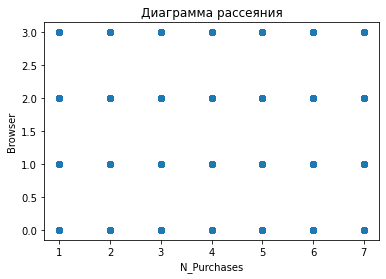

In [12]:
plt.scatter(df['N_Purchases'], df['Browser'])
plt.xlabel('N_Purchases')
plt.ylabel('Browser')
plt.title('Диаграмма рассеяния')
plt.show()

<AxesSubplot:>

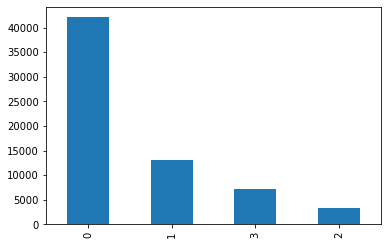

In [13]:
df['Browser'].value_counts().plot(kind='bar') #больше всего наблюдений (уникальных id) из браузера Chrome

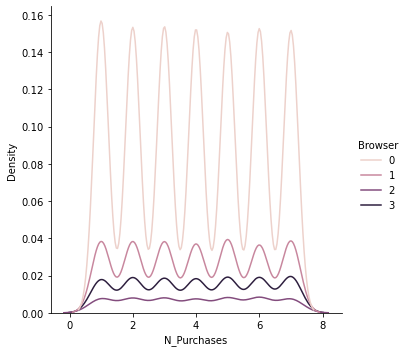

In [14]:
import matplotlib.pyplot as plt
sns.displot(data=df, x='N_Purchases', hue='Browser', kind='kde')
plt.xlabel('N_Purchases')
plt.ylabel('Density')
plt.show()

In [15]:
df['Newsletter'].value_counts()

0    55859
1     9937
Name: Newsletter, dtype: int64

<AxesSubplot:>

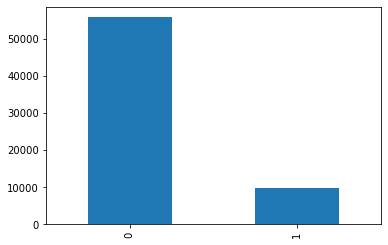

In [16]:
df['Newsletter'].value_counts().plot(kind='bar') #большая часть покупателей не были подписаны на рассылку

In [17]:
df.groupby(['Newsletter', 'N_Purchases'], as_index=False)['Customer_id'].count() 

,Newsletter,N_Purchases,Customer_id
0,0,1,8096
1,0,2,7972
2,0,3,7989
3,0,4,7875
4,0,5,7979
5,0,6,7947
6,0,7,8001
7,1,1,1423
8,1,2,1455
9,1,3,1437


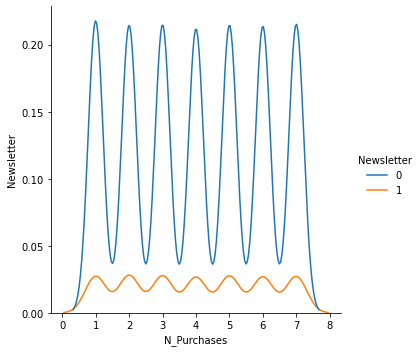

In [18]:
sns.displot(data=df, x='N_Purchases', hue='Newsletter', kind='kde')
plt.xlabel('N_Purchases')
plt.ylabel('Newsletter')
plt.show()

In [19]:
df['Voucher'].value_counts()

0    49330
1    16466
Name: Voucher, dtype: int64

<AxesSubplot:>

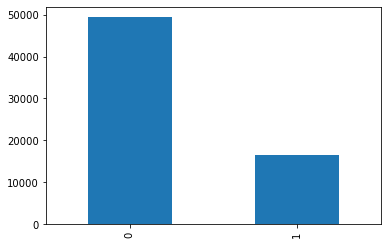

In [20]:
df['Voucher'].value_counts().plot(kind='bar') #большая часть покупателей не использовали ваучер на покупку

In [21]:
df.groupby(['Voucher', 'N_Purchases'], as_index=False)['Customer_id'].count()

,Voucher,N_Purchases,Customer_id
0,0,1,7099
1,0,2,7033
2,0,3,7090
3,0,4,6958
4,0,5,7073
5,0,6,6966
6,0,7,7111
7,1,1,2420
8,1,2,2394
9,1,3,2336


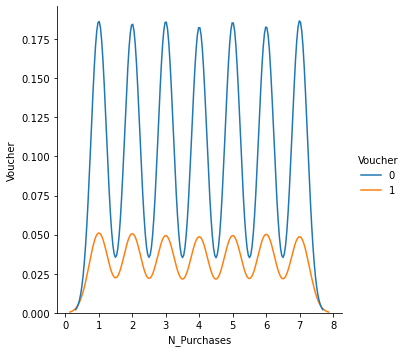

In [22]:
sns.displot(data=df, x='N_Purchases', hue='Voucher', kind='kde')
plt.xlabel('N_Purchases')
plt.ylabel('Voucher')
plt.show()

У трёх факторов, рассмотренных выше (Newsletter, Browser, Voucher) распределение в разрезе N_Purchases равномерное, это говорит о том, что вряд ли возможно сделать вывод о влиянии/эффективности новостной рассылки, выбранного браузера или наличия ваучера. 

Поэтому предположение о том, что рассылка/ваучер/браузер способствует увеличению  числа покупок, не одтверждается. 

Получаются слишком красивые распределения и складывается ощущение, что данные синтетические. Поэтому я проведу анализ, выполню все действия, с намерением на то, что полученные навыки анализа данных онлайн-магазина пригодятся в дальнейшем при работе с моим брендом, а опираться на связи полученные в результате этого проекта в жизни будет опрометчиво, с

Тогда попробуем проанализировать следующее: влияние дня недели (day_of_week), выходным ли был день (flag_is_weekend) на активность покупателей (N_Purchases, Revenue_Total, Time_Spent), измерим это с помощьюсоздания новых признаков (day_of_week, flag_is_weekend), на основе даты (поймем, какая покупка с определенным покупателем (его id) в какой неделе совершалась) и далее проведем анализ связи между днем недели и активностью (количеством покупок, выручкой, временем на сайте).

In [23]:
df['day_of_week'] = pd.to_datetime(df['Purchase_DATE']).dt.day_name()

In [24]:
# Если 1, то день недели - выходной

df['flag_is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x == 'Sunday' or x == 'Saturday' else 0)

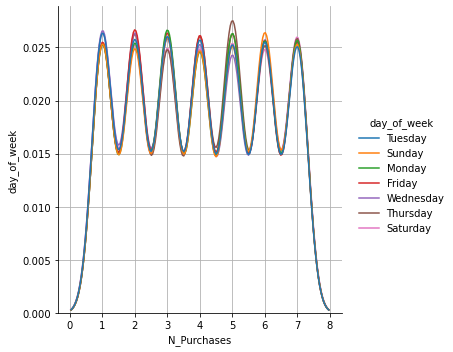

In [25]:
# Число покупок и день недели

sns.displot(data=df, x='N_Purchases', hue='day_of_week', kind='kde')
plt.xlabel('N_Purchases')
plt.ylabel('day_of_week')
plt.grid()
plt.show()

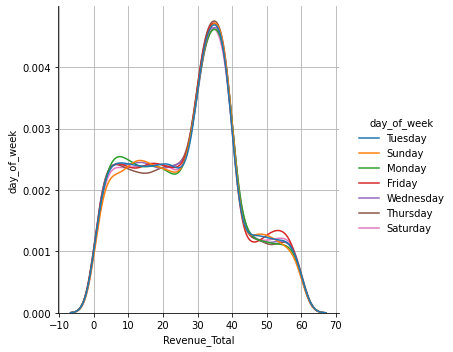

In [26]:
# Revenue_Total и день недели

sns.displot(data=df, x='Revenue_Total', hue='day_of_week', kind='kde')
plt.xlabel('Revenue_Total')
plt.ylabel('day_of_week')
plt.grid()
plt.show()

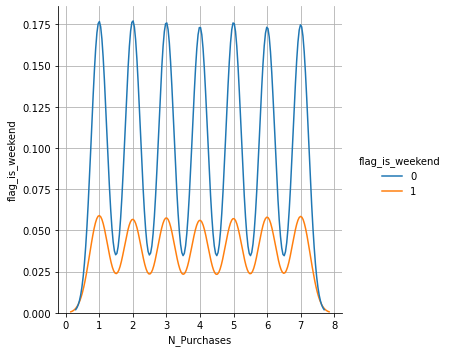

In [27]:
# Число покупок и выходной

sns.displot(data=df, x='N_Purchases', hue='flag_is_weekend', kind='kde')
plt.xlabel('N_Purchases')
plt.ylabel('flag_is_weekend')
plt.grid()
plt.show()

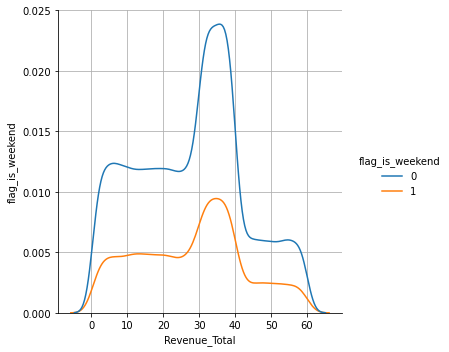

In [28]:
# Revenue_Total и выходной

sns.displot(data=df, x='Revenue_Total', hue='flag_is_weekend', kind='kde')
plt.xlabel('Revenue_Total')
plt.ylabel('flag_is_weekend')
plt.grid()
plt.show()

In [29]:
df['flag_is_weekend'].value_counts()

0    47125
1    18671
Name: flag_is_weekend, dtype: int64

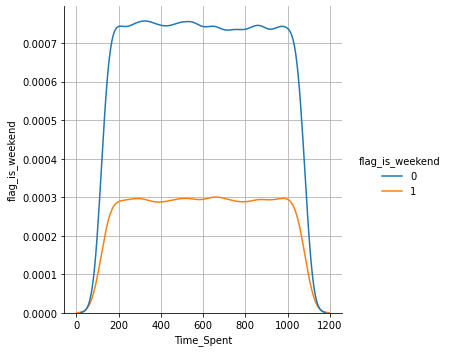

In [30]:
# Time_Spent и выходной

sns.displot(data=df, x='Time_Spent', hue='flag_is_weekend', kind='kde')
plt.xlabel('Time_Spent')
plt.ylabel('flag_is_weekend')
plt.grid()
plt.show()

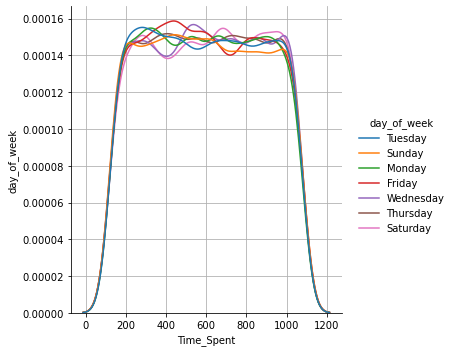

In [31]:
# Time_Spent и день недели

sns.displot(data=df, x='Time_Spent', hue='day_of_week', kind='kde')
plt.xlabel('Time_Spent')
plt.ylabel('day_of_week')
plt.grid()
plt.show()

In [32]:
# Сумма Revenue_Total в зависимоти от дня недели
df_Revenue_Total = df.groupby('day_of_week', as_index=False)['Revenue_Total'].sum()

# Сумма N_Purchases в зависимоти от дня недели
df_N_Purchases = df.groupby('day_of_week', as_index=False)['N_Purchases'].sum()

# Сумма Revenue_Total в зависимоти от выходного
df_Revenue_Total_weekend = df.groupby('flag_is_weekend', as_index=False)['Revenue_Total'].sum()

# Сумма N_Purchases в зависимоти от выходного
df_N_Purchases_weekend = df.groupby('flag_is_weekend', as_index=False)['N_Purchases'].sum()

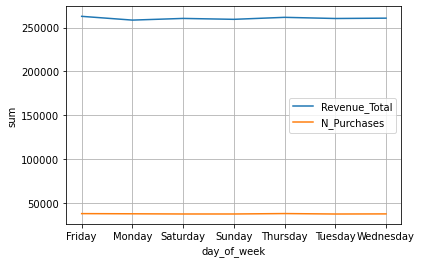

In [33]:
plt.plot(df_Revenue_Total['day_of_week'], df_Revenue_Total['Revenue_Total'], label='Revenue_Total')
plt.plot(df_N_Purchases['day_of_week'], df_N_Purchases['N_Purchases'], label='N_Purchases')
plt.legend()
plt.grid()
plt.xlabel('day_of_week')
plt.ylabel('sum');

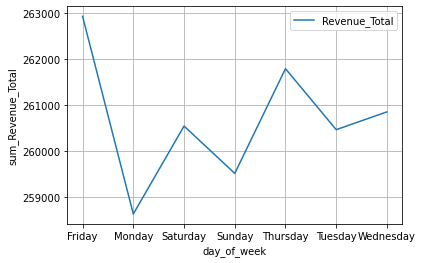

In [34]:
plt.plot(df_Revenue_Total['day_of_week'], df_Revenue_Total['Revenue_Total'], label='Revenue_Total')
plt.legend()
plt.grid()
plt.xlabel('day_of_week')
plt.ylabel('sum_Revenue_Total');

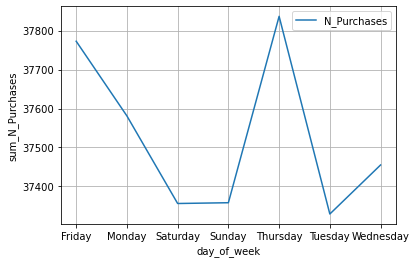

In [35]:
plt.plot(df_N_Purchases['day_of_week'], df_N_Purchases['N_Purchases'], label='N_Purchases')
plt.legend()
plt.grid()
plt.xlabel('day_of_week')
plt.ylabel('sum_N_Purchases');

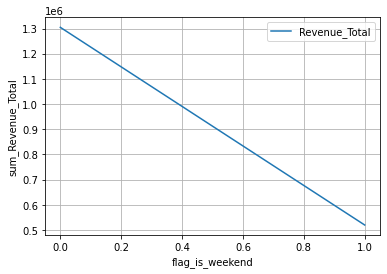

In [36]:
plt.plot(df_Revenue_Total_weekend['flag_is_weekend'], df_Revenue_Total_weekend['Revenue_Total'], label='Revenue_Total')
plt.legend()
plt.grid()
plt.xlabel('flag_is_weekend')
plt.ylabel('sum_Revenue_Total');

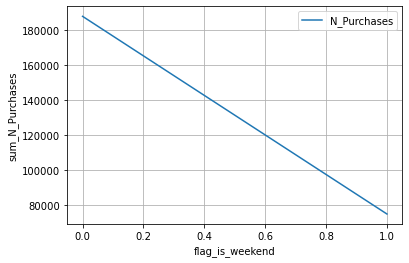

In [37]:
plt.plot(df_N_Purchases_weekend['flag_is_weekend'], df_N_Purchases_weekend['N_Purchases'], label='N_Purchases')
plt.legend()
plt.grid()
plt.xlabel('flag_is_weekend')
plt.ylabel('sum_N_Purchases');

In [38]:
# Мода числа покупок в зависимости от дня недели

df.groupby('day_of_week')['N_Purchases'].agg(pd.Series.mode)

day_of_week
Friday       2
Monday       3
Saturday     1
Sunday       6
Thursday     5
Tuesday      1
Wednesday    1
Name: N_Purchases, dtype: int64

In [39]:
# Медиана Revenue_Total в зависимости от дня недели

df.groupby('day_of_week')['Revenue_Total'].median()

day_of_week
Friday       30.1
Monday       30.0
Saturday     30.1
Sunday       30.2
Thursday     30.1
Tuesday      30.1
Wednesday    30.1
Name: Revenue_Total, dtype: float64

In [40]:
# Среднее Revenue_Total в зависимости от дня недели

df.groupby('day_of_week')['Revenue_Total'].mean()

day_of_week
Friday       27.767114
Monday       27.575488
Saturday     27.838679
Sunday       27.868718
Thursday     27.743652
Tuesday      27.708904
Wednesday    27.629531
Name: Revenue_Total, dtype: float64

## Моделирование

Будем решать как задачу регрессии, предсказывать N_Purchases

In [43]:
!pip install catboost

In [44]:
from catboost import CatBoostRegressor, Pool

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
X = df.drop(['Customer_id', 'Purchase_DATE', 'N_Purchases'], axis=1)
y = df['N_Purchases']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
le = LabelEncoder()

le.fit(X_train['day_of_week'])

LabelEncoder()

In [48]:
X_train['day_of_week'] = le.transform(X_train['day_of_week'])
X_test['day_of_week'] = le.transform(X_test['day_of_week'])

C:\Users\Mary\AppData\Local\Temp/ipykernel_11088/3355142481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['day_of_week'] = le.transform(X_train['day_of_week'])
C:\Users\Mary\AppData\Local\Temp/ipykernel_11088/3355142481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['day_of_week'] = le.transform(X_test['day_of_week'])


In [49]:
model = CatBoostRegressor(loss_function='RMSE')

In [50]:
X_train

,Age,Gender,Revenue_Total,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,day_of_week,flag_is_weekend
34118,23,1,30.9,25.338,2,1029,0,0,1,6,0
56163,24,1,23.6,1.180,3,403,0,0,0,6,0
54180,54,0,35.1,23.868,0,325,1,0,0,0,0
14004,24,1,34.5,33.120,1,868,0,0,0,3,1
64710,51,0,30.0,27.300,1,223,0,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...
37194,46,1,5.4,5.076,1,839,3,1,0,1,0
6265,55,0,37.5,14.625,3,756,0,0,0,3,1
54886,43,1,19.0,8.170,0,240,0,0,1,0,0
860,46,1,17.4,4.176,1,339,1,0,0,3,1


In [51]:
category_features = ['Gender', 'Pay_Method', 'Browser', 'Newsletter', 'Voucher', 'day_of_week', 'flag_is_weekend']

train_dataset = Pool(X_train, y_train, cat_features=category_features) 
test_dataset = Pool(X_test, y_test, cat_features=category_features)

In [52]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
Ира
model.grid_search(grid, train_dataset)

0:	learn: 4.3561950	test: 4.3780404	best: 4.3780404 (0)	total: 147ms	remaining: 14.5s
1:	learn: 4.2523559	test: 4.2739921	best: 4.2739921 (1)	total: 156ms	remaining: 7.63s
2:	learn: 4.1526453	test: 4.1742105	best: 4.1742105 (2)	total: 168ms	remaining: 5.44s
3:	learn: 4.0560059	test: 4.0774737	best: 4.0774737 (3)	total: 180ms	remaining: 4.33s
4:	learn: 3.9626575	test: 3.9839963	best: 3.9839963 (4)	total: 193ms	remaining: 3.67s
5:	learn: 3.8742701	test: 3.8955048	best: 3.8955048 (5)	total: 206ms	remaining: 3.22s
6:	learn: 3.7892241	test: 3.8103524	best: 3.8103524 (6)	total: 218ms	remaining: 2.9s
7:	learn: 3.7068700	test: 3.7280372	best: 3.7280372 (7)	total: 231ms	remaining: 2.66s
8:	learn: 3.6282056	test: 3.6492546	best: 3.6492546 (8)	total: 241ms	remaining: 2.44s
9:	learn: 3.5526011	test: 3.5735212	best: 3.5735212 (9)	total: 254ms	remaining: 2.28s
10:	learn: 3.4786028	test: 3.4994024	best: 3.4994024 (10)	total: 266ms	remaining: 2.15s
11:	learn: 3.4079997	test: 3.4286877	best: 3.4286877 

7:	learn: 2.6130734	test: 2.6312843	best: 2.6312843 (7)	total: 101ms	remaining: 1.16s
8:	learn: 2.4993742	test: 2.5167085	best: 2.5167085 (8)	total: 110ms	remaining: 1.11s
9:	learn: 2.4069793	test: 2.4236624	best: 2.4236624 (9)	total: 122ms	remaining: 1.09s
10:	learn: 2.3259877	test: 2.3423036	best: 2.3423036 (10)	total: 134ms	remaining: 1.09s
11:	learn: 2.2584609	test: 2.2744981	best: 2.2744981 (11)	total: 146ms	remaining: 1.07s
12:	learn: 2.2007544	test: 2.2160942	best: 2.2160942 (12)	total: 158ms	remaining: 1.06s
13:	learn: 2.1506180	test: 2.1653102	best: 2.1653102 (13)	total: 169ms	remaining: 1.04s
14:	learn: 2.1114407	test: 2.1261396	best: 2.1261396 (14)	total: 180ms	remaining: 1.02s
15:	learn: 2.0789086	test: 2.0933147	best: 2.0933147 (15)	total: 192ms	remaining: 1s
16:	learn: 2.0506220	test: 2.0648526	best: 2.0648526 (16)	total: 203ms	remaining: 991ms
17:	learn: 2.0262483	test: 2.0399467	best: 2.0399467 (17)	total: 215ms	remaining: 979ms
18:	learn: 2.0078315	test: 2.0215990	best

17:	learn: 3.0381018	test: 3.0582860	best: 3.0582860 (17)	total: 198ms	remaining: 901ms
18:	learn: 2.9849010	test: 3.0050406	best: 3.0050406 (18)	total: 209ms	remaining: 893ms
19:	learn: 2.9336173	test: 2.9535075	best: 2.9535075 (19)	total: 221ms	remaining: 885ms
20:	learn: 2.8858675	test: 2.9055912	best: 2.9055912 (20)	total: 233ms	remaining: 876ms
21:	learn: 2.8391259	test: 2.8587630	best: 2.8587630 (21)	total: 244ms	remaining: 866ms
22:	learn: 2.7945428	test: 2.8140242	best: 2.8140242 (22)	total: 256ms	remaining: 857ms
23:	learn: 2.7522035	test: 2.7715338	best: 2.7715338 (23)	total: 269ms	remaining: 850ms
24:	learn: 2.7123607	test: 2.7315328	best: 2.7315328 (24)	total: 280ms	remaining: 841ms
25:	learn: 2.6736421	test: 2.6926539	best: 2.6926539 (25)	total: 292ms	remaining: 832ms
26:	learn: 2.6365177	test: 2.6553670	best: 2.6553670 (26)	total: 305ms	remaining: 825ms
27:	learn: 2.6018643	test: 2.6205360	best: 2.6205360 (27)	total: 319ms	remaining: 819ms
28:	learn: 2.5679838	test: 2.586

12:	learn: 2.2007739	test: 2.2161139	best: 2.2161139 (12)	total: 154ms	remaining: 1.03s
13:	learn: 2.1506356	test: 2.1653280	best: 2.1653280 (13)	total: 167ms	remaining: 1.03s
14:	learn: 2.1114563	test: 2.1261553	best: 2.1261553 (14)	total: 180ms	remaining: 1.02s
15:	learn: 2.0789224	test: 2.0933287	best: 2.0933287 (15)	total: 192ms	remaining: 1.01s
16:	learn: 2.0506346	test: 2.0648653	best: 2.0648653 (16)	total: 204ms	remaining: 997ms
17:	learn: 2.0262596	test: 2.0399581	best: 2.0399581 (17)	total: 217ms	remaining: 989ms
18:	learn: 2.0078416	test: 2.0216092	best: 2.0216092 (18)	total: 229ms	remaining: 978ms
19:	learn: 1.9908039	test: 2.0039331	best: 2.0039331 (19)	total: 242ms	remaining: 967ms
20:	learn: 1.9770623	test: 1.9899583	best: 1.9899583 (20)	total: 254ms	remaining: 956ms
21:	learn: 1.9667366	test: 1.9796185	best: 1.9796185 (21)	total: 266ms	remaining: 943ms
22:	learn: 1.9561364	test: 1.9690734	best: 1.9690734 (22)	total: 278ms	remaining: 931ms
23:	learn: 1.9476628	test: 1.960

8:	learn: 3.6282656	test: 3.6493142	best: 3.6493142 (8)	total: 104ms	remaining: 1.05s
9:	learn: 3.5526638	test: 3.5735835	best: 3.5735835 (9)	total: 116ms	remaining: 1.05s
10:	learn: 3.4786683	test: 3.4994674	best: 3.4994674 (10)	total: 129ms	remaining: 1.04s
11:	learn: 3.4080685	test: 3.4287562	best: 3.4287562 (11)	total: 141ms	remaining: 1.04s
12:	learn: 3.3399813	test: 3.3606182	best: 3.3606182 (12)	total: 154ms	remaining: 1.03s
13:	learn: 3.2742849	test: 3.2947920	best: 3.2947920 (13)	total: 166ms	remaining: 1.02s
14:	learn: 3.2115460	test: 3.2320287	best: 3.2320287 (14)	total: 179ms	remaining: 1.01s
15:	learn: 3.1516537	test: 3.1720535	best: 3.1720535 (15)	total: 192ms	remaining: 1.01s
16:	learn: 3.0936346	test: 3.1139401	best: 3.1139401 (16)	total: 204ms	remaining: 995ms
17:	learn: 3.0381495	test: 3.0583337	best: 3.0583337 (17)	total: 216ms	remaining: 982ms
18:	learn: 2.9849485	test: 3.0050882	best: 3.0050882 (18)	total: 229ms	remaining: 976ms
19:	learn: 2.9336651	test: 2.9535554

3:	learn: 3.2835971	test: 3.3037969	best: 3.3037969 (3)	total: 48.4ms	remaining: 1.16s
4:	learn: 3.0738793	test: 3.0936113	best: 3.0936113 (4)	total: 61.3ms	remaining: 1.17s
5:	learn: 2.8975389	test: 2.9167598	best: 2.9167598 (5)	total: 73.7ms	remaining: 1.15s
6:	learn: 2.7464101	test: 2.7650751	best: 2.7650751 (6)	total: 86.2ms	remaining: 1.15s
7:	learn: 2.6131547	test: 2.6313653	best: 2.6313653 (7)	total: 98.9ms	remaining: 1.14s
8:	learn: 2.4994507	test: 2.5167849	best: 2.5167849 (8)	total: 110ms	remaining: 1.11s
9:	learn: 2.4070491	test: 2.4237324	best: 2.4237324 (9)	total: 121ms	remaining: 1.09s
10:	learn: 2.3260516	test: 2.3423677	best: 2.3423677 (10)	total: 134ms	remaining: 1.08s
11:	learn: 2.2585185	test: 2.2745561	best: 2.2745561 (11)	total: 146ms	remaining: 1.07s
12:	learn: 2.2008063	test: 2.2161467	best: 2.2161467 (12)	total: 158ms	remaining: 1.06s
13:	learn: 2.1506648	test: 2.1653576	best: 2.1653576 (13)	total: 170ms	remaining: 1.04s
14:	learn: 2.1114822	test: 2.1261814	best

97:	learn: 1.8501598	test: 1.8674079	best: 1.8674079 (97)	total: 1.22s	remaining: 24.8ms
98:	learn: 1.8500653	test: 1.8673147	best: 1.8673147 (98)	total: 1.23s	remaining: 12.4ms
99:	learn: 1.8488738	test: 1.8662870	best: 1.8662870 (99)	total: 1.24s	remaining: 0us

bestTest = 1.866286957
bestIteration = 99

5:	loss: 1.8662870	best: 1.8662870 (5)	total: 7.75s	remaining: 1m 56s
0:	learn: 4.3562285	test: 4.3780730	best: 4.3780730 (0)	total: 9.26ms	remaining: 916ms
1:	learn: 4.2524183	test: 4.2740538	best: 4.2740538 (1)	total: 18.3ms	remaining: 896ms
2:	learn: 4.1527358	test: 4.1743004	best: 4.1743004 (2)	total: 30.7ms	remaining: 991ms
3:	learn: 4.0561171	test: 4.0775839	best: 4.0775839 (3)	total: 42.4ms	remaining: 1.02s
4:	learn: 3.9627872	test: 3.9841248	best: 3.9841248 (4)	total: 54.4ms	remaining: 1.03s
5:	learn: 3.8744225	test: 3.8956560	best: 3.8956560 (5)	total: 66.5ms	remaining: 1.04s
6:	learn: 3.7893972	test: 3.8105246	best: 3.8105246 (6)	total: 79ms	remaining: 1.05s
7:	learn: 3.707

95:	learn: 1.9279649	test: 1.9402314	best: 1.9402314 (95)	total: 1.18s	remaining: 49.2ms
96:	learn: 1.9265329	test: 1.9389120	best: 1.9389120 (96)	total: 1.19s	remaining: 36.9ms
97:	learn: 1.9252262	test: 1.9376630	best: 1.9376630 (97)	total: 1.21s	remaining: 24.6ms
98:	learn: 1.9239533	test: 1.9362733	best: 1.9362733 (98)	total: 1.22s	remaining: 12.3ms
99:	learn: 1.9227896	test: 1.9350738	best: 1.9350738 (99)	total: 1.23s	remaining: 0us

bestTest = 1.935073803
bestIteration = 99

6:	loss: 1.9350738	best: 1.8662870 (5)	total: 9.01s	remaining: 1m 54s
0:	learn: 4.1105773	test: 4.1321667	best: 4.1321667 (0)	total: 10.3ms	remaining: 1.02s
1:	learn: 3.7972133	test: 3.8180493	best: 3.8180493 (1)	total: 20.7ms	remaining: 1.01s
2:	learn: 3.5241475	test: 3.5446668	best: 3.5446668 (2)	total: 34ms	remaining: 1.1s
3:	learn: 3.2837902	test: 3.3039884	best: 3.3039884 (3)	total: 46.5ms	remaining: 1.11s
4:	learn: 3.0740809	test: 3.0938115	best: 3.0938115 (4)	total: 58.6ms	remaining: 1.11s
5:	learn: 2.

2:	learn: 4.1526453	test: 4.1742105	best: 4.1742105 (2)	total: 31.5ms	remaining: 1.54s
3:	learn: 4.0560059	test: 4.0774737	best: 4.0774737 (3)	total: 43.6ms	remaining: 1.59s
4:	learn: 3.9626575	test: 3.9839963	best: 3.9839963 (4)	total: 56.1ms	remaining: 1.63s
5:	learn: 3.8742701	test: 3.8955048	best: 3.8955048 (5)	total: 68.1ms	remaining: 1.64s
6:	learn: 3.7892241	test: 3.8103524	best: 3.8103524 (6)	total: 79.8ms	remaining: 1.63s
7:	learn: 3.7068700	test: 3.7280372	best: 3.7280372 (7)	total: 92ms	remaining: 1.63s
8:	learn: 3.6282056	test: 3.6492546	best: 3.6492546 (8)	total: 102ms	remaining: 1.59s
9:	learn: 3.5526011	test: 3.5735212	best: 3.5735212 (9)	total: 114ms	remaining: 1.6s
10:	learn: 3.4786028	test: 3.4994024	best: 3.4994024 (10)	total: 127ms	remaining: 1.61s
11:	learn: 3.4079997	test: 3.4286877	best: 3.4286877 (11)	total: 140ms	remaining: 1.6s
12:	learn: 3.3399120	test: 3.3605491	best: 3.3605491 (12)	total: 153ms	remaining: 1.61s
13:	learn: 3.2742136	test: 3.2947207	best: 3.2

96:	learn: 1.9264620	test: 1.9388371	best: 1.9388371 (96)	total: 1.2s	remaining: 657ms
97:	learn: 1.9251552	test: 1.9375881	best: 1.9375881 (97)	total: 1.22s	remaining: 645ms
98:	learn: 1.9238828	test: 1.9361989	best: 1.9361989 (98)	total: 1.23s	remaining: 632ms
99:	learn: 1.9227188	test: 1.9349990	best: 1.9349990 (99)	total: 1.24s	remaining: 620ms
100:	learn: 1.9216983	test: 1.9340059	best: 1.9340059 (100)	total: 1.25s	remaining: 608ms
101:	learn: 1.9204832	test: 1.9329074	best: 1.9329074 (101)	total: 1.26s	remaining: 596ms
102:	learn: 1.9193394	test: 1.9316687	best: 1.9316687 (102)	total: 1.28s	remaining: 583ms
103:	learn: 1.9183731	test: 1.9306988	best: 1.9306988 (103)	total: 1.29s	remaining: 571ms
104:	learn: 1.9172259	test: 1.9294897	best: 1.9294897 (104)	total: 1.3s	remaining: 558ms
105:	learn: 1.9165084	test: 1.9288066	best: 1.9288066 (105)	total: 1.31s	remaining: 546ms
106:	learn: 1.9154676	test: 1.9278020	best: 1.9278020 (106)	total: 1.33s	remaining: 533ms
107:	learn: 1.914735

43:	learn: 1.8920719	test: 1.9062403	best: 1.9062403 (43)	total: 546ms	remaining: 1.31s
44:	learn: 1.8904437	test: 1.9048267	best: 1.9048267 (44)	total: 558ms	remaining: 1.3s
45:	learn: 1.8887473	test: 1.9030452	best: 1.9030452 (45)	total: 570ms	remaining: 1.29s
46:	learn: 1.8870127	test: 1.9014569	best: 1.9014569 (46)	total: 582ms	remaining: 1.28s
47:	learn: 1.8863605	test: 1.9008584	best: 1.9008584 (47)	total: 593ms	remaining: 1.26s
48:	learn: 1.8850567	test: 1.8995480	best: 1.8995480 (48)	total: 606ms	remaining: 1.25s
49:	learn: 1.8846525	test: 1.8992604	best: 1.8992604 (49)	total: 618ms	remaining: 1.24s
50:	learn: 1.8842768	test: 1.8990781	best: 1.8990781 (50)	total: 629ms	remaining: 1.22s
51:	learn: 1.8827029	test: 1.8972570	best: 1.8972570 (51)	total: 640ms	remaining: 1.21s
52:	learn: 1.8815241	test: 1.8962139	best: 1.8962139 (52)	total: 652ms	remaining: 1.19s
53:	learn: 1.8811111	test: 1.8958049	best: 1.8958049 (53)	total: 663ms	remaining: 1.18s
54:	learn: 1.8800216	test: 1.8949

138:	learn: 1.8354632	test: 1.8543073	best: 1.8543073 (138)	total: 1.7s	remaining: 135ms
139:	learn: 1.8353960	test: 1.8543271	best: 1.8543073 (138)	total: 1.71s	remaining: 122ms
140:	learn: 1.8353380	test: 1.8542696	best: 1.8542696 (140)	total: 1.72s	remaining: 110ms
141:	learn: 1.8342136	test: 1.8531185	best: 1.8531185 (141)	total: 1.73s	remaining: 97.7ms
142:	learn: 1.8341594	test: 1.8530569	best: 1.8530569 (142)	total: 1.75s	remaining: 85.5ms
143:	learn: 1.8341125	test: 1.8530426	best: 1.8530426 (143)	total: 1.76s	remaining: 73.2ms
144:	learn: 1.8326209	test: 1.8517387	best: 1.8517387 (144)	total: 1.77s	remaining: 61ms
145:	learn: 1.8324460	test: 1.8516645	best: 1.8516645 (145)	total: 1.78s	remaining: 48.8ms
146:	learn: 1.8314199	test: 1.8507420	best: 1.8507420 (146)	total: 1.79s	remaining: 36.6ms
147:	learn: 1.8307413	test: 1.8500797	best: 1.8500797 (147)	total: 1.8s	remaining: 24.4ms
148:	learn: 1.8301000	test: 1.8494848	best: 1.8494848 (148)	total: 1.81s	remaining: 12.2ms
149:	l

86:	learn: 1.9418610	test: 1.9544750	best: 1.9544750 (86)	total: 1.05s	remaining: 759ms
87:	learn: 1.9398946	test: 1.9523747	best: 1.9523747 (87)	total: 1.06s	remaining: 748ms
88:	learn: 1.9379860	test: 1.9503530	best: 1.9503530 (88)	total: 1.07s	remaining: 736ms
89:	learn: 1.9362225	test: 1.9485265	best: 1.9485265 (89)	total: 1.09s	remaining: 724ms
90:	learn: 1.9349415	test: 1.9472693	best: 1.9472693 (90)	total: 1.1s	remaining: 712ms
91:	learn: 1.9332452	test: 1.9454287	best: 1.9454287 (91)	total: 1.11s	remaining: 700ms
92:	learn: 1.9320136	test: 1.9442936	best: 1.9442936 (92)	total: 1.12s	remaining: 688ms
93:	learn: 1.9308857	test: 1.9431827	best: 1.9431827 (93)	total: 1.13s	remaining: 676ms
94:	learn: 1.9292687	test: 1.9414635	best: 1.9414635 (94)	total: 1.15s	remaining: 664ms
95:	learn: 1.9279013	test: 1.9401641	best: 1.9401641 (95)	total: 1.16s	remaining: 652ms
96:	learn: 1.9264696	test: 1.9388452	best: 1.9388452 (96)	total: 1.17s	remaining: 640ms
97:	learn: 1.9251628	test: 1.9375

33:	learn: 1.9083363	test: 1.9216201	best: 1.9216201 (33)	total: 405ms	remaining: 1.38s
34:	learn: 1.9065815	test: 1.9201775	best: 1.9201775 (34)	total: 417ms	remaining: 1.37s
35:	learn: 1.9049738	test: 1.9188716	best: 1.9188716 (35)	total: 429ms	remaining: 1.36s
36:	learn: 1.9030766	test: 1.9173311	best: 1.9173311 (36)	total: 442ms	remaining: 1.35s
37:	learn: 1.9007035	test: 1.9149997	best: 1.9149997 (37)	total: 454ms	remaining: 1.34s
38:	learn: 1.8985540	test: 1.9127418	best: 1.9127418 (38)	total: 465ms	remaining: 1.32s
39:	learn: 1.8973907	test: 1.9118316	best: 1.9118316 (39)	total: 477ms	remaining: 1.31s
40:	learn: 1.8967193	test: 1.9114053	best: 1.9114053 (40)	total: 489ms	remaining: 1.3s
41:	learn: 1.8947768	test: 1.9092796	best: 1.9092796 (41)	total: 501ms	remaining: 1.29s
42:	learn: 1.8936464	test: 1.9081128	best: 1.9081128 (42)	total: 513ms	remaining: 1.28s
43:	learn: 1.8920828	test: 1.9062500	best: 1.9062500 (43)	total: 525ms	remaining: 1.26s
44:	learn: 1.8904548	test: 1.9048

131:	learn: 1.8374520	test: 1.8561580	best: 1.8561580 (131)	total: 1.59s	remaining: 216ms
132:	learn: 1.8372380	test: 1.8559231	best: 1.8559231 (132)	total: 1.6s	remaining: 204ms
133:	learn: 1.8360229	test: 1.8547440	best: 1.8547440 (133)	total: 1.61s	remaining: 192ms
134:	learn: 1.8359566	test: 1.8546931	best: 1.8546931 (134)	total: 1.62s	remaining: 180ms
135:	learn: 1.8358122	test: 1.8546206	best: 1.8546206 (135)	total: 1.64s	remaining: 169ms
136:	learn: 1.8357544	test: 1.8545871	best: 1.8545871 (136)	total: 1.65s	remaining: 157ms
137:	learn: 1.8355807	test: 1.8543819	best: 1.8543819 (137)	total: 1.66s	remaining: 145ms
138:	learn: 1.8354926	test: 1.8543356	best: 1.8543356 (138)	total: 1.67s	remaining: 132ms
139:	learn: 1.8354254	test: 1.8543553	best: 1.8543356 (138)	total: 1.69s	remaining: 120ms
140:	learn: 1.8353674	test: 1.8542979	best: 1.8542979 (140)	total: 1.7s	remaining: 108ms
141:	learn: 1.8342431	test: 1.8531469	best: 1.8531469 (141)	total: 1.71s	remaining: 96.4ms
142:	learn:

79:	learn: 1.9564759	test: 1.9693462	best: 1.9693462 (79)	total: 953ms	remaining: 834ms
80:	learn: 1.9539396	test: 1.9667057	best: 1.9667057 (80)	total: 964ms	remaining: 822ms
81:	learn: 1.9515212	test: 1.9641677	best: 1.9641677 (81)	total: 975ms	remaining: 809ms
82:	learn: 1.9492277	test: 1.9618416	best: 1.9618416 (82)	total: 986ms	remaining: 796ms
83:	learn: 1.9474163	test: 1.9600844	best: 1.9600844 (83)	total: 998ms	remaining: 784ms
84:	learn: 1.9453199	test: 1.9579780	best: 1.9579780 (84)	total: 1.01s	remaining: 771ms
85:	learn: 1.9433945	test: 1.9560057	best: 1.9560057 (85)	total: 1.02s	remaining: 759ms
86:	learn: 1.9418736	test: 1.9544884	best: 1.9544884 (86)	total: 1.03s	remaining: 747ms
87:	learn: 1.9399073	test: 1.9523882	best: 1.9523882 (87)	total: 1.04s	remaining: 735ms
88:	learn: 1.9379986	test: 1.9503665	best: 1.9503665 (88)	total: 1.05s	remaining: 723ms
89:	learn: 1.9362353	test: 1.9485402	best: 1.9485402 (89)	total: 1.06s	remaining: 711ms
90:	learn: 1.9349541	test: 1.947

28:	learn: 1.9246543	test: 1.9370952	best: 1.9370952 (28)	total: 339ms	remaining: 1.42s
29:	learn: 1.9205757	test: 1.9328078	best: 1.9328078 (29)	total: 351ms	remaining: 1.4s
30:	learn: 1.9168091	test: 1.9287619	best: 1.9287619 (30)	total: 363ms	remaining: 1.39s
31:	learn: 1.9138240	test: 1.9256360	best: 1.9256360 (31)	total: 374ms	remaining: 1.38s
32:	learn: 1.9114124	test: 1.9234630	best: 1.9234630 (32)	total: 386ms	remaining: 1.37s
33:	learn: 1.9081484	test: 1.9205379	best: 1.9205379 (33)	total: 397ms	remaining: 1.35s
34:	learn: 1.9062037	test: 1.9189965	best: 1.9189965 (34)	total: 409ms	remaining: 1.34s
35:	learn: 1.9045808	test: 1.9176957	best: 1.9176957 (35)	total: 420ms	remaining: 1.33s
36:	learn: 1.9026268	test: 1.9155745	best: 1.9155745 (36)	total: 432ms	remaining: 1.32s
37:	learn: 1.9020051	test: 1.9149755	best: 1.9149755 (37)	total: 443ms	remaining: 1.31s
38:	learn: 1.8997594	test: 1.9127318	best: 1.9127318 (38)	total: 454ms	remaining: 1.29s
39:	learn: 1.8985456	test: 1.9117

122:	learn: 1.8391693	test: 1.8579970	best: 1.8579970 (122)	total: 1.51s	remaining: 333ms
123:	learn: 1.8388315	test: 1.8576208	best: 1.8576208 (123)	total: 1.53s	remaining: 320ms
124:	learn: 1.8387316	test: 1.8575537	best: 1.8575537 (124)	total: 1.54s	remaining: 308ms
125:	learn: 1.8381653	test: 1.8570631	best: 1.8570631 (125)	total: 1.55s	remaining: 296ms
126:	learn: 1.8375512	test: 1.8564603	best: 1.8564603 (126)	total: 1.57s	remaining: 284ms
127:	learn: 1.8374407	test: 1.8563915	best: 1.8563915 (127)	total: 1.58s	remaining: 272ms
128:	learn: 1.8371444	test: 1.8559933	best: 1.8559933 (128)	total: 1.59s	remaining: 259ms
129:	learn: 1.8369324	test: 1.8557319	best: 1.8557319 (129)	total: 1.61s	remaining: 247ms
130:	learn: 1.8365740	test: 1.8554086	best: 1.8554086 (130)	total: 1.62s	remaining: 235ms
131:	learn: 1.8363832	test: 1.8552059	best: 1.8552059 (131)	total: 1.63s	remaining: 223ms
132:	learn: 1.8363057	test: 1.8551556	best: 1.8551556 (132)	total: 1.65s	remaining: 210ms
133:	learn

67:	learn: 1.9980049	test: 2.0114608	best: 2.0114608 (67)	total: 842ms	remaining: 1.01s
68:	learn: 1.9932175	test: 2.0066242	best: 2.0066242 (68)	total: 855ms	remaining: 1s
69:	learn: 1.9887872	test: 2.0020619	best: 2.0020619 (69)	total: 867ms	remaining: 991ms
70:	learn: 1.9846359	test: 1.9978273	best: 1.9978273 (70)	total: 879ms	remaining: 978ms
71:	learn: 1.9806842	test: 1.9939283	best: 1.9939283 (71)	total: 891ms	remaining: 965ms
72:	learn: 1.9769571	test: 1.9901500	best: 1.9901500 (72)	total: 903ms	remaining: 952ms
73:	learn: 1.9739135	test: 1.9870603	best: 1.9870603 (73)	total: 915ms	remaining: 940ms
74:	learn: 1.9712843	test: 1.9843360	best: 1.9843360 (74)	total: 927ms	remaining: 927ms
75:	learn: 1.9680580	test: 1.9811212	best: 1.9811212 (75)	total: 939ms	remaining: 914ms
76:	learn: 1.9647571	test: 1.9776686	best: 1.9776686 (76)	total: 951ms	remaining: 901ms
77:	learn: 1.9619660	test: 1.9748889	best: 1.9748889 (77)	total: 963ms	remaining: 889ms
78:	learn: 1.9590498	test: 1.971909

16:	learn: 2.0503227	test: 2.0639359	best: 2.0639359 (16)	total: 194ms	remaining: 1.52s
17:	learn: 2.0260315	test: 2.0391100	best: 2.0391100 (17)	total: 207ms	remaining: 1.52s
18:	learn: 2.0074708	test: 2.0206430	best: 2.0206430 (18)	total: 220ms	remaining: 1.51s
19:	learn: 1.9907080	test: 2.0032524	best: 2.0032524 (19)	total: 232ms	remaining: 1.5s
20:	learn: 1.9769330	test: 1.9892534	best: 1.9892534 (20)	total: 245ms	remaining: 1.5s
21:	learn: 1.9666009	test: 1.9789132	best: 1.9789132 (21)	total: 257ms	remaining: 1.49s
22:	learn: 1.9564639	test: 1.9688193	best: 1.9688193 (22)	total: 268ms	remaining: 1.48s
23:	learn: 1.9481160	test: 1.9605522	best: 1.9605522 (23)	total: 280ms	remaining: 1.47s
24:	learn: 1.9431673	test: 1.9553762	best: 1.9553762 (24)	total: 293ms	remaining: 1.46s
25:	learn: 1.9382814	test: 1.9506774	best: 1.9506774 (25)	total: 304ms	remaining: 1.45s
26:	learn: 1.9344507	test: 1.9468713	best: 1.9468713 (26)	total: 317ms	remaining: 1.44s
27:	learn: 1.9285041	test: 1.94119

113:	learn: 1.8440197	test: 1.8624799	best: 1.8624799 (113)	total: 1.38s	remaining: 435ms
114:	learn: 1.8428277	test: 1.8609869	best: 1.8609869 (114)	total: 1.39s	remaining: 423ms
115:	learn: 1.8425987	test: 1.8607273	best: 1.8607273 (115)	total: 1.4s	remaining: 410ms
116:	learn: 1.8424851	test: 1.8606273	best: 1.8606273 (116)	total: 1.41s	remaining: 398ms
117:	learn: 1.8415183	test: 1.8600632	best: 1.8600632 (117)	total: 1.42s	remaining: 386ms
118:	learn: 1.8409966	test: 1.8595607	best: 1.8595607 (118)	total: 1.43s	remaining: 374ms
119:	learn: 1.8409147	test: 1.8594940	best: 1.8594940 (119)	total: 1.45s	remaining: 361ms
120:	learn: 1.8408173	test: 1.8594311	best: 1.8594311 (120)	total: 1.46s	remaining: 349ms
121:	learn: 1.8401782	test: 1.8588107	best: 1.8588107 (121)	total: 1.47s	remaining: 337ms
122:	learn: 1.8395742	test: 1.8583924	best: 1.8583924 (122)	total: 1.48s	remaining: 325ms
123:	learn: 1.8391727	test: 1.8581502	best: 1.8581502 (123)	total: 1.49s	remaining: 313ms
124:	learn:

56:	learn: 2.0612318	test: 2.0760388	best: 2.0760388 (56)	total: 749ms	remaining: 1.88s
57:	learn: 2.0536904	test: 2.0684434	best: 2.0684434 (57)	total: 762ms	remaining: 1.87s
58:	learn: 2.0460608	test: 2.0606217	best: 2.0606217 (58)	total: 775ms	remaining: 1.85s
59:	learn: 2.0394930	test: 2.0539559	best: 2.0539559 (59)	total: 788ms	remaining: 1.84s
60:	learn: 2.0326348	test: 2.0469699	best: 2.0469699 (60)	total: 801ms	remaining: 1.82s
61:	learn: 2.0268079	test: 2.0410847	best: 2.0410847 (61)	total: 813ms	remaining: 1.81s
62:	learn: 2.0206383	test: 2.0348433	best: 2.0348433 (62)	total: 825ms	remaining: 1.79s
63:	learn: 2.0151729	test: 2.0294000	best: 2.0294000 (63)	total: 838ms	remaining: 1.78s
64:	learn: 2.0094127	test: 2.0234655	best: 2.0234655 (64)	total: 850ms	remaining: 1.77s
65:	learn: 2.0045860	test: 2.0185956	best: 2.0185956 (65)	total: 863ms	remaining: 1.75s
66:	learn: 1.9994495	test: 2.0133102	best: 2.0133102 (66)	total: 875ms	remaining: 1.74s
67:	learn: 1.9945184	test: 2.008

149:	learn: 1.8911880	test: 1.9053140	best: 1.9053140 (149)	total: 1.96s	remaining: 652ms
150:	learn: 1.8906529	test: 1.9048450	best: 1.9048450 (150)	total: 1.97s	remaining: 639ms
151:	learn: 1.8902540	test: 1.9045014	best: 1.9045014 (151)	total: 1.98s	remaining: 626ms
152:	learn: 1.8900985	test: 1.9043819	best: 1.9043819 (152)	total: 2s	remaining: 613ms
153:	learn: 1.8898627	test: 1.9042302	best: 1.9042302 (153)	total: 2.01s	remaining: 600ms
154:	learn: 1.8894616	test: 1.9038982	best: 1.9038982 (154)	total: 2.02s	remaining: 588ms
155:	learn: 1.8892874	test: 1.9037904	best: 1.9037904 (155)	total: 2.04s	remaining: 574ms
156:	learn: 1.8890176	test: 1.9035416	best: 1.9035416 (156)	total: 2.05s	remaining: 561ms
157:	learn: 1.8885355	test: 1.9030771	best: 1.9030771 (157)	total: 2.06s	remaining: 549ms
158:	learn: 1.8883787	test: 1.9029955	best: 1.9029955 (158)	total: 2.08s	remaining: 535ms
159:	learn: 1.8879597	test: 1.9025204	best: 1.9025204 (159)	total: 2.09s	remaining: 522ms
160:	learn: 1

54:	learn: 1.8791380	test: 1.8946931	best: 1.8946931 (54)	total: 714ms	remaining: 1.88s
55:	learn: 1.8781554	test: 1.8937800	best: 1.8937800 (55)	total: 727ms	remaining: 1.87s
56:	learn: 1.8776837	test: 1.8933994	best: 1.8933994 (56)	total: 740ms	remaining: 1.86s
57:	learn: 1.8765699	test: 1.8923013	best: 1.8923013 (57)	total: 756ms	remaining: 1.85s
58:	learn: 1.8756510	test: 1.8915471	best: 1.8915471 (58)	total: 770ms	remaining: 1.84s
59:	learn: 1.8753821	test: 1.8912593	best: 1.8912593 (59)	total: 784ms	remaining: 1.83s
60:	learn: 1.8751797	test: 1.8911256	best: 1.8911256 (60)	total: 802ms	remaining: 1.83s
61:	learn: 1.8744124	test: 1.8905040	best: 1.8905040 (61)	total: 815ms	remaining: 1.81s
62:	learn: 1.8733421	test: 1.8895417	best: 1.8895417 (62)	total: 829ms	remaining: 1.8s
63:	learn: 1.8716070	test: 1.8879100	best: 1.8879100 (63)	total: 842ms	remaining: 1.79s
64:	learn: 1.8697527	test: 1.8858498	best: 1.8858498 (64)	total: 855ms	remaining: 1.78s
65:	learn: 1.8691133	test: 1.8852

161:	learn: 1.8249741	test: 1.8456094	best: 1.8456094 (161)	total: 2.1s	remaining: 494ms
162:	learn: 1.8249187	test: 1.8456100	best: 1.8456094 (161)	total: 2.12s	remaining: 481ms
163:	learn: 1.8248692	test: 1.8455436	best: 1.8455436 (163)	total: 2.13s	remaining: 468ms
164:	learn: 1.8247346	test: 1.8454771	best: 1.8454771 (164)	total: 2.14s	remaining: 454ms
165:	learn: 1.8246850	test: 1.8454136	best: 1.8454136 (165)	total: 2.15s	remaining: 441ms
166:	learn: 1.8246243	test: 1.8454407	best: 1.8454136 (165)	total: 2.17s	remaining: 428ms
167:	learn: 1.8242772	test: 1.8451889	best: 1.8451889 (167)	total: 2.18s	remaining: 415ms
168:	learn: 1.8242330	test: 1.8451425	best: 1.8451425 (168)	total: 2.19s	remaining: 402ms
169:	learn: 1.8239569	test: 1.8449739	best: 1.8449739 (169)	total: 2.21s	remaining: 390ms
170:	learn: 1.8239005	test: 1.8450294	best: 1.8449739 (169)	total: 2.22s	remaining: 377ms
171:	learn: 1.8237801	test: 1.8449093	best: 1.8449093 (171)	total: 2.23s	remaining: 364ms
172:	learn:

63:	learn: 2.0151830	test: 2.0294099	best: 2.0294099 (63)	total: 868ms	remaining: 1.84s
64:	learn: 2.0094225	test: 2.0234752	best: 2.0234752 (64)	total: 881ms	remaining: 1.83s
65:	learn: 2.0045955	test: 2.0186050	best: 2.0186050 (65)	total: 894ms	remaining: 1.81s
66:	learn: 1.9994587	test: 2.0133193	best: 2.0133193 (66)	total: 907ms	remaining: 1.8s
67:	learn: 1.9945273	test: 2.0083103	best: 2.0083103 (67)	total: 920ms	remaining: 1.78s
68:	learn: 1.9901194	test: 2.0038467	best: 2.0038467 (68)	total: 933ms	remaining: 1.77s
69:	learn: 1.9863049	test: 2.0000188	best: 2.0000188 (69)	total: 948ms	remaining: 1.76s
70:	learn: 1.9821918	test: 1.9959357	best: 1.9959357 (70)	total: 960ms	remaining: 1.75s
71:	learn: 1.9787678	test: 1.9924791	best: 1.9924791 (71)	total: 972ms	remaining: 1.73s
72:	learn: 1.9755451	test: 1.9892752	best: 1.9892752 (72)	total: 985ms	remaining: 1.71s
73:	learn: 1.9717609	test: 1.9853812	best: 1.9853812 (73)	total: 998ms	remaining: 1.7s
74:	learn: 1.9682862	test: 1.98187

169:	learn: 1.8849089	test: 1.8997413	best: 1.8997413 (169)	total: 2.26s	remaining: 399ms
170:	learn: 1.8843956	test: 1.8992597	best: 1.8992597 (170)	total: 2.27s	remaining: 386ms
171:	learn: 1.8842629	test: 1.8991853	best: 1.8991853 (171)	total: 2.29s	remaining: 372ms
172:	learn: 1.8838856	test: 1.8988173	best: 1.8988173 (172)	total: 2.3s	remaining: 359ms
173:	learn: 1.8836985	test: 1.8986501	best: 1.8986501 (173)	total: 2.31s	remaining: 345ms
174:	learn: 1.8832099	test: 1.8982746	best: 1.8982746 (174)	total: 2.32s	remaining: 332ms
175:	learn: 1.8827425	test: 1.8978377	best: 1.8978377 (175)	total: 2.34s	remaining: 319ms
176:	learn: 1.8826241	test: 1.8977548	best: 1.8977548 (176)	total: 2.35s	remaining: 305ms
177:	learn: 1.8822574	test: 1.8974414	best: 1.8974414 (177)	total: 2.36s	remaining: 292ms
178:	learn: 1.8819369	test: 1.8971524	best: 1.8971524 (178)	total: 2.37s	remaining: 278ms
179:	learn: 1.8814778	test: 1.8967628	best: 1.8967628 (179)	total: 2.39s	remaining: 265ms
180:	learn:

74:	learn: 1.8626889	test: 1.8796897	best: 1.8796897 (74)	total: 992ms	remaining: 1.65s
75:	learn: 1.8622788	test: 1.8792490	best: 1.8792490 (75)	total: 1s	remaining: 1.64s
76:	learn: 1.8620767	test: 1.8790823	best: 1.8790823 (76)	total: 1.02s	remaining: 1.63s
77:	learn: 1.8618638	test: 1.8790032	best: 1.8790032 (77)	total: 1.03s	remaining: 1.61s
78:	learn: 1.8613186	test: 1.8786408	best: 1.8786408 (78)	total: 1.04s	remaining: 1.6s
79:	learn: 1.8598380	test: 1.8771218	best: 1.8771218 (79)	total: 1.06s	remaining: 1.59s
80:	learn: 1.8596726	test: 1.8769682	best: 1.8769682 (80)	total: 1.07s	remaining: 1.58s
81:	learn: 1.8595217	test: 1.8768250	best: 1.8768250 (81)	total: 1.09s	remaining: 1.57s
82:	learn: 1.8590586	test: 1.8765885	best: 1.8765885 (82)	total: 1.1s	remaining: 1.55s
83:	learn: 1.8585249	test: 1.8760528	best: 1.8760528 (83)	total: 1.11s	remaining: 1.54s
84:	learn: 1.8574758	test: 1.8750183	best: 1.8750183 (84)	total: 1.13s	remaining: 1.53s
85:	learn: 1.8573890	test: 1.8750386	

166:	learn: 1.8232405	test: 1.8437693	best: 1.8437313 (164)	total: 2.19s	remaining: 433ms
167:	learn: 1.8229283	test: 1.8435526	best: 1.8435526 (167)	total: 2.2s	remaining: 420ms
168:	learn: 1.8228843	test: 1.8435064	best: 1.8435064 (168)	total: 2.22s	remaining: 407ms
169:	learn: 1.8227619	test: 1.8434455	best: 1.8434455 (169)	total: 2.23s	remaining: 394ms
170:	learn: 1.8214339	test: 1.8421482	best: 1.8421482 (170)	total: 2.24s	remaining: 381ms
171:	learn: 1.8212967	test: 1.8419559	best: 1.8419559 (171)	total: 2.26s	remaining: 367ms
172:	learn: 1.8202356	test: 1.8408249	best: 1.8408249 (172)	total: 2.27s	remaining: 354ms
173:	learn: 1.8195913	test: 1.8401960	best: 1.8401960 (173)	total: 2.28s	remaining: 341ms
174:	learn: 1.8190767	test: 1.8396920	best: 1.8396920 (174)	total: 2.3s	remaining: 328ms
175:	learn: 1.8190308	test: 1.8396653	best: 1.8396653 (175)	total: 2.31s	remaining: 315ms
176:	learn: 1.8179203	test: 1.8386236	best: 1.8386236 (176)	total: 2.32s	remaining: 302ms
177:	learn: 

73:	learn: 1.9717735	test: 1.9853935	best: 1.9853935 (73)	total: 965ms	remaining: 1.64s
74:	learn: 1.9682988	test: 1.9818918	best: 1.9818918 (74)	total: 977ms	remaining: 1.63s
75:	learn: 1.9655892	test: 1.9791390	best: 1.9791390 (75)	total: 989ms	remaining: 1.61s
76:	learn: 1.9624556	test: 1.9760035	best: 1.9760035 (76)	total: 1s	remaining: 1.6s
77:	learn: 1.9595175	test: 1.9730112	best: 1.9730112 (77)	total: 1.01s	remaining: 1.59s
78:	learn: 1.9568791	test: 1.9703384	best: 1.9703384 (78)	total: 1.03s	remaining: 1.57s
79:	learn: 1.9541729	test: 1.9675523	best: 1.9675523 (79)	total: 1.04s	remaining: 1.56s
80:	learn: 1.9517215	test: 1.9651920	best: 1.9651920 (80)	total: 1.05s	remaining: 1.55s
81:	learn: 1.9496677	test: 1.9630516	best: 1.9630516 (81)	total: 1.06s	remaining: 1.53s
82:	learn: 1.9472311	test: 1.9606561	best: 1.9606561 (82)	total: 1.08s	remaining: 1.52s
83:	learn: 1.9449560	test: 1.9584092	best: 1.9584092 (83)	total: 1.09s	remaining: 1.51s
84:	learn: 1.9428400	test: 1.9562591

166:	learn: 1.8857667	test: 1.9004261	best: 1.9004261 (166)	total: 2.17s	remaining: 429ms
167:	learn: 1.8854157	test: 1.9001714	best: 1.9001714 (167)	total: 2.19s	remaining: 416ms
168:	learn: 1.8850956	test: 1.8998541	best: 1.8998541 (168)	total: 2.2s	remaining: 403ms
169:	learn: 1.8849279	test: 1.8997574	best: 1.8997574 (169)	total: 2.21s	remaining: 390ms
170:	learn: 1.8844148	test: 1.8992759	best: 1.8992759 (170)	total: 2.22s	remaining: 377ms
171:	learn: 1.8842821	test: 1.8992015	best: 1.8992015 (171)	total: 2.24s	remaining: 364ms
172:	learn: 1.8839048	test: 1.8988336	best: 1.8988336 (172)	total: 2.25s	remaining: 351ms
173:	learn: 1.8837178	test: 1.8986664	best: 1.8986664 (173)	total: 2.26s	remaining: 338ms
174:	learn: 1.8832292	test: 1.8982910	best: 1.8982910 (174)	total: 2.28s	remaining: 325ms
175:	learn: 1.8827619	test: 1.8978542	best: 1.8978542 (175)	total: 2.29s	remaining: 312ms
176:	learn: 1.8826435	test: 1.8977712	best: 1.8977712 (176)	total: 2.3s	remaining: 299ms
177:	learn: 

71:	learn: 1.8641593	test: 1.8808777	best: 1.8808777 (71)	total: 954ms	remaining: 1.7s
72:	learn: 1.8634741	test: 1.8803701	best: 1.8803701 (72)	total: 967ms	remaining: 1.68s
73:	learn: 1.8631674	test: 1.8801512	best: 1.8801512 (73)	total: 980ms	remaining: 1.67s
74:	learn: 1.8627266	test: 1.8797216	best: 1.8797216 (74)	total: 993ms	remaining: 1.65s
75:	learn: 1.8623162	test: 1.8792808	best: 1.8792808 (75)	total: 1.01s	remaining: 1.64s
76:	learn: 1.8621141	test: 1.8791141	best: 1.8791141 (76)	total: 1.02s	remaining: 1.63s
77:	learn: 1.8619010	test: 1.8790349	best: 1.8790349 (77)	total: 1.03s	remaining: 1.61s
78:	learn: 1.8613563	test: 1.8786729	best: 1.8786729 (78)	total: 1.04s	remaining: 1.6s
79:	learn: 1.8598759	test: 1.8771540	best: 1.8771540 (79)	total: 1.06s	remaining: 1.59s
80:	learn: 1.8597106	test: 1.8770006	best: 1.8770006 (80)	total: 1.07s	remaining: 1.57s
81:	learn: 1.8595596	test: 1.8768572	best: 1.8768572 (81)	total: 1.08s	remaining: 1.56s
82:	learn: 1.8590968	test: 1.87662

163:	learn: 1.8273677	test: 1.8481126	best: 1.8481126 (163)	total: 2.15s	remaining: 472ms
164:	learn: 1.8266547	test: 1.8474408	best: 1.8474408 (164)	total: 2.16s	remaining: 459ms
165:	learn: 1.8265757	test: 1.8474458	best: 1.8474408 (164)	total: 2.18s	remaining: 446ms
166:	learn: 1.8265227	test: 1.8474760	best: 1.8474408 (164)	total: 2.19s	remaining: 433ms
167:	learn: 1.8255704	test: 1.8464639	best: 1.8464639 (167)	total: 2.2s	remaining: 420ms
168:	learn: 1.8251303	test: 1.8460446	best: 1.8460446 (168)	total: 2.22s	remaining: 407ms
169:	learn: 1.8249432	test: 1.8457857	best: 1.8457857 (169)	total: 2.23s	remaining: 394ms
170:	learn: 1.8248119	test: 1.8456426	best: 1.8456426 (170)	total: 2.24s	remaining: 380ms
171:	learn: 1.8247394	test: 1.8456036	best: 1.8456036 (171)	total: 2.25s	remaining: 367ms
172:	learn: 1.8246261	test: 1.8455419	best: 1.8455419 (172)	total: 2.27s	remaining: 354ms
173:	learn: 1.8245732	test: 1.8454697	best: 1.8454697 (173)	total: 2.28s	remaining: 341ms
174:	learn:

56:	learn: 2.0613512	test: 2.0761574	best: 2.0761574 (56)	total: 747ms	remaining: 1.87s
57:	learn: 2.0538057	test: 2.0685579	best: 2.0685579 (57)	total: 760ms	remaining: 1.86s
58:	learn: 2.0461725	test: 2.0607327	best: 2.0607327 (58)	total: 774ms	remaining: 1.85s
59:	learn: 2.0396009	test: 2.0540631	best: 2.0540631 (59)	total: 786ms	remaining: 1.83s
60:	learn: 2.0327388	test: 2.0470732	best: 2.0470732 (60)	total: 799ms	remaining: 1.82s
61:	learn: 2.0269088	test: 2.0411848	best: 2.0411848 (61)	total: 810ms	remaining: 1.8s
62:	learn: 2.0207356	test: 2.0349399	best: 2.0349399 (62)	total: 823ms	remaining: 1.79s
63:	learn: 2.0152670	test: 2.0294930	best: 2.0294930 (63)	total: 835ms	remaining: 1.77s
64:	learn: 2.0095043	test: 2.0235562	best: 2.0235562 (64)	total: 848ms	remaining: 1.76s
65:	learn: 2.0046746	test: 2.0186833	best: 2.0186833 (65)	total: 861ms	remaining: 1.75s
66:	learn: 1.9995354	test: 2.0133951	best: 2.0133951 (66)	total: 873ms	remaining: 1.73s
67:	learn: 1.9946018	test: 2.0083

162:	learn: 1.8871366	test: 1.9017186	best: 1.9017186 (162)	total: 2.13s	remaining: 484ms
163:	learn: 1.8869809	test: 1.9016157	best: 1.9016157 (163)	total: 2.14s	remaining: 470ms
164:	learn: 1.8864571	test: 1.9011074	best: 1.9011074 (164)	total: 2.16s	remaining: 458ms
165:	learn: 1.8859305	test: 1.9005218	best: 1.9005218 (165)	total: 2.17s	remaining: 445ms
166:	learn: 1.8857968	test: 1.9004481	best: 1.9004481 (166)	total: 2.18s	remaining: 431ms
167:	learn: 1.8854482	test: 1.9001949	best: 1.9001949 (167)	total: 2.2s	remaining: 418ms
168:	learn: 1.8852691	test: 1.9000686	best: 1.9000686 (168)	total: 2.21s	remaining: 405ms
169:	learn: 1.8851005	test: 1.8999700	best: 1.8999700 (169)	total: 2.22s	remaining: 392ms
170:	learn: 1.8845844	test: 1.8994860	best: 1.8994860 (170)	total: 2.23s	remaining: 379ms
171:	learn: 1.8844672	test: 1.8994177	best: 1.8994177 (171)	total: 2.25s	remaining: 366ms
172:	learn: 1.8840816	test: 1.8990415	best: 1.8990415 (172)	total: 2.26s	remaining: 353ms
173:	learn:

54:	learn: 1.8790590	test: 1.8946136	best: 1.8946136 (54)	total: 711ms	remaining: 1.88s
55:	learn: 1.8780808	test: 1.8937051	best: 1.8937051 (55)	total: 724ms	remaining: 1.86s
56:	learn: 1.8776407	test: 1.8933524	best: 1.8933524 (56)	total: 737ms	remaining: 1.85s
57:	learn: 1.8765315	test: 1.8922599	best: 1.8922599 (57)	total: 750ms	remaining: 1.84s
58:	learn: 1.8756163	test: 1.8915094	best: 1.8915094 (58)	total: 763ms	remaining: 1.82s
59:	learn: 1.8753555	test: 1.8912299	best: 1.8912299 (59)	total: 776ms	remaining: 1.81s
60:	learn: 1.8751546	test: 1.8910980	best: 1.8910980 (60)	total: 791ms	remaining: 1.8s
61:	learn: 1.8743934	test: 1.8904819	best: 1.8904819 (61)	total: 805ms	remaining: 1.79s
62:	learn: 1.8733357	test: 1.8895326	best: 1.8895326 (62)	total: 822ms	remaining: 1.79s
63:	learn: 1.8716101	test: 1.8879112	best: 1.8879112 (63)	total: 836ms	remaining: 1.78s
64:	learn: 1.8697660	test: 1.8858628	best: 1.8858628 (64)	total: 852ms	remaining: 1.77s
65:	learn: 1.8691266	test: 1.8852

159:	learn: 1.8271418	test: 1.8472156	best: 1.8472156 (159)	total: 2.09s	remaining: 524ms
160:	learn: 1.8262104	test: 1.8461130	best: 1.8461130 (160)	total: 2.11s	remaining: 511ms
161:	learn: 1.8247210	test: 1.8446406	best: 1.8446406 (161)	total: 2.12s	remaining: 498ms
162:	learn: 1.8240538	test: 1.8439975	best: 1.8439975 (162)	total: 2.13s	remaining: 484ms
163:	learn: 1.8239955	test: 1.8439364	best: 1.8439364 (163)	total: 2.15s	remaining: 471ms
164:	learn: 1.8234527	test: 1.8434421	best: 1.8434421 (164)	total: 2.16s	remaining: 458ms
165:	learn: 1.8233636	test: 1.8434434	best: 1.8434421 (164)	total: 2.17s	remaining: 444ms
166:	learn: 1.8230044	test: 1.8431080	best: 1.8431080 (166)	total: 2.18s	remaining: 431ms
167:	learn: 1.8227529	test: 1.8428715	best: 1.8428715 (167)	total: 2.19s	remaining: 418ms
168:	learn: 1.8225486	test: 1.8426732	best: 1.8426732 (168)	total: 2.21s	remaining: 405ms
169:	learn: 1.8224132	test: 1.8425116	best: 1.8425116 (169)	total: 2.22s	remaining: 391ms
170:	learn

52:	learn: 2.0780726	test: 2.0937044	best: 2.0937044 (52)	total: 1.13s	remaining: 1s
53:	learn: 2.0690964	test: 2.0845822	best: 2.0845822 (53)	total: 1.15s	remaining: 982ms
54:	learn: 2.0595502	test: 2.0748151	best: 2.0748151 (54)	total: 1.18s	remaining: 962ms
55:	learn: 2.0505991	test: 2.0657823	best: 2.0657823 (55)	total: 1.2s	remaining: 941ms
56:	learn: 2.0426356	test: 2.0577745	best: 2.0577745 (56)	total: 1.22s	remaining: 920ms
57:	learn: 2.0345107	test: 2.0495690	best: 2.0495690 (57)	total: 1.24s	remaining: 898ms
58:	learn: 2.0261981	test: 2.0413150	best: 2.0413150 (58)	total: 1.26s	remaining: 877ms
59:	learn: 2.0189788	test: 2.0338887	best: 2.0338887 (59)	total: 1.28s	remaining: 856ms
60:	learn: 2.0120691	test: 2.0269021	best: 2.0269021 (60)	total: 1.3s	remaining: 834ms
61:	learn: 2.0052577	test: 2.0202032	best: 2.0202032 (61)	total: 1.32s	remaining: 812ms
62:	learn: 1.9987086	test: 2.0137464	best: 2.0137464 (62)	total: 1.35s	remaining: 791ms
63:	learn: 1.9928316	test: 2.0078058	

47:	learn: 1.8415792	test: 1.8583355	best: 1.8583355 (47)	total: 1.04s	remaining: 1.13s
48:	learn: 1.8392641	test: 1.8557555	best: 1.8557555 (48)	total: 1.06s	remaining: 1.1s
49:	learn: 1.8370489	test: 1.8535776	best: 1.8535776 (49)	total: 1.08s	remaining: 1.08s
50:	learn: 1.8366091	test: 1.8533457	best: 1.8533457 (50)	total: 1.1s	remaining: 1.06s
51:	learn: 1.8345262	test: 1.8515821	best: 1.8515821 (51)	total: 1.12s	remaining: 1.04s
52:	learn: 1.8335576	test: 1.8508323	best: 1.8508323 (52)	total: 1.14s	remaining: 1.01s
53:	learn: 1.8326675	test: 1.8502076	best: 1.8502076 (53)	total: 1.16s	remaining: 992ms
54:	learn: 1.8309719	test: 1.8487058	best: 1.8487058 (54)	total: 1.18s	remaining: 969ms
55:	learn: 1.8298675	test: 1.8476868	best: 1.8476868 (55)	total: 1.2s	remaining: 946ms
56:	learn: 1.8286063	test: 1.8463119	best: 1.8463119 (56)	total: 1.22s	remaining: 924ms
57:	learn: 1.8276495	test: 1.8452997	best: 1.8452997 (57)	total: 1.25s	remaining: 904ms
58:	learn: 1.8264782	test: 1.844435

43:	learn: 2.1938090	test: 2.2102974	best: 2.2102974 (43)	total: 951ms	remaining: 1.21s
44:	learn: 2.1780032	test: 2.1943638	best: 2.1943638 (44)	total: 971ms	remaining: 1.19s
45:	learn: 2.1636010	test: 2.1798636	best: 2.1798636 (45)	total: 993ms	remaining: 1.17s
46:	learn: 2.1495621	test: 2.1657282	best: 2.1657282 (46)	total: 1.01s	remaining: 1.14s
47:	learn: 2.1359263	test: 2.1521879	best: 2.1521879 (47)	total: 1.03s	remaining: 1.12s
48:	learn: 2.1227409	test: 2.1388378	best: 2.1388378 (48)	total: 1.05s	remaining: 1.1s
49:	learn: 2.1102567	test: 2.1262404	best: 2.1262404 (49)	total: 1.07s	remaining: 1.07s
50:	learn: 2.0990166	test: 2.1148392	best: 2.1148392 (50)	total: 1.09s	remaining: 1.05s
51:	learn: 2.0876177	test: 2.1033928	best: 2.1033928 (51)	total: 1.11s	remaining: 1.03s
52:	learn: 2.0781182	test: 2.0937489	best: 2.0937489 (52)	total: 1.13s	remaining: 1000ms
53:	learn: 2.0691403	test: 2.0846251	best: 2.0846251 (53)	total: 1.15s	remaining: 978ms
54:	learn: 2.0595927	test: 2.074

42:	learn: 1.8501591	test: 1.8674433	best: 1.8674433 (42)	total: 926ms	remaining: 1.23s
43:	learn: 1.8484144	test: 1.8657191	best: 1.8657191 (43)	total: 948ms	remaining: 1.21s
44:	learn: 1.8467524	test: 1.8640572	best: 1.8640572 (44)	total: 969ms	remaining: 1.18s
45:	learn: 1.8450039	test: 1.8620580	best: 1.8620580 (45)	total: 989ms	remaining: 1.16s
46:	learn: 1.8429991	test: 1.8598513	best: 1.8598513 (46)	total: 1.01s	remaining: 1.14s
47:	learn: 1.8416109	test: 1.8583602	best: 1.8583602 (47)	total: 1.03s	remaining: 1.12s
48:	learn: 1.8392959	test: 1.8557806	best: 1.8557806 (48)	total: 1.05s	remaining: 1.09s
49:	learn: 1.8370813	test: 1.8536032	best: 1.8536032 (49)	total: 1.07s	remaining: 1.07s
50:	learn: 1.8366443	test: 1.8533721	best: 1.8533721 (50)	total: 1.09s	remaining: 1.05s
51:	learn: 1.8345619	test: 1.8516089	best: 1.8516089 (51)	total: 1.11s	remaining: 1.03s
52:	learn: 1.8335941	test: 1.8508597	best: 1.8508597 (52)	total: 1.13s	remaining: 1.01s
53:	learn: 1.8327052	test: 1.850

39:	learn: 2.2672105	test: 2.2840044	best: 2.2840044 (39)	total: 867ms	remaining: 1.3s
40:	learn: 2.2474860	test: 2.2642078	best: 2.2642078 (40)	total: 888ms	remaining: 1.28s
41:	learn: 2.2283601	test: 2.2450566	best: 2.2450566 (41)	total: 909ms	remaining: 1.25s
42:	learn: 2.2103089	test: 2.2269013	best: 2.2269013 (42)	total: 931ms	remaining: 1.23s
43:	learn: 2.1939103	test: 2.2103977	best: 2.2103977 (43)	total: 956ms	remaining: 1.22s
44:	learn: 2.1781012	test: 2.1944611	best: 2.1944611 (44)	total: 980ms	remaining: 1.2s
45:	learn: 2.1636967	test: 2.1799582	best: 2.1799582 (45)	total: 1s	remaining: 1.18s
46:	learn: 2.1496550	test: 2.1658199	best: 2.1658199 (46)	total: 1.03s	remaining: 1.16s
47:	learn: 2.1360167	test: 2.1522769	best: 2.1522769 (47)	total: 1.05s	remaining: 1.14s
48:	learn: 2.1228284	test: 2.1389240	best: 2.1389240 (48)	total: 1.08s	remaining: 1.12s
49:	learn: 2.1103421	test: 2.1263241	best: 2.1263241 (49)	total: 1.1s	remaining: 1.1s
50:	learn: 2.0990989	test: 2.1149198	be

36:	learn: 1.8628824	test: 1.8793206	best: 1.8793206 (36)	total: 806ms	remaining: 1.37s
37:	learn: 1.8603515	test: 1.8769846	best: 1.8769846 (37)	total: 829ms	remaining: 1.35s
38:	learn: 1.8575094	test: 1.8740236	best: 1.8740236 (38)	total: 852ms	remaining: 1.33s
39:	learn: 1.8561806	test: 1.8728280	best: 1.8728280 (39)	total: 874ms	remaining: 1.31s
40:	learn: 1.8537311	test: 1.8703027	best: 1.8703027 (40)	total: 898ms	remaining: 1.29s
41:	learn: 1.8518032	test: 1.8684296	best: 1.8684296 (41)	total: 921ms	remaining: 1.27s
42:	learn: 1.8502031	test: 1.8674777	best: 1.8674777 (42)	total: 943ms	remaining: 1.25s
43:	learn: 1.8484640	test: 1.8657572	best: 1.8657572 (43)	total: 965ms	remaining: 1.23s
44:	learn: 1.8468028	test: 1.8640962	best: 1.8640962 (44)	total: 988ms	remaining: 1.21s
45:	learn: 1.8450550	test: 1.8620977	best: 1.8620977 (45)	total: 1.01s	remaining: 1.19s
46:	learn: 1.8430514	test: 1.8598923	best: 1.8598923 (46)	total: 1.03s	remaining: 1.17s
47:	learn: 1.8416634	test: 1.858

33:	learn: 2.4078816	test: 2.4256532	best: 2.4256532 (33)	total: 720ms	remaining: 1.4s
34:	learn: 2.3814860	test: 2.3989955	best: 2.3989955 (34)	total: 743ms	remaining: 1.38s
35:	learn: 2.3568478	test: 2.3743222	best: 2.3743222 (35)	total: 765ms	remaining: 1.36s
36:	learn: 2.3333329	test: 2.3507438	best: 2.3507438 (36)	total: 787ms	remaining: 1.34s
37:	learn: 2.3102355	test: 2.3274235	best: 2.3274235 (37)	total: 810ms	remaining: 1.32s
38:	learn: 2.2883699	test: 2.3053636	best: 2.3053636 (38)	total: 832ms	remaining: 1.3s
39:	learn: 2.2676643	test: 2.2844545	best: 2.2844545 (39)	total: 854ms	remaining: 1.28s
40:	learn: 2.2479282	test: 2.2646466	best: 2.2646466 (40)	total: 876ms	remaining: 1.26s
41:	learn: 2.2287864	test: 2.2454794	best: 2.2454794 (41)	total: 898ms	remaining: 1.24s
42:	learn: 2.2107209	test: 2.2273098	best: 2.2273098 (42)	total: 920ms	remaining: 1.22s
43:	learn: 2.1943135	test: 2.2107978	best: 2.2107978 (43)	total: 944ms	remaining: 1.2s
44:	learn: 2.1784920	test: 2.194849

29:	learn: 1.8871140	test: 1.9023937	best: 1.9023937 (29)	total: 633ms	remaining: 1.48s
30:	learn: 1.8826682	test: 1.8981181	best: 1.8981181 (30)	total: 654ms	remaining: 1.46s
31:	learn: 1.8796934	test: 1.8953977	best: 1.8953977 (31)	total: 676ms	remaining: 1.44s
32:	learn: 1.8772125	test: 1.8930887	best: 1.8930887 (32)	total: 699ms	remaining: 1.42s
33:	learn: 1.8742058	test: 1.8905730	best: 1.8905730 (33)	total: 721ms	remaining: 1.4s
34:	learn: 1.8707650	test: 1.8871366	best: 1.8871366 (34)	total: 743ms	remaining: 1.38s
35:	learn: 1.8670273	test: 1.8835677	best: 1.8835677 (35)	total: 767ms	remaining: 1.36s
36:	learn: 1.8659959	test: 1.8827638	best: 1.8827638 (36)	total: 789ms	remaining: 1.34s
37:	learn: 1.8638918	test: 1.8809157	best: 1.8809157 (37)	total: 814ms	remaining: 1.33s
38:	learn: 1.8611339	test: 1.8777760	best: 1.8777760 (38)	total: 839ms	remaining: 1.31s
39:	learn: 1.8597866	test: 1.8765742	best: 1.8765742 (39)	total: 861ms	remaining: 1.29s
40:	learn: 1.8572425	test: 1.8739

25:	learn: 2.6631764	test: 2.6821806	best: 2.6821806 (25)	total: 553ms	remaining: 2.64s
26:	learn: 2.6260192	test: 2.6450236	best: 2.6450236 (26)	total: 576ms	remaining: 2.62s
27:	learn: 2.5898522	test: 2.6086643	best: 2.6086643 (27)	total: 597ms	remaining: 2.6s
28:	learn: 2.5556039	test: 2.5742250	best: 2.5742250 (28)	total: 618ms	remaining: 2.58s
29:	learn: 2.5225910	test: 2.5409961	best: 2.5409961 (29)	total: 645ms	remaining: 2.58s
30:	learn: 2.4924665	test: 2.5107119	best: 2.5107119 (30)	total: 669ms	remaining: 2.57s
31:	learn: 2.4619704	test: 2.4800137	best: 2.4800137 (31)	total: 691ms	remaining: 2.55s
32:	learn: 2.4346485	test: 2.4525293	best: 2.4525293 (32)	total: 713ms	remaining: 2.53s
33:	learn: 2.4071414	test: 2.4249182	best: 2.4249182 (33)	total: 734ms	remaining: 2.5s
34:	learn: 2.3807662	test: 2.3982807	best: 2.3982807 (34)	total: 756ms	remaining: 2.48s
35:	learn: 2.3561411	test: 2.3736198	best: 2.3736198 (35)	total: 777ms	remaining: 2.46s
36:	learn: 2.3326396	test: 2.35005

121:	learn: 1.8680165	test: 1.8832471	best: 1.8832471 (121)	total: 2.66s	remaining: 611ms
122:	learn: 1.8673217	test: 1.8826035	best: 1.8826035 (122)	total: 2.68s	remaining: 589ms
123:	learn: 1.8663040	test: 1.8815815	best: 1.8815815 (123)	total: 2.71s	remaining: 567ms
124:	learn: 1.8656946	test: 1.8809548	best: 1.8809548 (124)	total: 2.73s	remaining: 546ms
125:	learn: 1.8649809	test: 1.8801940	best: 1.8801940 (125)	total: 2.75s	remaining: 524ms
126:	learn: 1.8643093	test: 1.8795643	best: 1.8795643 (126)	total: 2.77s	remaining: 502ms
127:	learn: 1.8637307	test: 1.8790986	best: 1.8790986 (127)	total: 2.79s	remaining: 480ms
128:	learn: 1.8632434	test: 1.8786893	best: 1.8786893 (128)	total: 2.81s	remaining: 458ms
129:	learn: 1.8629601	test: 1.8784432	best: 1.8784432 (129)	total: 2.83s	remaining: 436ms
130:	learn: 1.8622026	test: 1.8777704	best: 1.8777704 (130)	total: 2.85s	remaining: 414ms
131:	learn: 1.8616785	test: 1.8772527	best: 1.8772527 (131)	total: 2.87s	remaining: 392ms
132:	learn

65:	learn: 1.8212624	test: 1.8397511	best: 1.8397511 (65)	total: 1.45s	remaining: 1.85s
66:	learn: 1.8198019	test: 1.8382548	best: 1.8382548 (66)	total: 1.47s	remaining: 1.82s
67:	learn: 1.8191982	test: 1.8377025	best: 1.8377025 (67)	total: 1.49s	remaining: 1.8s
68:	learn: 1.8177859	test: 1.8366121	best: 1.8366121 (68)	total: 1.51s	remaining: 1.78s
69:	learn: 1.8172788	test: 1.8362036	best: 1.8362036 (69)	total: 1.53s	remaining: 1.75s
70:	learn: 1.8166747	test: 1.8357713	best: 1.8357713 (70)	total: 1.55s	remaining: 1.73s
71:	learn: 1.8146390	test: 1.8336835	best: 1.8336835 (71)	total: 1.57s	remaining: 1.71s
72:	learn: 1.8142994	test: 1.8333221	best: 1.8333221 (72)	total: 1.59s	remaining: 1.68s
73:	learn: 1.8131236	test: 1.8322065	best: 1.8322065 (73)	total: 1.61s	remaining: 1.66s
74:	learn: 1.8129527	test: 1.8321508	best: 1.8321508 (74)	total: 1.64s	remaining: 1.64s
75:	learn: 1.8127065	test: 1.8318366	best: 1.8318366 (75)	total: 1.66s	remaining: 1.61s
76:	learn: 1.8116346	test: 1.8307

11:	learn: 3.4027002	test: 3.4232570	best: 3.4232570 (11)	total: 246ms	remaining: 2.83s
12:	learn: 3.3343582	test: 3.3548645	best: 3.3548645 (12)	total: 267ms	remaining: 2.81s
13:	learn: 3.2688752	test: 3.2893247	best: 3.2893247 (13)	total: 287ms	remaining: 2.79s
14:	learn: 3.2058974	test: 3.2262635	best: 3.2262635 (14)	total: 308ms	remaining: 2.77s
15:	learn: 3.1453128	test: 3.1654547	best: 3.1654547 (15)	total: 328ms	remaining: 2.74s
16:	learn: 3.0874934	test: 3.1075285	best: 3.1075285 (16)	total: 348ms	remaining: 2.73s
17:	learn: 3.0315890	test: 3.0515917	best: 3.0515917 (17)	total: 369ms	remaining: 2.7s
18:	learn: 2.9783061	test: 2.9981028	best: 2.9981028 (18)	total: 389ms	remaining: 2.68s
19:	learn: 2.9269077	test: 2.9466020	best: 2.9466020 (19)	total: 410ms	remaining: 2.66s
20:	learn: 2.8783952	test: 2.8979501	best: 2.8979501 (20)	total: 431ms	remaining: 2.65s
21:	learn: 2.8316011	test: 2.8510881	best: 2.8510881 (21)	total: 453ms	remaining: 2.63s
22:	learn: 2.7865586	test: 2.8058

109:	learn: 1.8786870	test: 1.8935460	best: 1.8935460 (109)	total: 2.33s	remaining: 849ms
110:	learn: 1.8779048	test: 1.8927894	best: 1.8927894 (110)	total: 2.35s	remaining: 828ms
111:	learn: 1.8768531	test: 1.8918305	best: 1.8918305 (111)	total: 2.38s	remaining: 806ms
112:	learn: 1.8757793	test: 1.8907813	best: 1.8907813 (112)	total: 2.4s	remaining: 785ms
113:	learn: 1.8752356	test: 1.8903500	best: 1.8903500 (113)	total: 2.42s	remaining: 763ms
114:	learn: 1.8745427	test: 1.8898077	best: 1.8898077 (114)	total: 2.44s	remaining: 742ms
115:	learn: 1.8734043	test: 1.8885429	best: 1.8885429 (115)	total: 2.46s	remaining: 720ms
116:	learn: 1.8724193	test: 1.8876028	best: 1.8876028 (116)	total: 2.48s	remaining: 699ms
117:	learn: 1.8714496	test: 1.8866814	best: 1.8866814 (117)	total: 2.5s	remaining: 678ms
118:	learn: 1.8706702	test: 1.8860008	best: 1.8860008 (118)	total: 2.52s	remaining: 656ms
119:	learn: 1.8696438	test: 1.8849860	best: 1.8849860 (119)	total: 2.54s	remaining: 636ms
120:	learn: 

60:	learn: 1.8244127	test: 1.8425032	best: 1.8425032 (60)	total: 1.26s	remaining: 1.84s
61:	learn: 1.8231015	test: 1.8413533	best: 1.8413533 (61)	total: 1.28s	remaining: 1.82s
62:	learn: 1.8224911	test: 1.8407938	best: 1.8407938 (62)	total: 1.3s	remaining: 1.8s
63:	learn: 1.8223684	test: 1.8407027	best: 1.8407027 (63)	total: 1.32s	remaining: 1.77s
64:	learn: 1.8219224	test: 1.8402932	best: 1.8402932 (64)	total: 1.34s	remaining: 1.75s
65:	learn: 1.8213106	test: 1.8397943	best: 1.8397943 (65)	total: 1.36s	remaining: 1.74s
66:	learn: 1.8198521	test: 1.8383005	best: 1.8383005 (66)	total: 1.38s	remaining: 1.71s
67:	learn: 1.8192485	test: 1.8377489	best: 1.8377489 (67)	total: 1.4s	remaining: 1.69s
68:	learn: 1.8178367	test: 1.8366588	best: 1.8366588 (68)	total: 1.42s	remaining: 1.67s
69:	learn: 1.8173296	test: 1.8362507	best: 1.8362507 (69)	total: 1.44s	remaining: 1.65s
70:	learn: 1.8167261	test: 1.8358190	best: 1.8358190 (70)	total: 1.47s	remaining: 1.63s
71:	learn: 1.8146918	test: 1.833733

9:	learn: 3.5487440	test: 3.5696328	best: 3.5696328 (9)	total: 211ms	remaining: 2.95s
10:	learn: 3.4740654	test: 3.4948701	best: 3.4948701 (10)	total: 232ms	remaining: 2.93s
11:	learn: 3.4028266	test: 3.4233832	best: 3.4233832 (11)	total: 252ms	remaining: 2.9s
12:	learn: 3.3344894	test: 3.3549957	best: 3.3549957 (12)	total: 273ms	remaining: 2.88s
13:	learn: 3.2690120	test: 3.2894615	best: 3.2894615 (13)	total: 294ms	remaining: 2.86s
14:	learn: 3.2060396	test: 3.2264047	best: 3.2264047 (14)	total: 316ms	remaining: 2.84s
15:	learn: 3.1454553	test: 3.1655964	best: 3.1655964 (15)	total: 339ms	remaining: 2.83s
16:	learn: 3.0876394	test: 3.1076736	best: 3.1076736 (16)	total: 361ms	remaining: 2.83s
17:	learn: 3.0317383	test: 3.0517403	best: 3.0517403 (17)	total: 384ms	remaining: 2.81s
18:	learn: 2.9784570	test: 2.9982522	best: 2.9982522 (18)	total: 406ms	remaining: 2.8s
19:	learn: 2.9270600	test: 2.9467528	best: 2.9467528 (19)	total: 430ms	remaining: 2.79s
20:	learn: 2.8785505	test: 2.8981040

109:	learn: 1.8787267	test: 1.8935255	best: 1.8935255 (109)	total: 2.33s	remaining: 849ms
110:	learn: 1.8779472	test: 1.8927723	best: 1.8927723 (110)	total: 2.35s	remaining: 827ms
111:	learn: 1.8769040	test: 1.8918207	best: 1.8918207 (111)	total: 2.38s	remaining: 806ms
112:	learn: 1.8758423	test: 1.8907826	best: 1.8907826 (112)	total: 2.4s	remaining: 785ms
113:	learn: 1.8752990	test: 1.8903513	best: 1.8903513 (113)	total: 2.42s	remaining: 765ms
114:	learn: 1.8746047	test: 1.8898079	best: 1.8898079 (114)	total: 2.44s	remaining: 743ms
115:	learn: 1.8734393	test: 1.8885147	best: 1.8885147 (115)	total: 2.46s	remaining: 722ms
116:	learn: 1.8728039	test: 1.8879353	best: 1.8879353 (116)	total: 2.49s	remaining: 701ms
117:	learn: 1.8718462	test: 1.8870251	best: 1.8870251 (117)	total: 2.51s	remaining: 680ms
118:	learn: 1.8711417	test: 1.8863791	best: 1.8863791 (118)	total: 2.53s	remaining: 659ms
119:	learn: 1.8701113	test: 1.8853611	best: 1.8853611 (119)	total: 2.55s	remaining: 638ms
120:	learn:

55:	learn: 1.8299753	test: 1.8477722	best: 1.8477722 (55)	total: 1.27s	remaining: 2.13s
56:	learn: 1.8287172	test: 1.8464013	best: 1.8464013 (56)	total: 1.29s	remaining: 2.11s
57:	learn: 1.8277609	test: 1.8453909	best: 1.8453909 (57)	total: 1.31s	remaining: 2.08s
58:	learn: 1.8265910	test: 1.8445278	best: 1.8445278 (58)	total: 1.33s	remaining: 2.06s
59:	learn: 1.8254273	test: 1.8434958	best: 1.8434958 (59)	total: 1.36s	remaining: 2.03s
60:	learn: 1.8244864	test: 1.8425679	best: 1.8425679 (60)	total: 1.38s	remaining: 2.01s
61:	learn: 1.8231763	test: 1.8414190	best: 1.8414190 (61)	total: 1.4s	remaining: 1.99s
62:	learn: 1.8225667	test: 1.8408595	best: 1.8408595 (62)	total: 1.42s	remaining: 1.96s
63:	learn: 1.8224465	test: 1.8407723	best: 1.8407723 (63)	total: 1.44s	remaining: 1.94s
64:	learn: 1.8220009	test: 1.8403631	best: 1.8403631 (64)	total: 1.47s	remaining: 1.92s
65:	learn: 1.8213894	test: 1.8398645	best: 1.8398645 (65)	total: 1.49s	remaining: 1.9s
66:	learn: 1.8199342	test: 1.83837

2:	learn: 4.1509931	test: 4.1727017	best: 4.1727017 (2)	total: 57ms	remaining: 2.79s
3:	learn: 4.0546912	test: 4.0763188	best: 4.0763188 (3)	total: 80.5ms	remaining: 2.94s
4:	learn: 3.9628749	test: 3.9843952	best: 3.9843952 (4)	total: 97.5ms	remaining: 2.83s
5:	learn: 3.8731204	test: 3.8945264	best: 3.8945264 (5)	total: 120ms	remaining: 2.89s
6:	learn: 3.7881194	test: 3.8094167	best: 3.8094167 (6)	total: 142ms	remaining: 2.91s
7:	learn: 3.7046996	test: 3.7257587	best: 3.7257587 (7)	total: 164ms	remaining: 2.9s
8:	learn: 3.6248624	test: 3.6458507	best: 3.6458507 (8)	total: 187ms	remaining: 2.92s
9:	learn: 3.5492153	test: 3.5701033	best: 3.5701033 (9)	total: 210ms	remaining: 2.94s
10:	learn: 3.4745425	test: 3.4953467	best: 3.4953467 (10)	total: 233ms	remaining: 2.94s
11:	learn: 3.4033290	test: 3.4238849	best: 3.4238849 (11)	total: 255ms	remaining: 2.93s
12:	learn: 3.3350115	test: 3.3555175	best: 3.3555175 (12)	total: 278ms	remaining: 2.93s
13:	learn: 3.2695561	test: 3.2900056	best: 3.290

102:	learn: 1.8869910	test: 1.9018332	best: 1.9018332 (102)	total: 2.18s	remaining: 993ms
103:	learn: 1.8857581	test: 1.9006939	best: 1.9006939 (103)	total: 2.2s	remaining: 973ms
104:	learn: 1.8846540	test: 1.8996661	best: 1.8996661 (104)	total: 2.22s	remaining: 952ms
105:	learn: 1.8834422	test: 1.8983917	best: 1.8983917 (105)	total: 2.24s	remaining: 930ms
106:	learn: 1.8824141	test: 1.8974593	best: 1.8974593 (106)	total: 2.26s	remaining: 909ms
107:	learn: 1.8812550	test: 1.8963175	best: 1.8963175 (107)	total: 2.28s	remaining: 887ms
108:	learn: 1.8801892	test: 1.8952842	best: 1.8952842 (108)	total: 2.3s	remaining: 866ms
109:	learn: 1.8787876	test: 1.8937962	best: 1.8937962 (109)	total: 2.32s	remaining: 844ms
110:	learn: 1.8780285	test: 1.8930614	best: 1.8930614 (110)	total: 2.34s	remaining: 824ms
111:	learn: 1.8771620	test: 1.8922402	best: 1.8922402 (111)	total: 2.36s	remaining: 802ms
112:	learn: 1.8760892	test: 1.8911923	best: 1.8911923 (112)	total: 2.39s	remaining: 782ms
113:	learn: 

44:	learn: 1.8488919	test: 1.8661888	best: 1.8661888 (44)	total: 915ms	remaining: 2.13s
45:	learn: 1.8469851	test: 1.8642226	best: 1.8642226 (45)	total: 935ms	remaining: 2.11s
46:	learn: 1.8450741	test: 1.8620794	best: 1.8620794 (46)	total: 956ms	remaining: 2.09s
47:	learn: 1.8436456	test: 1.8608714	best: 1.8608714 (47)	total: 976ms	remaining: 2.07s
48:	learn: 1.8414975	test: 1.8584672	best: 1.8584672 (48)	total: 996ms	remaining: 2.05s
49:	learn: 1.8397363	test: 1.8568863	best: 1.8568863 (49)	total: 1.02s	remaining: 2.03s
50:	learn: 1.8380984	test: 1.8551989	best: 1.8551989 (50)	total: 1.04s	remaining: 2.02s
51:	learn: 1.8367307	test: 1.8541486	best: 1.8541486 (51)	total: 1.06s	remaining: 2s
52:	learn: 1.8346634	test: 1.8520030	best: 1.8520030 (52)	total: 1.08s	remaining: 1.98s
53:	learn: 1.8337642	test: 1.8513744	best: 1.8513744 (53)	total: 1.1s	remaining: 1.96s
54:	learn: 1.8324760	test: 1.8504257	best: 1.8504257 (54)	total: 1.12s	remaining: 1.94s
55:	learn: 1.8315161	test: 1.8493671

137:	learn: 1.7762116	test: 1.7978981	best: 1.7978981 (137)	total: 2.83s	remaining: 246ms
138:	learn: 1.7760370	test: 1.7976751	best: 1.7976751 (138)	total: 2.85s	remaining: 226ms
139:	learn: 1.7746926	test: 1.7964687	best: 1.7964687 (139)	total: 2.87s	remaining: 205ms
140:	learn: 1.7736577	test: 1.7953076	best: 1.7953076 (140)	total: 2.89s	remaining: 185ms
141:	learn: 1.7723965	test: 1.7943256	best: 1.7943256 (141)	total: 2.91s	remaining: 164ms
142:	learn: 1.7717084	test: 1.7934894	best: 1.7934894 (142)	total: 2.93s	remaining: 144ms
143:	learn: 1.7715984	test: 1.7934506	best: 1.7934506 (143)	total: 2.95s	remaining: 123ms
144:	learn: 1.7710337	test: 1.7928613	best: 1.7928613 (144)	total: 2.97s	remaining: 103ms
145:	learn: 1.7697857	test: 1.7915168	best: 1.7915168 (145)	total: 3s	remaining: 82.1ms
146:	learn: 1.7697674	test: 1.7914676	best: 1.7914676 (146)	total: 3.02s	remaining: 61.6ms
147:	learn: 1.7695626	test: 1.7913398	best: 1.7913398 (147)	total: 3.04s	remaining: 41.1ms
148:	learn

86:	learn: 1.9112503	test: 1.9262543	best: 1.9262543 (86)	total: 2.15s	remaining: 2.79s
87:	learn: 1.9092025	test: 1.9242107	best: 1.9242107 (87)	total: 2.17s	remaining: 2.77s
88:	learn: 1.9078614	test: 1.9228379	best: 1.9228379 (88)	total: 2.2s	remaining: 2.74s
89:	learn: 1.9057149	test: 1.9207358	best: 1.9207358 (89)	total: 2.22s	remaining: 2.72s
90:	learn: 1.9038462	test: 1.9190245	best: 1.9190245 (90)	total: 2.25s	remaining: 2.69s
91:	learn: 1.9023451	test: 1.9175446	best: 1.9175446 (91)	total: 2.27s	remaining: 2.67s
92:	learn: 1.9004485	test: 1.9157697	best: 1.9157697 (92)	total: 2.29s	remaining: 2.64s
93:	learn: 1.8986787	test: 1.9141377	best: 1.9141377 (93)	total: 2.32s	remaining: 2.62s
94:	learn: 1.8970865	test: 1.9124135	best: 1.9124135 (94)	total: 2.34s	remaining: 2.59s
95:	learn: 1.8954645	test: 1.9108546	best: 1.9108546 (95)	total: 2.37s	remaining: 2.57s
96:	learn: 1.8940122	test: 1.9094749	best: 1.9094749 (96)	total: 2.4s	remaining: 2.54s
97:	learn: 1.8924286	test: 1.90791

185:	learn: 1.8358494	test: 1.8537582	best: 1.8537582 (185)	total: 4.61s	remaining: 347ms
186:	learn: 1.8354864	test: 1.8535320	best: 1.8535320 (186)	total: 4.64s	remaining: 323ms
187:	learn: 1.8352849	test: 1.8533148	best: 1.8533148 (187)	total: 4.66s	remaining: 298ms
188:	learn: 1.8346891	test: 1.8527096	best: 1.8527096 (188)	total: 4.69s	remaining: 273ms
189:	learn: 1.8346348	test: 1.8526810	best: 1.8526810 (189)	total: 4.71s	remaining: 248ms
190:	learn: 1.8342403	test: 1.8522979	best: 1.8522979 (190)	total: 4.74s	remaining: 223ms
191:	learn: 1.8339771	test: 1.8520148	best: 1.8520148 (191)	total: 4.76s	remaining: 198ms
192:	learn: 1.8337806	test: 1.8518637	best: 1.8518637 (192)	total: 4.78s	remaining: 173ms
193:	learn: 1.8334864	test: 1.8515505	best: 1.8515505 (193)	total: 4.8s	remaining: 149ms
194:	learn: 1.8332521	test: 1.8513520	best: 1.8513520 (194)	total: 4.83s	remaining: 124ms
195:	learn: 1.8327615	test: 1.8508696	best: 1.8508696 (195)	total: 4.85s	remaining: 99.1ms
196:	learn

83:	learn: 1.8122438	test: 1.8330865	best: 1.8330865 (83)	total: 2.07s	remaining: 2.86s
84:	learn: 1.8122296	test: 1.8330870	best: 1.8330865 (83)	total: 2.08s	remaining: 2.82s
85:	learn: 1.8113833	test: 1.8322378	best: 1.8322378 (85)	total: 2.11s	remaining: 2.79s
86:	learn: 1.8095732	test: 1.8301397	best: 1.8301397 (86)	total: 2.13s	remaining: 2.77s
87:	learn: 1.8088395	test: 1.8293381	best: 1.8293381 (87)	total: 2.16s	remaining: 2.75s
88:	learn: 1.8083351	test: 1.8287627	best: 1.8287627 (88)	total: 2.18s	remaining: 2.72s
89:	learn: 1.8082521	test: 1.8288264	best: 1.8287627 (88)	total: 2.2s	remaining: 2.69s
90:	learn: 1.8078212	test: 1.8283881	best: 1.8283881 (90)	total: 2.23s	remaining: 2.67s
91:	learn: 1.8072327	test: 1.8280406	best: 1.8280406 (91)	total: 2.25s	remaining: 2.64s
92:	learn: 1.8056254	test: 1.8267019	best: 1.8267019 (92)	total: 2.28s	remaining: 2.62s
93:	learn: 1.8049933	test: 1.8261595	best: 1.8261595 (93)	total: 2.3s	remaining: 2.6s
94:	learn: 1.8045093	test: 1.825595

182:	learn: 1.7496580	test: 1.7753161	best: 1.7752429 (181)	total: 4.49s	remaining: 417ms
183:	learn: 1.7491085	test: 1.7745844	best: 1.7745844 (183)	total: 4.51s	remaining: 393ms
184:	learn: 1.7488615	test: 1.7744575	best: 1.7744575 (184)	total: 4.54s	remaining: 368ms
185:	learn: 1.7488375	test: 1.7744589	best: 1.7744575 (184)	total: 4.56s	remaining: 343ms
186:	learn: 1.7485330	test: 1.7742505	best: 1.7742505 (186)	total: 4.59s	remaining: 319ms
187:	learn: 1.7484894	test: 1.7742264	best: 1.7742264 (187)	total: 4.61s	remaining: 294ms
188:	learn: 1.7480822	test: 1.7738545	best: 1.7738545 (188)	total: 4.64s	remaining: 270ms
189:	learn: 1.7480450	test: 1.7738531	best: 1.7738531 (189)	total: 4.66s	remaining: 245ms
190:	learn: 1.7479964	test: 1.7737936	best: 1.7737936 (190)	total: 4.69s	remaining: 221ms
191:	learn: 1.7478171	test: 1.7736417	best: 1.7736417 (191)	total: 4.71s	remaining: 196ms
192:	learn: 1.7476251	test: 1.7735740	best: 1.7735740 (192)	total: 4.74s	remaining: 172ms
193:	learn

77:	learn: 1.9336186	test: 1.9484341	best: 1.9484341 (77)	total: 1.93s	remaining: 3.02s
78:	learn: 1.9303572	test: 1.9450219	best: 1.9450219 (78)	total: 1.96s	remaining: 3s
79:	learn: 1.9278716	test: 1.9425272	best: 1.9425272 (79)	total: 1.99s	remaining: 2.99s
80:	learn: 1.9250369	test: 1.9396804	best: 1.9396804 (80)	total: 2.02s	remaining: 2.96s
81:	learn: 1.9220834	test: 1.9366520	best: 1.9366520 (81)	total: 2.04s	remaining: 2.94s
82:	learn: 1.9199448	test: 1.9343969	best: 1.9343969 (82)	total: 2.06s	remaining: 2.91s
83:	learn: 1.9175643	test: 1.9319767	best: 1.9319767 (83)	total: 2.09s	remaining: 2.88s
84:	learn: 1.9154006	test: 1.9297910	best: 1.9297910 (84)	total: 2.11s	remaining: 2.86s
85:	learn: 1.9137458	test: 1.9281958	best: 1.9281958 (85)	total: 2.14s	remaining: 2.83s
86:	learn: 1.9114437	test: 1.9260320	best: 1.9260320 (86)	total: 2.17s	remaining: 2.81s
87:	learn: 1.9093852	test: 1.9239761	best: 1.9239761 (87)	total: 2.19s	remaining: 2.79s
88:	learn: 1.9080481	test: 1.922605

175:	learn: 1.8394764	test: 1.8573255	best: 1.8573255 (175)	total: 4.37s	remaining: 596ms
176:	learn: 1.8391538	test: 1.8570934	best: 1.8570934 (176)	total: 4.39s	remaining: 571ms
177:	learn: 1.8387052	test: 1.8567445	best: 1.8567445 (177)	total: 4.42s	remaining: 546ms
178:	learn: 1.8383166	test: 1.8563783	best: 1.8563783 (178)	total: 4.44s	remaining: 521ms
179:	learn: 1.8376188	test: 1.8557145	best: 1.8557145 (179)	total: 4.47s	remaining: 497ms
180:	learn: 1.8373543	test: 1.8554390	best: 1.8554390 (180)	total: 4.49s	remaining: 472ms
181:	learn: 1.8368175	test: 1.8548601	best: 1.8548601 (181)	total: 4.52s	remaining: 447ms
182:	learn: 1.8365426	test: 1.8545792	best: 1.8545792 (182)	total: 4.54s	remaining: 422ms
183:	learn: 1.8363398	test: 1.8543900	best: 1.8543900 (183)	total: 4.57s	remaining: 397ms
184:	learn: 1.8360987	test: 1.8542423	best: 1.8542423 (184)	total: 4.59s	remaining: 373ms
185:	learn: 1.8357166	test: 1.8538288	best: 1.8538288 (185)	total: 4.62s	remaining: 348ms
186:	learn

73:	learn: 1.8170043	test: 1.8371033	best: 1.8371033 (73)	total: 1.81s	remaining: 3.08s
74:	learn: 1.8166612	test: 1.8367177	best: 1.8367177 (74)	total: 1.83s	remaining: 3.06s
75:	learn: 1.8154777	test: 1.8354551	best: 1.8354551 (75)	total: 1.86s	remaining: 3.04s
76:	learn: 1.8151075	test: 1.8351743	best: 1.8351743 (76)	total: 1.88s	remaining: 3.01s
77:	learn: 1.8147163	test: 1.8349827	best: 1.8349827 (77)	total: 1.91s	remaining: 2.98s
78:	learn: 1.8146584	test: 1.8349528	best: 1.8349528 (78)	total: 1.93s	remaining: 2.96s
79:	learn: 1.8141944	test: 1.8346065	best: 1.8346065 (79)	total: 1.96s	remaining: 2.94s
80:	learn: 1.8122696	test: 1.8329001	best: 1.8329001 (80)	total: 1.98s	remaining: 2.91s
81:	learn: 1.8115012	test: 1.8321029	best: 1.8321029 (81)	total: 2.01s	remaining: 2.89s
82:	learn: 1.8100501	test: 1.8306026	best: 1.8306026 (82)	total: 2.03s	remaining: 2.86s
83:	learn: 1.8093654	test: 1.8300917	best: 1.8300917 (83)	total: 2.06s	remaining: 2.84s
84:	learn: 1.8088879	test: 1.829

170:	learn: 1.7562279	test: 1.7819851	best: 1.7819851 (170)	total: 4.21s	remaining: 715ms
171:	learn: 1.7555389	test: 1.7814414	best: 1.7814414 (171)	total: 4.24s	remaining: 690ms
172:	learn: 1.7546066	test: 1.7807326	best: 1.7807326 (172)	total: 4.26s	remaining: 666ms
173:	learn: 1.7539255	test: 1.7803560	best: 1.7803560 (173)	total: 4.29s	remaining: 641ms
174:	learn: 1.7535411	test: 1.7801713	best: 1.7801713 (174)	total: 4.31s	remaining: 616ms
175:	learn: 1.7532137	test: 1.7798682	best: 1.7798682 (175)	total: 4.34s	remaining: 591ms
176:	learn: 1.7530444	test: 1.7798932	best: 1.7798682 (175)	total: 4.36s	remaining: 567ms
177:	learn: 1.7526556	test: 1.7796386	best: 1.7796386 (177)	total: 4.39s	remaining: 542ms
178:	learn: 1.7526288	test: 1.7796387	best: 1.7796386 (177)	total: 4.41s	remaining: 518ms
179:	learn: 1.7523735	test: 1.7793709	best: 1.7793709 (179)	total: 4.44s	remaining: 493ms
180:	learn: 1.7522975	test: 1.7793748	best: 1.7793709 (179)	total: 4.46s	remaining: 468ms
181:	learn

65:	learn: 1.9822167	test: 1.9968896	best: 1.9968896 (65)	total: 1.66s	remaining: 3.37s
66:	learn: 1.9768732	test: 1.9915267	best: 1.9915267 (66)	total: 1.68s	remaining: 3.34s
67:	learn: 1.9715202	test: 1.9859947	best: 1.9859947 (67)	total: 1.71s	remaining: 3.32s
68:	learn: 1.9666650	test: 1.9811266	best: 1.9811266 (68)	total: 1.74s	remaining: 3.3s
69:	learn: 1.9623455	test: 1.9767751	best: 1.9767751 (69)	total: 1.76s	remaining: 3.27s
70:	learn: 1.9580101	test: 1.9726467	best: 1.9726467 (70)	total: 1.79s	remaining: 3.25s
71:	learn: 1.9540885	test: 1.9687473	best: 1.9687473 (71)	total: 1.81s	remaining: 3.22s
72:	learn: 1.9502952	test: 1.9649117	best: 1.9649117 (72)	total: 1.84s	remaining: 3.2s
73:	learn: 1.9467124	test: 1.9612882	best: 1.9612882 (73)	total: 1.86s	remaining: 3.17s
74:	learn: 1.9431875	test: 1.9579276	best: 1.9579276 (74)	total: 1.89s	remaining: 3.15s
75:	learn: 1.9399235	test: 1.9547327	best: 1.9547327 (75)	total: 1.92s	remaining: 3.13s
76:	learn: 1.9367301	test: 1.95160

160:	learn: 1.8450234	test: 1.8621130	best: 1.8621130 (160)	total: 4.13s	remaining: 1s
161:	learn: 1.8446899	test: 1.8617448	best: 1.8617448 (161)	total: 4.16s	remaining: 975ms
162:	learn: 1.8442009	test: 1.8613308	best: 1.8613308 (162)	total: 4.18s	remaining: 949ms
163:	learn: 1.8438856	test: 1.8610172	best: 1.8610172 (163)	total: 4.21s	remaining: 924ms
164:	learn: 1.8435885	test: 1.8607695	best: 1.8607695 (164)	total: 4.23s	remaining: 898ms
165:	learn: 1.8431225	test: 1.8603703	best: 1.8603703 (165)	total: 4.26s	remaining: 872ms
166:	learn: 1.8428217	test: 1.8601083	best: 1.8601083 (166)	total: 4.28s	remaining: 846ms
167:	learn: 1.8426343	test: 1.8599539	best: 1.8599539 (167)	total: 4.31s	remaining: 821ms
168:	learn: 1.8420074	test: 1.8592544	best: 1.8592544 (168)	total: 4.33s	remaining: 795ms
169:	learn: 1.8416609	test: 1.8589778	best: 1.8589778 (169)	total: 4.36s	remaining: 769ms
170:	learn: 1.8416528	test: 1.8589641	best: 1.8589641 (170)	total: 4.37s	remaining: 740ms
171:	learn: 1

56:	learn: 1.8293910	test: 1.8472616	best: 1.8472616 (56)	total: 1.48s	remaining: 3.72s
57:	learn: 1.8280203	test: 1.8459703	best: 1.8459703 (57)	total: 1.51s	remaining: 3.7s
58:	learn: 1.8272330	test: 1.8452098	best: 1.8452098 (58)	total: 1.54s	remaining: 3.68s
59:	learn: 1.8263527	test: 1.8444575	best: 1.8444575 (59)	total: 1.56s	remaining: 3.65s
60:	learn: 1.8262139	test: 1.8444090	best: 1.8444090 (60)	total: 1.59s	remaining: 3.62s
61:	learn: 1.8252671	test: 1.8436771	best: 1.8436771 (61)	total: 1.62s	remaining: 3.6s
62:	learn: 1.8244115	test: 1.8430068	best: 1.8430068 (62)	total: 1.64s	remaining: 3.57s
63:	learn: 1.8237774	test: 1.8424503	best: 1.8424503 (63)	total: 1.67s	remaining: 3.55s
64:	learn: 1.8237763	test: 1.8424448	best: 1.8424448 (64)	total: 1.68s	remaining: 3.49s
65:	learn: 1.8226101	test: 1.8412784	best: 1.8412784 (65)	total: 1.71s	remaining: 3.46s
66:	learn: 1.8214762	test: 1.8404844	best: 1.8404844 (66)	total: 1.73s	remaining: 3.44s
67:	learn: 1.8213339	test: 1.84035

153:	learn: 1.7713337	test: 1.7948784	best: 1.7948784 (153)	total: 4.08s	remaining: 1.22s
154:	learn: 1.7711795	test: 1.7948476	best: 1.7948476 (154)	total: 4.13s	remaining: 1.2s
155:	learn: 1.7707580	test: 1.7944481	best: 1.7944481 (155)	total: 4.17s	remaining: 1.18s
156:	learn: 1.7704204	test: 1.7941960	best: 1.7941960 (156)	total: 4.23s	remaining: 1.16s
157:	learn: 1.7690151	test: 1.7927545	best: 1.7927545 (157)	total: 4.29s	remaining: 1.14s
158:	learn: 1.7685991	test: 1.7923427	best: 1.7923427 (158)	total: 4.35s	remaining: 1.12s
159:	learn: 1.7684540	test: 1.7922768	best: 1.7922768 (159)	total: 4.38s	remaining: 1.09s
160:	learn: 1.7680237	test: 1.7918822	best: 1.7918822 (160)	total: 4.42s	remaining: 1.07s
161:	learn: 1.7678323	test: 1.7916623	best: 1.7916623 (161)	total: 4.45s	remaining: 1.04s
162:	learn: 1.7676754	test: 1.7915610	best: 1.7915610 (162)	total: 4.48s	remaining: 1.02s
163:	learn: 1.7665356	test: 1.7902824	best: 1.7902824 (163)	total: 4.51s	remaining: 990ms
164:	learn:

47:	learn: 2.1381539	test: 2.1540414	best: 2.1540414 (47)	total: 1.63s	remaining: 5.16s
48:	learn: 2.1250640	test: 2.1409593	best: 2.1409593 (48)	total: 1.66s	remaining: 5.11s
49:	learn: 2.1130428	test: 2.1289491	best: 2.1289491 (49)	total: 1.69s	remaining: 5.06s
50:	learn: 2.1015867	test: 2.1173725	best: 2.1173725 (50)	total: 1.72s	remaining: 5.01s
51:	learn: 2.0915357	test: 2.1071874	best: 2.1071874 (51)	total: 1.74s	remaining: 4.94s
52:	learn: 2.0810232	test: 2.0964914	best: 2.0964914 (52)	total: 1.76s	remaining: 4.89s
53:	learn: 2.0705448	test: 2.0860110	best: 2.0860110 (53)	total: 1.79s	remaining: 4.84s
54:	learn: 2.0609238	test: 2.0763267	best: 2.0763267 (54)	total: 1.82s	remaining: 4.79s
55:	learn: 2.0512956	test: 2.0666761	best: 2.0666761 (55)	total: 1.84s	remaining: 4.75s
56:	learn: 2.0427377	test: 2.0581737	best: 2.0581737 (56)	total: 1.88s	remaining: 4.72s
57:	learn: 2.0350081	test: 2.0502933	best: 2.0502933 (57)	total: 1.91s	remaining: 4.68s
58:	learn: 2.0269412	test: 2.042

140:	learn: 1.8557047	test: 1.8724890	best: 1.8724890 (140)	total: 4.22s	remaining: 1.77s
141:	learn: 1.8549256	test: 1.8716450	best: 1.8716450 (141)	total: 4.26s	remaining: 1.74s
142:	learn: 1.8543618	test: 1.8711796	best: 1.8711796 (142)	total: 4.29s	remaining: 1.71s
143:	learn: 1.8538453	test: 1.8706909	best: 1.8706909 (143)	total: 4.31s	remaining: 1.68s
144:	learn: 1.8532433	test: 1.8700956	best: 1.8700956 (144)	total: 4.34s	remaining: 1.65s
145:	learn: 1.8524274	test: 1.8693556	best: 1.8693556 (145)	total: 4.38s	remaining: 1.62s
146:	learn: 1.8518629	test: 1.8688257	best: 1.8688257 (146)	total: 4.41s	remaining: 1.59s
147:	learn: 1.8513783	test: 1.8683688	best: 1.8683688 (147)	total: 4.44s	remaining: 1.56s
148:	learn: 1.8506445	test: 1.8676194	best: 1.8676194 (148)	total: 4.47s	remaining: 1.53s
149:	learn: 1.8498769	test: 1.8667880	best: 1.8667880 (149)	total: 4.5s	remaining: 1.5s
150:	learn: 1.8493804	test: 1.8663600	best: 1.8663600 (150)	total: 4.53s	remaining: 1.47s
151:	learn: 

37:	learn: 1.8571337	test: 1.8734214	best: 1.8734214 (37)	total: 1.02s	remaining: 4.35s
38:	learn: 1.8556213	test: 1.8718883	best: 1.8718883 (38)	total: 1.05s	remaining: 4.32s
39:	learn: 1.8537850	test: 1.8702385	best: 1.8702385 (39)	total: 1.07s	remaining: 4.29s
40:	learn: 1.8524058	test: 1.8691332	best: 1.8691332 (40)	total: 1.1s	remaining: 4.27s
41:	learn: 1.8507847	test: 1.8675461	best: 1.8675461 (41)	total: 1.13s	remaining: 4.25s
42:	learn: 1.8487875	test: 1.8656489	best: 1.8656489 (42)	total: 1.16s	remaining: 4.23s
43:	learn: 1.8456128	test: 1.8623446	best: 1.8623446 (43)	total: 1.18s	remaining: 4.2s
44:	learn: 1.8444161	test: 1.8613084	best: 1.8613084 (44)	total: 1.21s	remaining: 4.18s
45:	learn: 1.8432211	test: 1.8600791	best: 1.8600791 (45)	total: 1.24s	remaining: 4.16s
46:	learn: 1.8420248	test: 1.8592297	best: 1.8592297 (46)	total: 1.27s	remaining: 4.13s
47:	learn: 1.8402281	test: 1.8573687	best: 1.8573687 (47)	total: 1.29s	remaining: 4.09s
48:	learn: 1.8381315	test: 1.85568

131:	learn: 1.7776302	test: 1.8010183	best: 1.8010183 (131)	total: 3.49s	remaining: 1.8s
132:	learn: 1.7774287	test: 1.8009800	best: 1.8009800 (132)	total: 3.52s	remaining: 1.77s
133:	learn: 1.7761258	test: 1.7996207	best: 1.7996207 (133)	total: 3.55s	remaining: 1.75s
134:	learn: 1.7754254	test: 1.7989157	best: 1.7989157 (134)	total: 3.58s	remaining: 1.72s
135:	learn: 1.7751131	test: 1.7985705	best: 1.7985705 (135)	total: 3.61s	remaining: 1.7s
136:	learn: 1.7744104	test: 1.7981524	best: 1.7981524 (136)	total: 3.64s	remaining: 1.67s
137:	learn: 1.7741162	test: 1.7978764	best: 1.7978764 (137)	total: 3.67s	remaining: 1.65s
138:	learn: 1.7738460	test: 1.7976403	best: 1.7976403 (138)	total: 3.69s	remaining: 1.62s
139:	learn: 1.7731097	test: 1.7970069	best: 1.7970069 (139)	total: 3.72s	remaining: 1.59s
140:	learn: 1.7721133	test: 1.7959484	best: 1.7959484 (140)	total: 3.75s	remaining: 1.57s
141:	learn: 1.7720993	test: 1.7959569	best: 1.7959484 (140)	total: 3.77s	remaining: 1.54s
142:	learn: 

26:	learn: 2.6184536	test: 2.6381791	best: 2.6381791 (26)	total: 830ms	remaining: 2.24s
27:	learn: 2.5821536	test: 2.6016453	best: 2.6016453 (27)	total: 860ms	remaining: 2.21s
28:	learn: 2.5468226	test: 2.5662562	best: 2.5662562 (28)	total: 890ms	remaining: 2.18s
29:	learn: 2.5138913	test: 2.5331717	best: 2.5331717 (29)	total: 921ms	remaining: 2.15s
30:	learn: 2.4817772	test: 2.5010937	best: 2.5010937 (30)	total: 954ms	remaining: 2.12s
31:	learn: 2.4525960	test: 2.4718470	best: 2.4718470 (31)	total: 990ms	remaining: 2.1s
32:	learn: 2.4248120	test: 2.4439781	best: 2.4439781 (32)	total: 1.02s	remaining: 2.07s
33:	learn: 2.3975541	test: 2.4166847	best: 2.4166847 (33)	total: 1.05s	remaining: 2.04s
34:	learn: 2.3710175	test: 2.3899453	best: 2.3899453 (34)	total: 1.08s	remaining: 2.01s
35:	learn: 2.3463892	test: 2.3652560	best: 2.3652560 (35)	total: 1.11s	remaining: 1.98s
36:	learn: 2.3219991	test: 2.3406872	best: 2.3406872 (36)	total: 1.15s	remaining: 1.95s
37:	learn: 2.2991102	test: 2.3176

19:	learn: 1.9523315	test: 1.9700699	best: 1.9700699 (19)	total: 606ms	remaining: 2.42s
20:	learn: 1.9374748	test: 1.9558175	best: 1.9558175 (20)	total: 638ms	remaining: 2.4s
21:	learn: 1.9240796	test: 1.9422208	best: 1.9422208 (21)	total: 670ms	remaining: 2.38s
22:	learn: 1.9119386	test: 1.9300578	best: 1.9300578 (22)	total: 700ms	remaining: 2.34s
23:	learn: 1.9031462	test: 1.9211796	best: 1.9211796 (23)	total: 731ms	remaining: 2.31s
24:	learn: 1.8937189	test: 1.9117081	best: 1.9117081 (24)	total: 761ms	remaining: 2.28s
25:	learn: 1.8861207	test: 1.9039773	best: 1.9039773 (25)	total: 792ms	remaining: 2.25s
26:	learn: 1.8800996	test: 1.8982284	best: 1.8982284 (26)	total: 824ms	remaining: 2.23s
27:	learn: 1.8755652	test: 1.8939320	best: 1.8939320 (27)	total: 862ms	remaining: 2.22s
28:	learn: 1.8699652	test: 1.8887221	best: 1.8887221 (28)	total: 892ms	remaining: 2.18s
29:	learn: 1.8657124	test: 1.8844643	best: 1.8844643 (29)	total: 924ms	remaining: 2.15s
30:	learn: 1.8602454	test: 1.8791

16:	learn: 3.0846301	test: 3.1051262	best: 3.1051262 (16)	total: 534ms	remaining: 2.61s
17:	learn: 3.0292166	test: 3.0496723	best: 3.0496723 (17)	total: 568ms	remaining: 2.59s
18:	learn: 2.9758793	test: 2.9962615	best: 2.9962615 (18)	total: 602ms	remaining: 2.56s
19:	learn: 2.9239106	test: 2.9442376	best: 2.9442376 (19)	total: 637ms	remaining: 2.55s
20:	learn: 2.8750528	test: 2.8954236	best: 2.8954236 (20)	total: 674ms	remaining: 2.54s
21:	learn: 2.8274038	test: 2.8476923	best: 2.8476923 (21)	total: 706ms	remaining: 2.5s
22:	learn: 2.7814465	test: 2.8016396	best: 2.8016396 (22)	total: 738ms	remaining: 2.47s
23:	learn: 2.7379114	test: 2.7580223	best: 2.7580223 (23)	total: 771ms	remaining: 2.44s
24:	learn: 2.6959784	test: 2.7159709	best: 2.7159709 (24)	total: 803ms	remaining: 2.41s
25:	learn: 2.6560061	test: 2.6758508	best: 2.6758508 (25)	total: 835ms	remaining: 2.38s
26:	learn: 2.6186951	test: 2.6384114	best: 2.6384114 (26)	total: 868ms	remaining: 2.35s
27:	learn: 2.5823934	test: 2.6018

10:	learn: 2.2987360	test: 2.3165384	best: 2.3165384 (10)	total: 368ms	remaining: 2.98s
11:	learn: 2.2278769	test: 2.2454571	best: 2.2454571 (11)	total: 401ms	remaining: 2.94s
12:	learn: 2.1681384	test: 2.1859454	best: 2.1859454 (12)	total: 435ms	remaining: 2.91s
13:	learn: 2.1195738	test: 2.1370778	best: 2.1370778 (13)	total: 467ms	remaining: 2.87s
14:	learn: 2.0795790	test: 2.0969758	best: 2.0969758 (14)	total: 499ms	remaining: 2.83s
15:	learn: 2.0436851	test: 2.0610668	best: 2.0610668 (15)	total: 532ms	remaining: 2.79s
16:	learn: 2.0143091	test: 2.0322812	best: 2.0322812 (16)	total: 564ms	remaining: 2.75s
17:	learn: 1.9907203	test: 2.0082833	best: 2.0082833 (17)	total: 598ms	remaining: 2.72s
18:	learn: 1.9698739	test: 1.9873960	best: 1.9873960 (18)	total: 630ms	remaining: 2.69s
19:	learn: 1.9524313	test: 1.9701443	best: 1.9701443 (19)	total: 663ms	remaining: 2.65s
20:	learn: 1.9375686	test: 1.9558838	best: 1.9558838 (20)	total: 696ms	remaining: 2.62s
21:	learn: 1.9241678	test: 1.942

3:	learn: 4.0548349	test: 4.0763689	best: 4.0763689 (3)	total: 125ms	remaining: 2.99s
4:	learn: 3.9611814	test: 3.9825624	best: 3.9825624 (4)	total: 157ms	remaining: 2.98s
5:	learn: 3.8716371	test: 3.8929720	best: 3.8929720 (5)	total: 189ms	remaining: 2.96s
6:	learn: 3.7852701	test: 3.8064689	best: 3.8064689 (6)	total: 221ms	remaining: 2.93s
7:	learn: 3.7023501	test: 3.7234446	best: 3.7234446 (7)	total: 252ms	remaining: 2.9s
8:	learn: 3.6224161	test: 3.6434812	best: 3.6434812 (8)	total: 281ms	remaining: 2.84s
9:	learn: 3.5456658	test: 3.5666750	best: 3.5666750 (9)	total: 312ms	remaining: 2.81s
10:	learn: 3.4705990	test: 3.4914471	best: 3.4914471 (10)	total: 345ms	remaining: 2.79s
11:	learn: 3.3989534	test: 3.4197310	best: 3.4197310 (11)	total: 376ms	remaining: 2.76s
12:	learn: 3.3303955	test: 3.3512200	best: 3.3512200 (12)	total: 411ms	remaining: 2.75s
13:	learn: 3.2653081	test: 3.2860452	best: 3.2860452 (13)	total: 442ms	remaining: 2.71s
14:	learn: 3.2034174	test: 3.2240711	best: 3.22

3:	learn: 3.2764051	test: 3.2967634	best: 3.2967634 (3)	total: 121ms	remaining: 2.91s
4:	learn: 3.0645584	test: 3.0844169	best: 3.0844169 (4)	total: 152ms	remaining: 2.89s
5:	learn: 2.8845398	test: 2.9042917	best: 2.9042917 (5)	total: 184ms	remaining: 2.88s
6:	learn: 2.7284861	test: 2.7478080	best: 2.7478080 (6)	total: 217ms	remaining: 2.89s
7:	learn: 2.5937001	test: 2.6122723	best: 2.6122723 (7)	total: 249ms	remaining: 2.87s
8:	learn: 2.4795635	test: 2.4982402	best: 2.4982402 (8)	total: 278ms	remaining: 2.81s
9:	learn: 2.3844001	test: 2.4028692	best: 2.4028692 (9)	total: 309ms	remaining: 2.78s
10:	learn: 2.2990665	test: 2.3168457	best: 2.3168457 (10)	total: 343ms	remaining: 2.77s
11:	learn: 2.2281682	test: 2.2457250	best: 2.2457250 (11)	total: 374ms	remaining: 2.74s
12:	learn: 2.1684021	test: 2.1861846	best: 2.1861846 (12)	total: 405ms	remaining: 2.71s
13:	learn: 2.1198105	test: 2.1372894	best: 2.1372894 (13)	total: 435ms	remaining: 2.67s
14:	learn: 2.0798080	test: 2.0971795	best: 2.0

2:	learn: 4.1516256	test: 4.1732275	best: 4.1732275 (2)	total: 84.7ms	remaining: 2.74s
3:	learn: 4.0554897	test: 4.0770090	best: 4.0770090 (3)	total: 116ms	remaining: 2.79s
4:	learn: 3.9620144	test: 3.9833833	best: 3.9833833 (4)	total: 148ms	remaining: 2.81s
5:	learn: 3.8726246	test: 3.8939330	best: 3.8939330 (5)	total: 179ms	remaining: 2.8s
6:	learn: 3.7863249	test: 3.8074972	best: 3.8074972 (6)	total: 210ms	remaining: 2.79s
7:	learn: 3.7034683	test: 3.7245348	best: 3.7245348 (7)	total: 242ms	remaining: 2.78s
8:	learn: 3.6235844	test: 3.6446192	best: 3.6446192 (8)	total: 270ms	remaining: 2.73s
9:	learn: 3.5469286	test: 3.5679123	best: 3.5679123 (9)	total: 302ms	remaining: 2.71s
10:	learn: 3.4718992	test: 3.4927221	best: 3.4927221 (10)	total: 333ms	remaining: 2.69s
11:	learn: 3.4002820	test: 3.4210326	best: 3.4210326 (11)	total: 366ms	remaining: 2.68s
12:	learn: 3.3317672	test: 3.3525631	best: 3.3525631 (12)	total: 403ms	remaining: 2.69s
13:	learn: 3.2667145	test: 3.2874231	best: 3.287

54:	loss: 1.8838416	best: 1.7725796 (41)	total: 2m 34s	remaining: 1m 55s
0:	learn: 4.1081602	test: 4.1299242	best: 4.1299242 (0)	total: 29ms	remaining: 2.87s
1:	learn: 3.7932774	test: 3.8146116	best: 3.8146116 (1)	total: 59ms	remaining: 2.89s
2:	learn: 3.5193551	test: 3.5401417	best: 3.5401417 (2)	total: 95.5ms	remaining: 3.09s
3:	learn: 3.2804645	test: 3.3009405	best: 3.3009405 (3)	total: 130ms	remaining: 3.11s
4:	learn: 3.0684219	test: 3.0884119	best: 3.0884119 (4)	total: 161ms	remaining: 3.06s
5:	learn: 2.8879391	test: 2.9078410	best: 2.9078410 (5)	total: 193ms	remaining: 3.03s
6:	learn: 2.7317276	test: 2.7511986	best: 2.7511986 (6)	total: 227ms	remaining: 3.02s
7:	learn: 2.5967430	test: 2.6154528	best: 2.6154528 (7)	total: 259ms	remaining: 2.98s
8:	learn: 2.4824866	test: 2.5013120	best: 2.5013120 (8)	total: 287ms	remaining: 2.9s
9:	learn: 2.3867612	test: 2.4057265	best: 2.4057265 (9)	total: 318ms	remaining: 2.86s
10:	learn: 2.3006139	test: 2.3194002	best: 2.3194002 (10)	total: 349m

94:	learn: 1.7787103	test: 1.8041090	best: 1.8041090 (94)	total: 2.91s	remaining: 153ms
95:	learn: 1.7777877	test: 1.8031600	best: 1.8031600 (95)	total: 2.94s	remaining: 122ms
96:	learn: 1.7773190	test: 1.8027094	best: 1.8027094 (96)	total: 2.97s	remaining: 91.8ms
97:	learn: 1.7766913	test: 1.8022282	best: 1.8022282 (97)	total: 3s	remaining: 61.2ms
98:	learn: 1.7762557	test: 1.8018593	best: 1.8018593 (98)	total: 3.03s	remaining: 30.6ms
99:	learn: 1.7757553	test: 1.8016664	best: 1.8016664 (99)	total: 3.06s	remaining: 0us

bestTest = 1.80166636
bestIteration = 99

55:	loss: 1.8016664	best: 1.7725796 (41)	total: 2m 37s	remaining: 1m 52s
0:	learn: 4.3553867	test: 4.3772864	best: 4.3772864 (0)	total: 25.4ms	remaining: 3.79s
1:	learn: 4.2509117	test: 4.2727073	best: 4.2727073 (1)	total: 56.5ms	remaining: 4.18s
2:	learn: 4.1509479	test: 4.1725811	best: 4.1725811 (2)	total: 87.4ms	remaining: 4.28s
3:	learn: 4.0545656	test: 4.0761036	best: 4.0761036 (3)	total: 118ms	remaining: 4.3s
4:	learn: 3.

88:	learn: 1.8829978	test: 1.9006506	best: 1.9006506 (88)	total: 2.74s	remaining: 1.88s
89:	learn: 1.8808718	test: 1.8986681	best: 1.8986681 (89)	total: 2.77s	remaining: 1.85s
90:	learn: 1.8792634	test: 1.8970436	best: 1.8970436 (90)	total: 2.81s	remaining: 1.82s
91:	learn: 1.8781470	test: 1.8959356	best: 1.8959356 (91)	total: 2.83s	remaining: 1.78s
92:	learn: 1.8759581	test: 1.8937562	best: 1.8937562 (92)	total: 2.86s	remaining: 1.75s
93:	learn: 1.8743028	test: 1.8921199	best: 1.8921199 (93)	total: 2.89s	remaining: 1.72s
94:	learn: 1.8723749	test: 1.8903773	best: 1.8903773 (94)	total: 2.92s	remaining: 1.69s
95:	learn: 1.8706552	test: 1.8886824	best: 1.8886824 (95)	total: 2.95s	remaining: 1.66s
96:	learn: 1.8694291	test: 1.8875164	best: 1.8875164 (96)	total: 2.98s	remaining: 1.63s
97:	learn: 1.8681267	test: 1.8863250	best: 1.8863250 (97)	total: 3.02s	remaining: 1.6s
98:	learn: 1.8672016	test: 1.8853915	best: 1.8853915 (98)	total: 3.05s	remaining: 1.57s
99:	learn: 1.8659052	test: 1.8840

30:	learn: 1.8602454	test: 1.8791361	best: 1.8791361 (30)	total: 989ms	remaining: 3.79s
31:	learn: 1.8588393	test: 1.8778258	best: 1.8778258 (31)	total: 1.02s	remaining: 3.77s
32:	learn: 1.8557390	test: 1.8752023	best: 1.8752023 (32)	total: 1.05s	remaining: 3.73s
33:	learn: 1.8529190	test: 1.8724885	best: 1.8724885 (33)	total: 1.08s	remaining: 3.7s
34:	learn: 1.8496011	test: 1.8689469	best: 1.8689469 (34)	total: 1.11s	remaining: 3.67s
35:	learn: 1.8469628	test: 1.8663091	best: 1.8663091 (35)	total: 1.15s	remaining: 3.64s
36:	learn: 1.8444153	test: 1.8642903	best: 1.8642903 (36)	total: 1.19s	remaining: 3.63s
37:	learn: 1.8411466	test: 1.8613334	best: 1.8613334 (37)	total: 1.22s	remaining: 3.6s
38:	learn: 1.8390026	test: 1.8593980	best: 1.8593980 (38)	total: 1.25s	remaining: 3.57s
39:	learn: 1.8358897	test: 1.8563134	best: 1.8563134 (39)	total: 1.28s	remaining: 3.53s
40:	learn: 1.8335950	test: 1.8540008	best: 1.8540008 (40)	total: 1.32s	remaining: 3.5s
41:	learn: 1.8320591	test: 1.852233

126:	learn: 1.7512054	test: 1.7817721	best: 1.7817721 (126)	total: 4.04s	remaining: 732ms
127:	learn: 1.7495832	test: 1.7801098	best: 1.7801098 (127)	total: 4.07s	remaining: 700ms
128:	learn: 1.7494034	test: 1.7800373	best: 1.7800373 (128)	total: 4.1s	remaining: 668ms
129:	learn: 1.7485498	test: 1.7793349	best: 1.7793349 (129)	total: 4.13s	remaining: 636ms
130:	learn: 1.7480930	test: 1.7793119	best: 1.7793119 (130)	total: 4.17s	remaining: 604ms
131:	learn: 1.7475558	test: 1.7790347	best: 1.7790347 (131)	total: 4.2s	remaining: 572ms
132:	learn: 1.7472271	test: 1.7789981	best: 1.7789981 (132)	total: 4.23s	remaining: 541ms
133:	learn: 1.7469347	test: 1.7787530	best: 1.7787530 (133)	total: 4.26s	remaining: 509ms
134:	learn: 1.7458286	test: 1.7776751	best: 1.7776751 (134)	total: 4.29s	remaining: 477ms
135:	learn: 1.7455841	test: 1.7778164	best: 1.7776751 (134)	total: 4.33s	remaining: 446ms
136:	learn: 1.7451349	test: 1.7775967	best: 1.7775967 (136)	total: 4.36s	remaining: 414ms
137:	learn: 

73:	learn: 1.9244906	test: 1.9419551	best: 1.9419551 (73)	total: 2.33s	remaining: 2.4s
74:	learn: 1.9205822	test: 1.9380363	best: 1.9380363 (74)	total: 2.37s	remaining: 2.37s
75:	learn: 1.9176283	test: 1.9351312	best: 1.9351312 (75)	total: 2.4s	remaining: 2.34s
76:	learn: 1.9138376	test: 1.9313746	best: 1.9313746 (76)	total: 2.43s	remaining: 2.31s
77:	learn: 1.9107716	test: 1.9282234	best: 1.9282234 (77)	total: 2.46s	remaining: 2.27s
78:	learn: 1.9075915	test: 1.9250126	best: 1.9250126 (78)	total: 2.49s	remaining: 2.24s
79:	learn: 1.9043150	test: 1.9217329	best: 1.9217329 (79)	total: 2.54s	remaining: 2.22s
80:	learn: 1.9011048	test: 1.9185688	best: 1.9185688 (80)	total: 2.57s	remaining: 2.19s
81:	learn: 1.8987157	test: 1.9162012	best: 1.9162012 (81)	total: 2.6s	remaining: 2.15s
82:	learn: 1.8959651	test: 1.9135131	best: 1.9135131 (82)	total: 2.63s	remaining: 2.12s
83:	learn: 1.8936408	test: 1.9111211	best: 1.9111211 (83)	total: 2.66s	remaining: 2.09s
84:	learn: 1.8912402	test: 1.908916

20:	learn: 1.9375686	test: 1.9558838	best: 1.9558838 (20)	total: 668ms	remaining: 4.1s
21:	learn: 1.9241678	test: 1.9422807	best: 1.9422807 (21)	total: 701ms	remaining: 4.08s
22:	learn: 1.9120247	test: 1.9301144	best: 1.9301144 (22)	total: 735ms	remaining: 4.06s
23:	learn: 1.9032349	test: 1.9212399	best: 1.9212399 (23)	total: 766ms	remaining: 4.02s
24:	learn: 1.8938069	test: 1.9117665	best: 1.9117665 (24)	total: 798ms	remaining: 3.99s
25:	learn: 1.8862102	test: 1.9040368	best: 1.9040368 (25)	total: 830ms	remaining: 3.96s
26:	learn: 1.8801876	test: 1.8982867	best: 1.8982867 (26)	total: 860ms	remaining: 3.92s
27:	learn: 1.8753700	test: 1.8937883	best: 1.8937883 (27)	total: 892ms	remaining: 3.89s
28:	learn: 1.8698072	test: 1.8886519	best: 1.8886519 (28)	total: 923ms	remaining: 3.85s
29:	learn: 1.8655392	test: 1.8843802	best: 1.8843802 (29)	total: 954ms	remaining: 3.81s
30:	learn: 1.8600618	test: 1.8790436	best: 1.8790436 (30)	total: 985ms	remaining: 3.78s
31:	learn: 1.8586527	test: 1.8777

114:	learn: 1.7621091	test: 1.7928888	best: 1.7928888 (114)	total: 3.62s	remaining: 1.1s
115:	learn: 1.7613447	test: 1.7919121	best: 1.7919121 (115)	total: 3.66s	remaining: 1.07s
116:	learn: 1.7602432	test: 1.7909291	best: 1.7909291 (116)	total: 3.69s	remaining: 1.04s
117:	learn: 1.7600384	test: 1.7909992	best: 1.7909291 (116)	total: 3.73s	remaining: 1.01s
118:	learn: 1.7597635	test: 1.7910082	best: 1.7909291 (116)	total: 3.76s	remaining: 979ms
119:	learn: 1.7594805	test: 1.7907574	best: 1.7907574 (119)	total: 3.79s	remaining: 948ms
120:	learn: 1.7589340	test: 1.7902323	best: 1.7902323 (120)	total: 3.82s	remaining: 916ms
121:	learn: 1.7584486	test: 1.7899877	best: 1.7899877 (121)	total: 3.85s	remaining: 885ms
122:	learn: 1.7570078	test: 1.7885632	best: 1.7885632 (122)	total: 3.88s	remaining: 853ms
123:	learn: 1.7566472	test: 1.7880629	best: 1.7880629 (123)	total: 3.92s	remaining: 821ms
124:	learn: 1.7566181	test: 1.7880627	best: 1.7880627 (124)	total: 3.94s	remaining: 789ms
125:	learn:

59:	learn: 2.0027193	test: 2.0202771	best: 2.0202771 (59)	total: 1.93s	remaining: 2.89s
60:	learn: 1.9956229	test: 2.0131569	best: 2.0131569 (60)	total: 1.96s	remaining: 2.86s
61:	learn: 1.9883264	test: 2.0058632	best: 2.0058632 (61)	total: 1.99s	remaining: 2.83s
62:	learn: 1.9816013	test: 1.9990591	best: 1.9990591 (62)	total: 2.02s	remaining: 2.79s
63:	learn: 1.9750666	test: 1.9926249	best: 1.9926249 (63)	total: 2.06s	remaining: 2.76s
64:	learn: 1.9687972	test: 1.9862961	best: 1.9862961 (64)	total: 2.09s	remaining: 2.73s
65:	learn: 1.9629492	test: 1.9804816	best: 1.9804816 (65)	total: 2.12s	remaining: 2.69s
66:	learn: 1.9574597	test: 1.9749135	best: 1.9749135 (66)	total: 2.15s	remaining: 2.67s
67:	learn: 1.9520699	test: 1.9693758	best: 1.9693758 (67)	total: 2.18s	remaining: 2.63s
68:	learn: 1.9473689	test: 1.9646611	best: 1.9646611 (68)	total: 2.21s	remaining: 2.6s
69:	learn: 1.9426484	test: 1.9599093	best: 1.9599093 (69)	total: 2.25s	remaining: 2.56s
70:	learn: 1.9377186	test: 1.9550

6:	learn: 2.7284861	test: 2.7478080	best: 2.7478080 (6)	total: 236ms	remaining: 4.82s
7:	learn: 2.5937001	test: 2.6122723	best: 2.6122723 (7)	total: 267ms	remaining: 4.73s
8:	learn: 2.4795635	test: 2.4982402	best: 2.4982402 (8)	total: 295ms	remaining: 4.62s
9:	learn: 2.3844001	test: 2.4028692	best: 2.4028692 (9)	total: 326ms	remaining: 4.56s
10:	learn: 2.2990665	test: 2.3168457	best: 2.3168457 (10)	total: 358ms	remaining: 4.53s
11:	learn: 2.2281682	test: 2.2457250	best: 2.2457250 (11)	total: 390ms	remaining: 4.48s
12:	learn: 2.1684021	test: 2.1861846	best: 2.1861846 (12)	total: 421ms	remaining: 4.44s
13:	learn: 2.1198105	test: 2.1372894	best: 2.1372894 (13)	total: 454ms	remaining: 4.41s
14:	learn: 2.0798080	test: 2.0971795	best: 2.0971795 (14)	total: 489ms	remaining: 4.41s
15:	learn: 2.0438848	test: 2.0612410	best: 2.0612410 (15)	total: 535ms	remaining: 4.48s
16:	learn: 2.0145045	test: 2.0324448	best: 2.0324448 (16)	total: 577ms	remaining: 4.51s
17:	learn: 1.9902879	test: 2.0081290	bes

105:	learn: 1.7643805	test: 1.7918865	best: 1.7918865 (105)	total: 3.44s	remaining: 1.43s
106:	learn: 1.7640211	test: 1.7916845	best: 1.7916845 (106)	total: 3.47s	remaining: 1.4s
107:	learn: 1.7631688	test: 1.7908393	best: 1.7908393 (107)	total: 3.51s	remaining: 1.36s
108:	learn: 1.7623148	test: 1.7901946	best: 1.7901946 (108)	total: 3.54s	remaining: 1.33s
109:	learn: 1.7617893	test: 1.7900367	best: 1.7900367 (109)	total: 3.57s	remaining: 1.3s
110:	learn: 1.7612430	test: 1.7897570	best: 1.7897570 (110)	total: 3.6s	remaining: 1.26s
111:	learn: 1.7606543	test: 1.7893953	best: 1.7893953 (111)	total: 3.63s	remaining: 1.23s
112:	learn: 1.7597257	test: 1.7887158	best: 1.7887158 (112)	total: 3.67s	remaining: 1.2s
113:	learn: 1.7594178	test: 1.7886179	best: 1.7886179 (113)	total: 3.7s	remaining: 1.17s
114:	learn: 1.7583576	test: 1.7876863	best: 1.7876863 (114)	total: 3.73s	remaining: 1.14s
115:	learn: 1.7578622	test: 1.7872666	best: 1.7872666 (115)	total: 3.76s	remaining: 1.1s
116:	learn: 1.75

52:	learn: 2.0647498	test: 2.0825009	best: 2.0825009 (52)	total: 1.72s	remaining: 3.15s
53:	learn: 2.0553146	test: 2.0729855	best: 2.0729855 (53)	total: 1.75s	remaining: 3.11s
54:	learn: 2.0456523	test: 2.0633996	best: 2.0633996 (54)	total: 1.78s	remaining: 3.08s
55:	learn: 2.0364168	test: 2.0543053	best: 2.0543053 (55)	total: 1.81s	remaining: 3.04s
56:	learn: 2.0272016	test: 2.0450409	best: 2.0450409 (56)	total: 1.84s	remaining: 3.01s
57:	learn: 2.0181748	test: 2.0358381	best: 2.0358381 (57)	total: 1.88s	remaining: 2.98s
58:	learn: 2.0098076	test: 2.0274715	best: 2.0274715 (58)	total: 1.91s	remaining: 2.94s
59:	learn: 2.0026537	test: 2.0202052	best: 2.0202052 (59)	total: 1.94s	remaining: 2.91s
60:	learn: 1.9955317	test: 2.0130604	best: 2.0130604 (60)	total: 1.97s	remaining: 2.88s
61:	learn: 1.9879955	test: 2.0055496	best: 2.0055496 (61)	total: 2s	remaining: 2.85s
62:	learn: 1.9812520	test: 1.9987276	best: 1.9987276 (62)	total: 2.04s	remaining: 2.81s
63:	learn: 1.9747064	test: 1.992281

146:	learn: 1.8254182	test: 1.8444527	best: 1.8444527 (146)	total: 4.79s	remaining: 97.8ms
147:	learn: 1.8246231	test: 1.8437031	best: 1.8437031 (147)	total: 4.83s	remaining: 65.2ms
148:	learn: 1.8238252	test: 1.8430162	best: 1.8430162 (148)	total: 4.86s	remaining: 32.6ms
149:	learn: 1.8232574	test: 1.8424411	best: 1.8424411 (149)	total: 4.89s	remaining: 0us

bestTest = 1.842441084
bestIteration = 149

62:	loss: 1.8424411	best: 1.7725796 (41)	total: 3m 11s	remaining: 1m 40s
0:	learn: 4.1081602	test: 4.1299242	best: 4.1299242 (0)	total: 25.1ms	remaining: 3.74s
1:	learn: 3.7932774	test: 3.8146116	best: 3.8146116 (1)	total: 54.9ms	remaining: 4.06s
2:	learn: 3.5193551	test: 3.5401417	best: 3.5401417 (2)	total: 89.2ms	remaining: 4.37s
3:	learn: 3.2804645	test: 3.3009405	best: 3.3009405 (3)	total: 124ms	remaining: 4.52s
4:	learn: 3.0684219	test: 3.0884119	best: 3.0884119 (4)	total: 155ms	remaining: 4.49s
5:	learn: 2.8879391	test: 2.9078410	best: 2.9078410 (5)	total: 186ms	remaining: 4.46s
6:

89:	learn: 1.7828022	test: 1.8079696	best: 1.8079696 (89)	total: 2.87s	remaining: 1.91s
90:	learn: 1.7819995	test: 1.8073670	best: 1.8073670 (90)	total: 2.9s	remaining: 1.88s
91:	learn: 1.7811637	test: 1.8065709	best: 1.8065709 (91)	total: 2.93s	remaining: 1.85s
92:	learn: 1.7804747	test: 1.8058843	best: 1.8058843 (92)	total: 2.96s	remaining: 1.81s
93:	learn: 1.7792131	test: 1.8045766	best: 1.8045766 (93)	total: 2.99s	remaining: 1.78s
94:	learn: 1.7787103	test: 1.8041090	best: 1.8041090 (94)	total: 3.02s	remaining: 1.75s
95:	learn: 1.7777877	test: 1.8031600	best: 1.8031600 (95)	total: 3.05s	remaining: 1.72s
96:	learn: 1.7773190	test: 1.8027094	best: 1.8027094 (96)	total: 3.09s	remaining: 1.69s
97:	learn: 1.7766913	test: 1.8022282	best: 1.8022282 (97)	total: 3.12s	remaining: 1.65s
98:	learn: 1.7762557	test: 1.8018593	best: 1.8018593 (98)	total: 3.15s	remaining: 1.62s
99:	learn: 1.7757553	test: 1.8016664	best: 1.8016664 (99)	total: 3.18s	remaining: 1.59s
100:	learn: 1.7754916	test: 1.801

34:	learn: 2.3690344	test: 2.3874656	best: 2.3874656 (34)	total: 1.34s	remaining: 6.32s
35:	learn: 2.3436830	test: 2.3619322	best: 2.3619322 (35)	total: 1.38s	remaining: 6.29s
36:	learn: 2.3195364	test: 2.3376878	best: 2.3376878 (36)	total: 1.42s	remaining: 6.26s
37:	learn: 2.2969109	test: 2.3151165	best: 2.3151165 (37)	total: 1.46s	remaining: 6.24s
38:	learn: 2.2756061	test: 2.2937842	best: 2.2937842 (38)	total: 1.51s	remaining: 6.23s
39:	learn: 2.2550352	test: 2.2731820	best: 2.2731820 (39)	total: 1.55s	remaining: 6.21s
40:	learn: 2.2352479	test: 2.2534791	best: 2.2534791 (40)	total: 1.59s	remaining: 6.18s
41:	learn: 2.2158753	test: 2.2341692	best: 2.2341692 (41)	total: 1.63s	remaining: 6.14s
42:	learn: 2.1981458	test: 2.2162950	best: 2.2162950 (42)	total: 1.67s	remaining: 6.1s
43:	learn: 2.1809001	test: 2.1988913	best: 2.1988913 (43)	total: 1.71s	remaining: 6.07s
44:	learn: 2.1647709	test: 2.1827459	best: 2.1827459 (44)	total: 1.75s	remaining: 6.03s
45:	learn: 2.1506557	test: 2.1685

133:	learn: 1.8473348	test: 1.8654010	best: 1.8654010 (133)	total: 4.96s	remaining: 2.44s
134:	learn: 1.8468702	test: 1.8650788	best: 1.8650788 (134)	total: 5.01s	remaining: 2.41s
135:	learn: 1.8461559	test: 1.8644758	best: 1.8644758 (135)	total: 5.05s	remaining: 2.38s
136:	learn: 1.8452923	test: 1.8637194	best: 1.8637194 (136)	total: 5.09s	remaining: 2.34s
137:	learn: 1.8440806	test: 1.8625971	best: 1.8625971 (137)	total: 5.13s	remaining: 2.31s
138:	learn: 1.8430925	test: 1.8616069	best: 1.8616069 (138)	total: 5.18s	remaining: 2.27s
139:	learn: 1.8422062	test: 1.8607887	best: 1.8607887 (139)	total: 5.22s	remaining: 2.24s
140:	learn: 1.8414826	test: 1.8601585	best: 1.8601585 (140)	total: 5.26s	remaining: 2.2s
141:	learn: 1.8414347	test: 1.8600978	best: 1.8600978 (141)	total: 5.27s	remaining: 2.15s
142:	learn: 1.8407618	test: 1.8594528	best: 1.8594528 (142)	total: 5.31s	remaining: 2.12s
143:	learn: 1.8406609	test: 1.8593891	best: 1.8593891 (143)	total: 5.33s	remaining: 2.07s
144:	learn:

24:	learn: 1.8980627	test: 1.9146806	best: 1.9146806 (24)	total: 912ms	remaining: 6.38s
25:	learn: 1.8896847	test: 1.9058807	best: 1.9058807 (25)	total: 959ms	remaining: 6.42s
26:	learn: 1.8863442	test: 1.9023285	best: 1.9023285 (26)	total: 968ms	remaining: 6.2s
27:	learn: 1.8798428	test: 1.8960576	best: 1.8960576 (27)	total: 1.01s	remaining: 6.2s
28:	learn: 1.8733801	test: 1.8897626	best: 1.8897626 (28)	total: 1.05s	remaining: 6.18s
29:	learn: 1.8672324	test: 1.8837887	best: 1.8837887 (29)	total: 1.09s	remaining: 6.17s
30:	learn: 1.8627289	test: 1.8792028	best: 1.8792028 (30)	total: 1.13s	remaining: 6.16s
31:	learn: 1.8588465	test: 1.8756735	best: 1.8756735 (31)	total: 1.17s	remaining: 6.14s
32:	learn: 1.8554755	test: 1.8723825	best: 1.8723825 (32)	total: 1.21s	remaining: 6.12s
33:	learn: 1.8525417	test: 1.8697021	best: 1.8697021 (33)	total: 1.25s	remaining: 6.09s
34:	learn: 1.8502787	test: 1.8674140	best: 1.8674140 (34)	total: 1.29s	remaining: 6.06s
35:	learn: 1.8477231	test: 1.86494

121:	learn: 1.7649087	test: 1.7928775	best: 1.7928775 (121)	total: 4.53s	remaining: 2.89s
122:	learn: 1.7643551	test: 1.7923819	best: 1.7923819 (122)	total: 4.57s	remaining: 2.86s
123:	learn: 1.7637267	test: 1.7920175	best: 1.7920175 (123)	total: 4.61s	remaining: 2.82s
124:	learn: 1.7624501	test: 1.7907176	best: 1.7907176 (124)	total: 4.65s	remaining: 2.79s
125:	learn: 1.7620034	test: 1.7906911	best: 1.7906911 (125)	total: 4.69s	remaining: 2.75s
126:	learn: 1.7597025	test: 1.7883502	best: 1.7883502 (126)	total: 4.73s	remaining: 2.72s
127:	learn: 1.7591269	test: 1.7878889	best: 1.7878889 (127)	total: 4.76s	remaining: 2.68s
128:	learn: 1.7580096	test: 1.7868405	best: 1.7868405 (128)	total: 4.8s	remaining: 2.64s
129:	learn: 1.7574467	test: 1.7863857	best: 1.7863857 (129)	total: 4.84s	remaining: 2.61s
130:	learn: 1.7563200	test: 1.7853158	best: 1.7853158 (130)	total: 4.88s	remaining: 2.57s
131:	learn: 1.7560968	test: 1.7852620	best: 1.7852620 (131)	total: 4.93s	remaining: 2.54s
132:	learn:

12:	learn: 3.3317526	test: 3.3520836	best: 3.3520836 (12)	total: 475ms	remaining: 6.83s
13:	learn: 3.2660489	test: 3.2863528	best: 3.2863528 (13)	total: 514ms	remaining: 6.83s
14:	learn: 3.2022633	test: 3.2224416	best: 3.2224416 (14)	total: 553ms	remaining: 6.82s
15:	learn: 3.1408890	test: 3.1608963	best: 3.1608963 (15)	total: 592ms	remaining: 6.8s
16:	learn: 3.0821738	test: 3.1021423	best: 3.1021423 (16)	total: 632ms	remaining: 6.8s
17:	learn: 3.0275702	test: 3.0474271	best: 3.0474271 (17)	total: 671ms	remaining: 6.79s
18:	learn: 2.9735917	test: 2.9933450	best: 2.9933450 (18)	total: 715ms	remaining: 6.81s
19:	learn: 2.9222800	test: 2.9419529	best: 2.9419529 (19)	total: 759ms	remaining: 6.83s
20:	learn: 2.8728513	test: 2.8924177	best: 2.8924177 (20)	total: 802ms	remaining: 6.83s
21:	learn: 2.8254983	test: 2.8448558	best: 2.8448558 (21)	total: 843ms	remaining: 6.82s
22:	learn: 2.7816182	test: 2.8008340	best: 2.8008340 (22)	total: 857ms	remaining: 6.59s
23:	learn: 2.7375778	test: 2.75677

109:	learn: 1.8670676	test: 1.8843077	best: 1.8843077 (109)	total: 4.03s	remaining: 3.3s
110:	learn: 1.8662935	test: 1.8836749	best: 1.8836749 (110)	total: 4.08s	remaining: 3.27s
111:	learn: 1.8649804	test: 1.8823316	best: 1.8823316 (111)	total: 4.12s	remaining: 3.24s
112:	learn: 1.8638192	test: 1.8810824	best: 1.8810824 (112)	total: 4.17s	remaining: 3.21s
113:	learn: 1.8627227	test: 1.8800504	best: 1.8800504 (113)	total: 4.21s	remaining: 3.17s
114:	learn: 1.8618764	test: 1.8793120	best: 1.8793120 (114)	total: 4.26s	remaining: 3.15s
115:	learn: 1.8608883	test: 1.8783587	best: 1.8783587 (115)	total: 4.29s	remaining: 3.11s
116:	learn: 1.8606726	test: 1.8781144	best: 1.8781144 (116)	total: 4.3s	remaining: 3.05s
117:	learn: 1.8603837	test: 1.8778414	best: 1.8778414 (117)	total: 4.32s	remaining: 3s
118:	learn: 1.8588786	test: 1.8764340	best: 1.8764340 (118)	total: 4.36s	remaining: 2.97s
119:	learn: 1.8581375	test: 1.8757200	best: 1.8757200 (119)	total: 4.4s	remaining: 2.93s
120:	learn: 1.85

0:	learn: 4.1060818	test: 4.1279721	best: 4.1279721 (0)	total: 38ms	remaining: 7.55s
1:	learn: 3.7930302	test: 3.8145516	best: 3.8145516 (1)	total: 74.2ms	remaining: 7.34s
2:	learn: 3.5200760	test: 3.5412454	best: 3.5412454 (2)	total: 99.9ms	remaining: 6.56s
3:	learn: 3.2781236	test: 3.2986157	best: 3.2986157 (3)	total: 134ms	remaining: 6.57s
4:	learn: 3.0715543	test: 3.0917269	best: 3.0917269 (4)	total: 153ms	remaining: 5.97s
5:	learn: 2.8913302	test: 2.9105960	best: 2.9105960 (5)	total: 191ms	remaining: 6.19s
6:	learn: 2.7345805	test: 2.7537971	best: 2.7537971 (6)	total: 230ms	remaining: 6.34s
7:	learn: 2.6015176	test: 2.6204779	best: 2.6204779 (7)	total: 275ms	remaining: 6.59s
8:	learn: 2.4856640	test: 2.5045565	best: 2.5045565 (8)	total: 317ms	remaining: 6.72s
9:	learn: 2.3860843	test: 2.4046357	best: 2.4046357 (9)	total: 357ms	remaining: 6.77s
10:	learn: 2.3019137	test: 2.3200477	best: 2.3200477 (10)	total: 395ms	remaining: 6.79s
11:	learn: 2.2291103	test: 2.2469857	best: 2.246985

99:	learn: 1.7808915	test: 1.8048704	best: 1.8048704 (99)	total: 3.52s	remaining: 3.52s
100:	learn: 1.7804299	test: 1.8047822	best: 1.8047822 (100)	total: 3.56s	remaining: 3.48s
101:	learn: 1.7804291	test: 1.8047820	best: 1.8047820 (101)	total: 3.57s	remaining: 3.43s
102:	learn: 1.7797782	test: 1.8040592	best: 1.8040592 (102)	total: 3.6s	remaining: 3.39s
103:	learn: 1.7791301	test: 1.8034856	best: 1.8034856 (103)	total: 3.63s	remaining: 3.35s
104:	learn: 1.7782763	test: 1.8029717	best: 1.8029717 (104)	total: 3.67s	remaining: 3.32s
105:	learn: 1.7766399	test: 1.8013264	best: 1.8013264 (105)	total: 3.71s	remaining: 3.29s
106:	learn: 1.7757823	test: 1.8006968	best: 1.8006968 (106)	total: 3.75s	remaining: 3.26s
107:	learn: 1.7751858	test: 1.8006039	best: 1.8006039 (107)	total: 3.79s	remaining: 3.23s
108:	learn: 1.7743635	test: 1.7996958	best: 1.7996958 (108)	total: 3.83s	remaining: 3.2s
109:	learn: 1.7737460	test: 1.7989660	best: 1.7989660 (109)	total: 3.87s	remaining: 3.17s
110:	learn: 1.

191:	learn: 1.7236558	test: 1.7618644	best: 1.7618644 (191)	total: 7.16s	remaining: 298ms
192:	learn: 1.7235029	test: 1.7618895	best: 1.7618644 (191)	total: 7.2s	remaining: 261ms
193:	learn: 1.7232372	test: 1.7619629	best: 1.7618644 (191)	total: 7.24s	remaining: 224ms
194:	learn: 1.7229927	test: 1.7619300	best: 1.7618644 (191)	total: 7.28s	remaining: 187ms
195:	learn: 1.7227908	test: 1.7619254	best: 1.7618644 (191)	total: 7.32s	remaining: 149ms
196:	learn: 1.7225289	test: 1.7618316	best: 1.7618316 (196)	total: 7.37s	remaining: 112ms
197:	learn: 1.7222752	test: 1.7619095	best: 1.7618316 (196)	total: 7.41s	remaining: 74.8ms
198:	learn: 1.7217065	test: 1.7617129	best: 1.7617129 (198)	total: 7.45s	remaining: 37.4ms
199:	learn: 1.7209184	test: 1.7608824	best: 1.7608824 (199)	total: 7.49s	remaining: 0us

bestTest = 1.760882359
bestIteration = 199

67:	loss: 1.7608824	best: 1.7550317 (65)	total: 3m 46s	remaining: 1m 33s
0:	learn: 4.3549440	test: 4.3768652	best: 4.3768652 (0)	total: 37.7ms	rem

88:	learn: 1.8963851	test: 1.9125214	best: 1.9125214 (88)	total: 3.3s	remaining: 4.12s
89:	learn: 1.8942733	test: 1.9103599	best: 1.9103599 (89)	total: 3.34s	remaining: 4.09s
90:	learn: 1.8921764	test: 1.9082382	best: 1.9082382 (90)	total: 3.39s	remaining: 4.05s
91:	learn: 1.8905753	test: 1.9066593	best: 1.9066593 (91)	total: 3.42s	remaining: 4.02s
92:	learn: 1.8885832	test: 1.9045946	best: 1.9045946 (92)	total: 3.46s	remaining: 3.98s
93:	learn: 1.8864359	test: 1.9025091	best: 1.9025091 (93)	total: 3.5s	remaining: 3.95s
94:	learn: 1.8844360	test: 1.9004459	best: 1.9004459 (94)	total: 3.54s	remaining: 3.92s
95:	learn: 1.8826542	test: 1.8986177	best: 1.8986177 (95)	total: 3.59s	remaining: 3.88s
96:	learn: 1.8819322	test: 1.8978438	best: 1.8978438 (96)	total: 3.6s	remaining: 3.82s
97:	learn: 1.8802177	test: 1.8961437	best: 1.8961437 (97)	total: 3.64s	remaining: 3.79s
98:	learn: 1.8795777	test: 1.8954546	best: 1.8954546 (98)	total: 3.65s	remaining: 3.72s
99:	learn: 1.8785825	test: 1.894539

183:	learn: 1.8192294	test: 1.8392315	best: 1.8392315 (183)	total: 6.9s	remaining: 600ms
184:	learn: 1.8186187	test: 1.8386759	best: 1.8386759 (184)	total: 6.94s	remaining: 563ms
185:	learn: 1.8180529	test: 1.8381240	best: 1.8381240 (185)	total: 6.98s	remaining: 526ms
186:	learn: 1.8174556	test: 1.8376638	best: 1.8376638 (186)	total: 7.03s	remaining: 489ms
187:	learn: 1.8169462	test: 1.8371093	best: 1.8371093 (187)	total: 7.07s	remaining: 451ms
188:	learn: 1.8166144	test: 1.8368471	best: 1.8368471 (188)	total: 7.11s	remaining: 414ms
189:	learn: 1.8161837	test: 1.8365074	best: 1.8365074 (189)	total: 7.15s	remaining: 377ms
190:	learn: 1.8159010	test: 1.8362081	best: 1.8362081 (190)	total: 7.2s	remaining: 339ms
191:	learn: 1.8156511	test: 1.8360211	best: 1.8360211 (191)	total: 7.24s	remaining: 301ms
192:	learn: 1.8153898	test: 1.8358439	best: 1.8358439 (192)	total: 7.28s	remaining: 264ms
193:	learn: 1.8153515	test: 1.8358128	best: 1.8358128 (193)	total: 7.3s	remaining: 226ms
194:	learn: 1

77:	learn: 1.8003138	test: 1.8219458	best: 1.8219458 (77)	total: 2.84s	remaining: 4.44s
78:	learn: 1.7985506	test: 1.8201616	best: 1.8201616 (78)	total: 2.88s	remaining: 4.41s
79:	learn: 1.7975723	test: 1.8192945	best: 1.8192945 (79)	total: 2.92s	remaining: 4.38s
80:	learn: 1.7969747	test: 1.8186877	best: 1.8186877 (80)	total: 2.96s	remaining: 4.35s
81:	learn: 1.7963382	test: 1.8182342	best: 1.8182342 (81)	total: 3s	remaining: 4.31s
82:	learn: 1.7957490	test: 1.8175903	best: 1.8175903 (82)	total: 3.04s	remaining: 4.28s
83:	learn: 1.7953947	test: 1.8172945	best: 1.8172945 (83)	total: 3.08s	remaining: 4.25s
84:	learn: 1.7947024	test: 1.8165953	best: 1.8165953 (84)	total: 3.1s	remaining: 4.2s
85:	learn: 1.7946386	test: 1.8165908	best: 1.8165908 (85)	total: 3.14s	remaining: 4.16s
86:	learn: 1.7936493	test: 1.8156441	best: 1.8156441 (86)	total: 3.18s	remaining: 4.13s
87:	learn: 1.7928090	test: 1.8147158	best: 1.8147158 (87)	total: 3.22s	remaining: 4.1s
88:	learn: 1.7919426	test: 1.8139146	b

171:	learn: 1.7345535	test: 1.7680844	best: 1.7680844 (171)	total: 6.75s	remaining: 1.1s
172:	learn: 1.7341617	test: 1.7681382	best: 1.7680844 (171)	total: 6.79s	remaining: 1.06s
173:	learn: 1.7338455	test: 1.7680280	best: 1.7680280 (173)	total: 6.83s	remaining: 1.02s
174:	learn: 1.7333778	test: 1.7677494	best: 1.7677494 (174)	total: 6.87s	remaining: 981ms
175:	learn: 1.7325014	test: 1.7669303	best: 1.7669303 (175)	total: 6.91s	remaining: 942ms
176:	learn: 1.7323125	test: 1.7669355	best: 1.7669303 (175)	total: 6.94s	remaining: 902ms
177:	learn: 1.7309000	test: 1.7655799	best: 1.7655799 (177)	total: 6.98s	remaining: 863ms
178:	learn: 1.7305632	test: 1.7655934	best: 1.7655799 (177)	total: 7.02s	remaining: 823ms
179:	learn: 1.7303146	test: 1.7653431	best: 1.7653431 (179)	total: 7.06s	remaining: 784ms
180:	learn: 1.7300864	test: 1.7651713	best: 1.7651713 (180)	total: 7.1s	remaining: 745ms
181:	learn: 1.7298984	test: 1.7652405	best: 1.7651713 (180)	total: 7.13s	remaining: 705ms
182:	learn: 

64:	learn: 1.9709257	test: 1.9885157	best: 1.9885157 (64)	total: 2.53s	remaining: 5.26s
65:	learn: 1.9649314	test: 1.9824938	best: 1.9824938 (65)	total: 2.58s	remaining: 5.23s
66:	learn: 1.9606035	test: 1.9780622	best: 1.9780622 (66)	total: 2.58s	remaining: 5.13s
67:	learn: 1.9565226	test: 1.9738793	best: 1.9738793 (67)	total: 2.59s	remaining: 5.03s
68:	learn: 1.9524809	test: 1.9698224	best: 1.9698224 (68)	total: 2.63s	remaining: 5s
69:	learn: 1.9476162	test: 1.9648656	best: 1.9648656 (69)	total: 2.67s	remaining: 4.97s
70:	learn: 1.9436833	test: 1.9609125	best: 1.9609125 (70)	total: 2.71s	remaining: 4.93s
71:	learn: 1.9397646	test: 1.9570222	best: 1.9570222 (71)	total: 2.75s	remaining: 4.88s
72:	learn: 1.9358851	test: 1.9532604	best: 1.9532604 (72)	total: 2.79s	remaining: 4.84s
73:	learn: 1.9321245	test: 1.9495032	best: 1.9495032 (73)	total: 2.82s	remaining: 4.81s
74:	learn: 1.9280509	test: 1.9453706	best: 1.9453706 (74)	total: 2.87s	remaining: 4.78s
75:	learn: 1.9242622	test: 1.941488

159:	learn: 1.8305875	test: 1.8507047	best: 1.8507047 (159)	total: 5.91s	remaining: 1.48s
160:	learn: 1.8300288	test: 1.8501664	best: 1.8501664 (160)	total: 5.95s	remaining: 1.44s
161:	learn: 1.8297549	test: 1.8499379	best: 1.8499379 (161)	total: 5.99s	remaining: 1.4s
162:	learn: 1.8294853	test: 1.8497205	best: 1.8497205 (162)	total: 6.02s	remaining: 1.37s
163:	learn: 1.8286864	test: 1.8490185	best: 1.8490185 (163)	total: 6.06s	remaining: 1.33s
164:	learn: 1.8280011	test: 1.8484336	best: 1.8484336 (164)	total: 6.1s	remaining: 1.29s
165:	learn: 1.8269704	test: 1.8474331	best: 1.8474331 (165)	total: 6.13s	remaining: 1.26s
166:	learn: 1.8262218	test: 1.8466719	best: 1.8466719 (166)	total: 6.17s	remaining: 1.22s
167:	learn: 1.8261709	test: 1.8466298	best: 1.8466298 (167)	total: 6.19s	remaining: 1.18s
168:	learn: 1.8255025	test: 1.8459500	best: 1.8459500 (168)	total: 6.24s	remaining: 1.14s
169:	learn: 1.8250590	test: 1.8454792	best: 1.8454792 (169)	total: 6.29s	remaining: 1.11s
170:	learn: 

54:	learn: 1.8227678	test: 1.8414627	best: 1.8414627 (54)	total: 1.94s	remaining: 5.11s
55:	learn: 1.8212674	test: 1.8398775	best: 1.8398775 (55)	total: 1.98s	remaining: 5.08s
56:	learn: 1.8191592	test: 1.8380510	best: 1.8380510 (56)	total: 2.02s	remaining: 5.06s
57:	learn: 1.8182224	test: 1.8374544	best: 1.8374544 (57)	total: 2.05s	remaining: 5.03s
58:	learn: 1.8158771	test: 1.8352905	best: 1.8352905 (58)	total: 2.09s	remaining: 5.01s
59:	learn: 1.8142702	test: 1.8338066	best: 1.8338066 (59)	total: 2.13s	remaining: 4.98s
60:	learn: 1.8124406	test: 1.8322021	best: 1.8322021 (60)	total: 2.17s	remaining: 4.96s
61:	learn: 1.8098707	test: 1.8298586	best: 1.8298586 (61)	total: 2.21s	remaining: 4.93s
62:	learn: 1.8086335	test: 1.8291185	best: 1.8291185 (62)	total: 2.26s	remaining: 4.91s
63:	learn: 1.8067082	test: 1.8271637	best: 1.8271637 (63)	total: 2.29s	remaining: 4.88s
64:	learn: 1.8055367	test: 1.8263844	best: 1.8263844 (64)	total: 2.34s	remaining: 4.85s
65:	learn: 1.8043630	test: 1.825

150:	learn: 1.7545091	test: 1.7869581	best: 1.7869581 (150)	total: 5.56s	remaining: 1.8s
151:	learn: 1.7541975	test: 1.7869507	best: 1.7869507 (151)	total: 5.6s	remaining: 1.77s
152:	learn: 1.7536576	test: 1.7866149	best: 1.7866149 (152)	total: 5.64s	remaining: 1.73s
153:	learn: 1.7533217	test: 1.7863717	best: 1.7863717 (153)	total: 5.67s	remaining: 1.69s
154:	learn: 1.7532717	test: 1.7863209	best: 1.7863209 (154)	total: 5.71s	remaining: 1.66s
155:	learn: 1.7525520	test: 1.7858105	best: 1.7858105 (155)	total: 5.74s	remaining: 1.62s
156:	learn: 1.7522692	test: 1.7856021	best: 1.7856021 (156)	total: 5.78s	remaining: 1.58s
157:	learn: 1.7521513	test: 1.7856356	best: 1.7856021 (156)	total: 5.82s	remaining: 1.55s
158:	learn: 1.7520075	test: 1.7855958	best: 1.7855958 (158)	total: 5.85s	remaining: 1.51s
159:	learn: 1.7515385	test: 1.7852383	best: 1.7852383 (159)	total: 5.89s	remaining: 1.47s
160:	learn: 1.7511559	test: 1.7850065	best: 1.7850065 (160)	total: 5.93s	remaining: 1.44s
161:	learn: 

41:	learn: 2.2035589	test: 2.2244315	best: 2.2244315 (41)	total: 1.75s	remaining: 2.42s
42:	learn: 2.1851017	test: 2.2059840	best: 2.2059840 (42)	total: 1.79s	remaining: 2.38s
43:	learn: 2.1685929	test: 2.1893494	best: 2.1893494 (43)	total: 1.82s	remaining: 2.32s
44:	learn: 2.1532497	test: 2.1740203	best: 2.1740203 (44)	total: 1.86s	remaining: 2.28s
45:	learn: 2.1373508	test: 2.1582497	best: 2.1582497 (45)	total: 1.9s	remaining: 2.23s
46:	learn: 2.1237985	test: 2.1446439	best: 2.1446439 (46)	total: 1.95s	remaining: 2.2s
47:	learn: 2.1098374	test: 2.1306322	best: 2.1306322 (47)	total: 2s	remaining: 2.16s
48:	learn: 2.0970210	test: 2.1177753	best: 2.1177753 (48)	total: 2.04s	remaining: 2.12s
49:	learn: 2.0849103	test: 2.1056113	best: 2.1056113 (49)	total: 2.08s	remaining: 2.08s
50:	learn: 2.0724814	test: 2.0930751	best: 2.0930751 (50)	total: 2.13s	remaining: 2.04s
51:	learn: 2.0603827	test: 2.0812238	best: 2.0812238 (51)	total: 2.17s	remaining: 2s
52:	learn: 2.0494642	test: 2.0703277	bes

36:	learn: 1.8213539	test: 1.8454879	best: 1.8454879 (36)	total: 1.64s	remaining: 2.78s
37:	learn: 1.8186436	test: 1.8432215	best: 1.8432215 (37)	total: 1.68s	remaining: 2.74s
38:	learn: 1.8161098	test: 1.8406227	best: 1.8406227 (38)	total: 1.72s	remaining: 2.69s
39:	learn: 1.8134446	test: 1.8386124	best: 1.8386124 (39)	total: 1.76s	remaining: 2.65s
40:	learn: 1.8119283	test: 1.8381279	best: 1.8381279 (40)	total: 1.81s	remaining: 2.6s
41:	learn: 1.8085134	test: 1.8348179	best: 1.8348179 (41)	total: 1.85s	remaining: 2.56s
42:	learn: 1.8064614	test: 1.8329503	best: 1.8329503 (42)	total: 1.89s	remaining: 2.51s
43:	learn: 1.8042907	test: 1.8309606	best: 1.8309606 (43)	total: 1.94s	remaining: 2.46s
44:	learn: 1.8042120	test: 1.8308500	best: 1.8308500 (44)	total: 1.94s	remaining: 2.38s
45:	learn: 1.8020814	test: 1.8288577	best: 1.8288577 (45)	total: 1.99s	remaining: 2.33s
46:	learn: 1.8010827	test: 1.8285405	best: 1.8285405 (46)	total: 2.03s	remaining: 2.29s
47:	learn: 1.7993337	test: 1.8269

32:	learn: 2.4109389	test: 2.4317746	best: 2.4317746 (32)	total: 1.51s	remaining: 3.07s
33:	learn: 2.3834581	test: 2.4042746	best: 2.4042746 (33)	total: 1.56s	remaining: 3.04s
34:	learn: 2.3577370	test: 2.3786478	best: 2.3786478 (34)	total: 1.61s	remaining: 2.99s
35:	learn: 2.3317042	test: 2.3524954	best: 2.3524954 (35)	total: 1.66s	remaining: 2.95s
36:	learn: 2.3076174	test: 2.3285000	best: 2.3285000 (36)	total: 1.71s	remaining: 2.91s
37:	learn: 2.2841016	test: 2.3050601	best: 2.3050601 (37)	total: 1.76s	remaining: 2.87s
38:	learn: 2.2622140	test: 2.2830681	best: 2.2830681 (38)	total: 1.8s	remaining: 2.82s
39:	learn: 2.2420287	test: 2.2628907	best: 2.2628907 (39)	total: 1.85s	remaining: 2.78s
40:	learn: 2.2233240	test: 2.2441059	best: 2.2441059 (40)	total: 1.9s	remaining: 2.73s
41:	learn: 2.2039735	test: 2.2248107	best: 2.2248107 (41)	total: 1.95s	remaining: 2.69s
42:	learn: 2.1855052	test: 2.2063518	best: 2.2063518 (42)	total: 2s	remaining: 2.65s
43:	learn: 2.1689794	test: 2.1896997	

27:	learn: 1.8582704	test: 1.8808086	best: 1.8808086 (27)	total: 1.21s	remaining: 3.1s
28:	learn: 1.8515318	test: 1.8740728	best: 1.8740728 (28)	total: 1.25s	remaining: 3.06s
29:	learn: 1.8459661	test: 1.8693900	best: 1.8693900 (29)	total: 1.29s	remaining: 3.02s
30:	learn: 1.8405908	test: 1.8641994	best: 1.8641994 (30)	total: 1.34s	remaining: 2.97s
31:	learn: 1.8370658	test: 1.8610953	best: 1.8610953 (31)	total: 1.38s	remaining: 2.94s
32:	learn: 1.8334340	test: 1.8573432	best: 1.8573432 (32)	total: 1.43s	remaining: 2.9s
33:	learn: 1.8302029	test: 1.8546212	best: 1.8546212 (33)	total: 1.47s	remaining: 2.86s
34:	learn: 1.8273302	test: 1.8522223	best: 1.8522223 (34)	total: 1.51s	remaining: 2.81s
35:	learn: 1.8244981	test: 1.8498477	best: 1.8498477 (35)	total: 1.56s	remaining: 2.77s
36:	learn: 1.8240759	test: 1.8493436	best: 1.8493436 (36)	total: 1.57s	remaining: 2.68s
37:	learn: 1.8213162	test: 1.8471785	best: 1.8471785 (37)	total: 1.61s	remaining: 2.63s
38:	learn: 1.8179835	test: 1.84391

22:	learn: 2.7719316	test: 2.7924820	best: 2.7924820 (22)	total: 1.02s	remaining: 3.42s
23:	learn: 2.7281315	test: 2.7487133	best: 2.7487133 (23)	total: 1.08s	remaining: 3.42s
24:	learn: 2.6857992	test: 2.7063432	best: 2.7063432 (24)	total: 1.13s	remaining: 3.39s
25:	learn: 2.6464071	test: 2.6667594	best: 2.6667594 (25)	total: 1.18s	remaining: 3.35s
26:	learn: 2.6073665	test: 2.6277256	best: 2.6277256 (26)	total: 1.23s	remaining: 3.31s
27:	learn: 2.5717314	test: 2.5920898	best: 2.5920898 (27)	total: 1.27s	remaining: 3.27s
28:	learn: 2.5369616	test: 2.5574825	best: 2.5574825 (28)	total: 1.32s	remaining: 3.24s
29:	learn: 2.5036467	test: 2.5242801	best: 2.5242801 (29)	total: 1.37s	remaining: 3.2s
30:	learn: 2.4710911	test: 2.4917389	best: 2.4917389 (30)	total: 1.41s	remaining: 3.15s
31:	learn: 2.4408141	test: 2.4615446	best: 2.4615446 (31)	total: 1.46s	remaining: 3.09s
32:	learn: 2.4118520	test: 2.4325607	best: 2.4325607 (32)	total: 1.5s	remaining: 3.05s
33:	learn: 2.3843517	test: 2.40504

18:	learn: 1.9533550	test: 1.9737857	best: 1.9737857 (18)	total: 809ms	remaining: 3.45s
19:	learn: 1.9345189	test: 1.9551551	best: 1.9551551 (19)	total: 853ms	remaining: 3.41s
20:	learn: 1.9214579	test: 1.9420566	best: 1.9420566 (20)	total: 897ms	remaining: 3.37s
21:	learn: 1.9080340	test: 1.9286377	best: 1.9286377 (21)	total: 939ms	remaining: 3.33s
22:	learn: 1.8960928	test: 1.9166201	best: 1.9166201 (22)	total: 980ms	remaining: 3.28s
23:	learn: 1.8861091	test: 1.9069516	best: 1.9069516 (23)	total: 1.02s	remaining: 3.24s
24:	learn: 1.8773176	test: 1.8986230	best: 1.8986230 (24)	total: 1.06s	remaining: 3.2s
25:	learn: 1.8695291	test: 1.8914822	best: 1.8914822 (25)	total: 1.11s	remaining: 3.17s
26:	learn: 1.8632135	test: 1.8854425	best: 1.8854425 (26)	total: 1.16s	remaining: 3.12s
27:	learn: 1.8586646	test: 1.8811788	best: 1.8811788 (27)	total: 1.2s	remaining: 3.08s
28:	learn: 1.8519189	test: 1.8744342	best: 1.8744342 (28)	total: 1.24s	remaining: 3.03s
29:	learn: 1.8474522	test: 1.87024

15:	learn: 3.1408977	test: 3.1616998	best: 3.1616998 (15)	total: 708ms	remaining: 3.72s
16:	learn: 3.0820291	test: 3.1030080	best: 3.1030080 (16)	total: 753ms	remaining: 3.67s
17:	learn: 3.0257696	test: 3.0466778	best: 3.0466778 (17)	total: 796ms	remaining: 3.62s
18:	learn: 2.9711091	test: 2.9918768	best: 2.9918768 (18)	total: 837ms	remaining: 3.57s
19:	learn: 2.9183951	test: 2.9390841	best: 2.9390841 (19)	total: 879ms	remaining: 3.52s
20:	learn: 2.8693287	test: 2.8898619	best: 2.8898619 (20)	total: 920ms	remaining: 3.46s
21:	learn: 2.8216797	test: 2.8421433	best: 2.8421433 (21)	total: 965ms	remaining: 3.42s
22:	learn: 2.7758351	test: 2.7962185	best: 2.7962185 (22)	total: 1s	remaining: 3.37s
23:	learn: 2.7319644	test: 2.7523793	best: 2.7523793 (23)	total: 1.05s	remaining: 3.32s
24:	learn: 2.6895543	test: 2.7099289	best: 2.7099289 (24)	total: 1.09s	remaining: 3.27s
25:	learn: 2.6500435	test: 2.6702253	best: 2.6702253 (25)	total: 1.13s	remaining: 3.22s
26:	learn: 2.6109322	test: 2.631124

12:	learn: 2.1621759	test: 2.1811796	best: 2.1811796 (12)	total: 520ms	remaining: 3.48s
13:	learn: 2.1127694	test: 2.1317572	best: 2.1317572 (13)	total: 562ms	remaining: 3.45s
14:	learn: 2.0696533	test: 2.0884248	best: 2.0884248 (14)	total: 602ms	remaining: 3.41s
15:	learn: 2.0344223	test: 2.0536535	best: 2.0536535 (15)	total: 643ms	remaining: 3.38s
16:	learn: 2.0024554	test: 2.0216652	best: 2.0216652 (16)	total: 684ms	remaining: 3.34s
17:	learn: 1.9758331	test: 1.9951184	best: 1.9951184 (17)	total: 726ms	remaining: 3.31s
18:	learn: 1.9542525	test: 1.9733575	best: 1.9733575 (18)	total: 768ms	remaining: 3.27s
19:	learn: 1.9361049	test: 1.9555326	best: 1.9555326 (19)	total: 809ms	remaining: 3.24s
20:	learn: 1.9219479	test: 1.9416887	best: 1.9416887 (20)	total: 851ms	remaining: 3.2s
21:	learn: 1.9092695	test: 1.9286079	best: 1.9286079 (21)	total: 899ms	remaining: 3.19s
22:	learn: 1.8978541	test: 1.9172917	best: 1.9172917 (22)	total: 941ms	remaining: 3.15s
23:	learn: 1.8871743	test: 1.9068

5:	learn: 3.8690214	test: 3.8904173	best: 3.8904173 (5)	total: 211ms	remaining: 5.06s
6:	learn: 3.7822250	test: 3.8035867	best: 3.8035867 (6)	total: 255ms	remaining: 5.21s
7:	learn: 3.6980946	test: 3.7194443	best: 3.7194443 (7)	total: 296ms	remaining: 5.26s
8:	learn: 3.6170307	test: 3.6383547	best: 3.6383547 (8)	total: 337ms	remaining: 5.27s
9:	learn: 3.5400879	test: 3.5613896	best: 3.5613896 (9)	total: 378ms	remaining: 5.29s
10:	learn: 3.4656324	test: 3.4867597	best: 3.4867597 (10)	total: 420ms	remaining: 5.3s
11:	learn: 3.3938053	test: 3.4147226	best: 3.4147226 (11)	total: 461ms	remaining: 5.3s
12:	learn: 3.3246320	test: 3.3455531	best: 3.3455531 (12)	total: 501ms	remaining: 5.28s
13:	learn: 3.2594017	test: 3.2804066	best: 3.2804066 (13)	total: 543ms	remaining: 5.27s
14:	learn: 3.1961831	test: 3.2171409	best: 3.2171409 (14)	total: 583ms	remaining: 5.25s
15:	learn: 3.1351612	test: 3.1562531	best: 3.1562531 (15)	total: 624ms	remaining: 5.22s
16:	learn: 3.0763052	test: 3.0975641	best: 3

99:	learn: 1.8473604	test: 1.8700186	best: 1.8700186 (99)	total: 4.1s	remaining: 2.05s
100:	learn: 1.8458316	test: 1.8683902	best: 1.8683902 (100)	total: 4.14s	remaining: 2.01s
101:	learn: 1.8441659	test: 1.8668386	best: 1.8668386 (101)	total: 4.18s	remaining: 1.97s
102:	learn: 1.8426788	test: 1.8654572	best: 1.8654572 (102)	total: 4.22s	remaining: 1.93s
103:	learn: 1.8421967	test: 1.8649372	best: 1.8649372 (103)	total: 4.23s	remaining: 1.87s
104:	learn: 1.8407603	test: 1.8634923	best: 1.8634923 (104)	total: 4.27s	remaining: 1.83s
105:	learn: 1.8396569	test: 1.8625558	best: 1.8625558 (105)	total: 4.32s	remaining: 1.79s
106:	learn: 1.8380150	test: 1.8609108	best: 1.8609108 (106)	total: 4.36s	remaining: 1.75s
107:	learn: 1.8367639	test: 1.8596487	best: 1.8596487 (107)	total: 4.39s	remaining: 1.71s
108:	learn: 1.8352816	test: 1.8582511	best: 1.8582511 (108)	total: 4.44s	remaining: 1.67s
109:	learn: 1.8339843	test: 1.8570036	best: 1.8570036 (109)	total: 4.48s	remaining: 1.63s
110:	learn: 1

46:	learn: 1.8010827	test: 1.8285405	best: 1.8285405 (46)	total: 1.88s	remaining: 4.12s
47:	learn: 1.7993337	test: 1.8269334	best: 1.8269334 (47)	total: 1.92s	remaining: 4.08s
48:	learn: 1.7970629	test: 1.8246303	best: 1.8246303 (48)	total: 1.96s	remaining: 4.05s
49:	learn: 1.7956017	test: 1.8233993	best: 1.8233993 (49)	total: 2s	remaining: 4.01s
50:	learn: 1.7945073	test: 1.8227964	best: 1.8227964 (50)	total: 2.04s	remaining: 3.97s
51:	learn: 1.7924740	test: 1.8207066	best: 1.8207066 (51)	total: 2.08s	remaining: 3.93s
52:	learn: 1.7905960	test: 1.8189974	best: 1.8189974 (52)	total: 2.13s	remaining: 3.89s
53:	learn: 1.7884784	test: 1.8168815	best: 1.8168815 (53)	total: 2.17s	remaining: 3.85s
54:	learn: 1.7870036	test: 1.8157916	best: 1.8157916 (54)	total: 2.21s	remaining: 3.82s
55:	learn: 1.7849653	test: 1.8137098	best: 1.8137098 (55)	total: 2.25s	remaining: 3.78s
56:	learn: 1.7838309	test: 1.8130735	best: 1.8130735 (56)	total: 2.29s	remaining: 3.74s
57:	learn: 1.7825889	test: 1.812409

143:	learn: 1.7127232	test: 1.7669350	best: 1.7669350 (143)	total: 5.71s	remaining: 238ms
144:	learn: 1.7118988	test: 1.7665936	best: 1.7665936 (144)	total: 5.75s	remaining: 198ms
145:	learn: 1.7111754	test: 1.7661201	best: 1.7661201 (145)	total: 5.79s	remaining: 159ms
146:	learn: 1.7106028	test: 1.7659699	best: 1.7659699 (146)	total: 5.83s	remaining: 119ms
147:	learn: 1.7102857	test: 1.7659730	best: 1.7659699 (146)	total: 5.88s	remaining: 79.4ms
148:	learn: 1.7087729	test: 1.7650002	best: 1.7650002 (148)	total: 5.92s	remaining: 39.7ms
149:	learn: 1.7081096	test: 1.7647309	best: 1.7647309 (149)	total: 5.96s	remaining: 0us

bestTest = 1.7647309
bestIteration = 149

81:	loss: 1.7647309	best: 1.7550317 (65)	total: 5m 2s	remaining: 51.7s
0:	learn: 4.3554017	test: 4.3773006	best: 4.3773006 (0)	total: 22.8ms	remaining: 3.39s
1:	learn: 4.2510042	test: 4.2728267	best: 4.2728267 (1)	total: 60.8ms	remaining: 4.5s
2:	learn: 4.1507406	test: 4.1724284	best: 4.1724284 (2)	total: 91.6ms	remaining: 4.

86:	learn: 1.8702351	test: 1.8919279	best: 1.8919279 (86)	total: 3.52s	remaining: 2.55s
87:	learn: 1.8680378	test: 1.8898943	best: 1.8898943 (87)	total: 3.56s	remaining: 2.51s
88:	learn: 1.8662748	test: 1.8881181	best: 1.8881181 (88)	total: 3.6s	remaining: 2.47s
89:	learn: 1.8639627	test: 1.8857346	best: 1.8857346 (89)	total: 3.65s	remaining: 2.43s
90:	learn: 1.8621945	test: 1.8840584	best: 1.8840584 (90)	total: 3.69s	remaining: 2.39s
91:	learn: 1.8600293	test: 1.8819157	best: 1.8819157 (91)	total: 3.73s	remaining: 2.35s
92:	learn: 1.8584892	test: 1.8805370	best: 1.8805370 (92)	total: 3.77s	remaining: 2.31s
93:	learn: 1.8567928	test: 1.8789087	best: 1.8789087 (93)	total: 3.81s	remaining: 2.27s
94:	learn: 1.8548411	test: 1.8769613	best: 1.8769613 (94)	total: 3.85s	remaining: 2.23s
95:	learn: 1.8534398	test: 1.8756331	best: 1.8756331 (95)	total: 3.89s	remaining: 2.19s
96:	learn: 1.8513757	test: 1.8734976	best: 1.8734976 (96)	total: 3.93s	remaining: 2.15s
97:	learn: 1.8498385	test: 1.8721

30:	learn: 1.8405908	test: 1.8641994	best: 1.8641994 (30)	total: 1.34s	remaining: 5.15s
31:	learn: 1.8370658	test: 1.8610953	best: 1.8610953 (31)	total: 1.38s	remaining: 5.1s
32:	learn: 1.8334340	test: 1.8573432	best: 1.8573432 (32)	total: 1.42s	remaining: 5.04s
33:	learn: 1.8302029	test: 1.8546212	best: 1.8546212 (33)	total: 1.47s	remaining: 5s
34:	learn: 1.8273302	test: 1.8522223	best: 1.8522223 (34)	total: 1.51s	remaining: 4.95s
35:	learn: 1.8244981	test: 1.8498477	best: 1.8498477 (35)	total: 1.55s	remaining: 4.93s
36:	learn: 1.8240759	test: 1.8493436	best: 1.8493436 (36)	total: 1.57s	remaining: 4.79s
37:	learn: 1.8213162	test: 1.8471785	best: 1.8471785 (37)	total: 1.61s	remaining: 4.75s
38:	learn: 1.8179835	test: 1.8439186	best: 1.8439186 (38)	total: 1.65s	remaining: 4.7s
39:	learn: 1.8154670	test: 1.8413870	best: 1.8413870 (39)	total: 1.69s	remaining: 4.66s
40:	learn: 1.8118294	test: 1.8380849	best: 1.8380849 (40)	total: 1.73s	remaining: 4.61s
41:	learn: 1.8097646	test: 1.8365660	

127:	learn: 1.7274288	test: 1.7761424	best: 1.7761424 (127)	total: 5.26s	remaining: 905ms
128:	learn: 1.7268548	test: 1.7761127	best: 1.7761127 (128)	total: 5.31s	remaining: 864ms
129:	learn: 1.7256707	test: 1.7753743	best: 1.7753743 (129)	total: 5.35s	remaining: 823ms
130:	learn: 1.7249886	test: 1.7753613	best: 1.7753613 (130)	total: 5.39s	remaining: 782ms
131:	learn: 1.7236426	test: 1.7737681	best: 1.7737681 (131)	total: 5.43s	remaining: 741ms
132:	learn: 1.7231102	test: 1.7737077	best: 1.7737077 (132)	total: 5.48s	remaining: 700ms
133:	learn: 1.7219584	test: 1.7726872	best: 1.7726872 (133)	total: 5.53s	remaining: 660ms
134:	learn: 1.7201825	test: 1.7709806	best: 1.7709806 (134)	total: 5.57s	remaining: 619ms
135:	learn: 1.7194391	test: 1.7710183	best: 1.7709806 (134)	total: 5.61s	remaining: 578ms
136:	learn: 1.7185034	test: 1.7703562	best: 1.7703562 (136)	total: 5.65s	remaining: 536ms
137:	learn: 1.7176337	test: 1.7703486	best: 1.7703486 (137)	total: 5.7s	remaining: 495ms
138:	learn:

73:	learn: 1.9104370	test: 1.9318183	best: 1.9318183 (73)	total: 3.08s	remaining: 3.17s
74:	learn: 1.9062255	test: 1.9276258	best: 1.9276258 (74)	total: 3.13s	remaining: 3.13s
75:	learn: 1.9025459	test: 1.9240046	best: 1.9240046 (75)	total: 3.17s	remaining: 3.08s
76:	learn: 1.9001140	test: 1.9214912	best: 1.9214912 (76)	total: 3.18s	remaining: 3.02s
77:	learn: 1.8970242	test: 1.9184868	best: 1.9184868 (77)	total: 3.22s	remaining: 2.97s
78:	learn: 1.8938514	test: 1.9152911	best: 1.9152911 (78)	total: 3.27s	remaining: 2.94s
79:	learn: 1.8906466	test: 1.9121664	best: 1.9121664 (79)	total: 3.31s	remaining: 2.9s
80:	learn: 1.8875019	test: 1.9090285	best: 1.9090285 (80)	total: 3.35s	remaining: 2.86s
81:	learn: 1.8844009	test: 1.9061164	best: 1.9061164 (81)	total: 3.39s	remaining: 2.81s
82:	learn: 1.8816039	test: 1.9033042	best: 1.9033042 (82)	total: 3.43s	remaining: 2.77s
83:	learn: 1.8788986	test: 1.9005656	best: 1.9005656 (83)	total: 3.47s	remaining: 2.73s
84:	learn: 1.8764219	test: 1.8982

15:	learn: 2.0318447	test: 2.0514823	best: 2.0514823 (15)	total: 651ms	remaining: 5.45s
16:	learn: 2.0027720	test: 2.0227466	best: 2.0227466 (16)	total: 694ms	remaining: 5.43s
17:	learn: 1.9761386	test: 1.9963487	best: 1.9963487 (17)	total: 735ms	remaining: 5.39s
18:	learn: 1.9533550	test: 1.9737857	best: 1.9737857 (18)	total: 775ms	remaining: 5.34s
19:	learn: 1.9345189	test: 1.9551551	best: 1.9551551 (19)	total: 815ms	remaining: 5.3s
20:	learn: 1.9214579	test: 1.9420566	best: 1.9420566 (20)	total: 854ms	remaining: 5.25s
21:	learn: 1.9080340	test: 1.9286377	best: 1.9286377 (21)	total: 898ms	remaining: 5.22s
22:	learn: 1.8960928	test: 1.9166201	best: 1.9166201 (22)	total: 938ms	remaining: 5.18s
23:	learn: 1.8861091	test: 1.9069516	best: 1.9069516 (23)	total: 983ms	remaining: 5.16s
24:	learn: 1.8773176	test: 1.8986230	best: 1.8986230 (24)	total: 1.02s	remaining: 5.12s
25:	learn: 1.8695291	test: 1.8914822	best: 1.8914822 (25)	total: 1.06s	remaining: 5.07s
26:	learn: 1.8632135	test: 1.8854

113:	learn: 1.7434300	test: 1.7847816	best: 1.7847816 (113)	total: 4.29s	remaining: 1.35s
114:	learn: 1.7414468	test: 1.7827255	best: 1.7827255 (114)	total: 4.33s	remaining: 1.32s
115:	learn: 1.7402219	test: 1.7817568	best: 1.7817568 (115)	total: 4.37s	remaining: 1.28s
116:	learn: 1.7398489	test: 1.7815347	best: 1.7815347 (116)	total: 4.41s	remaining: 1.24s
117:	learn: 1.7391554	test: 1.7814352	best: 1.7814352 (117)	total: 4.45s	remaining: 1.21s
118:	learn: 1.7376102	test: 1.7796396	best: 1.7796396 (118)	total: 4.49s	remaining: 1.17s
119:	learn: 1.7368188	test: 1.7792998	best: 1.7792998 (119)	total: 4.54s	remaining: 1.13s
120:	learn: 1.7361355	test: 1.7792109	best: 1.7792109 (120)	total: 4.57s	remaining: 1.1s
121:	learn: 1.7356402	test: 1.7789180	best: 1.7789180 (121)	total: 4.62s	remaining: 1.06s
122:	learn: 1.7351057	test: 1.7788820	best: 1.7788820 (122)	total: 4.66s	remaining: 1.02s
123:	learn: 1.7349719	test: 1.7788894	best: 1.7788820 (122)	total: 4.7s	remaining: 986ms
124:	learn: 

58:	learn: 1.9958724	test: 2.0163092	best: 2.0163092 (58)	total: 2.38s	remaining: 3.67s
59:	learn: 1.9878344	test: 2.0083551	best: 2.0083551 (59)	total: 2.43s	remaining: 3.64s
60:	learn: 1.9801040	test: 2.0006682	best: 2.0006682 (60)	total: 2.47s	remaining: 3.6s
61:	learn: 1.9731920	test: 1.9939011	best: 1.9939011 (61)	total: 2.51s	remaining: 3.56s
62:	learn: 1.9662741	test: 1.9870916	best: 1.9870916 (62)	total: 2.55s	remaining: 3.52s
63:	learn: 1.9598392	test: 1.9806463	best: 1.9806463 (63)	total: 2.6s	remaining: 3.49s
64:	learn: 1.9537885	test: 1.9746486	best: 1.9746486 (64)	total: 2.64s	remaining: 3.45s
65:	learn: 1.9476790	test: 1.9684649	best: 1.9684649 (65)	total: 2.68s	remaining: 3.41s
66:	learn: 1.9428068	test: 1.9637562	best: 1.9637562 (66)	total: 2.72s	remaining: 3.37s
67:	learn: 1.9376737	test: 1.9586149	best: 1.9586149 (67)	total: 2.76s	remaining: 3.33s
68:	learn: 1.9328104	test: 1.9538376	best: 1.9538376 (68)	total: 2.81s	remaining: 3.29s
69:	learn: 1.9280566	test: 1.94914

4:	learn: 3.0677653	test: 3.0882441	best: 3.0882441 (4)	total: 175ms	remaining: 5.08s
5:	learn: 2.8846764	test: 2.9046385	best: 2.9046385 (5)	total: 218ms	remaining: 5.23s
6:	learn: 2.7282660	test: 2.7479710	best: 2.7479710 (6)	total: 259ms	remaining: 5.29s
7:	learn: 2.5915571	test: 2.6108814	best: 2.6108814 (7)	total: 301ms	remaining: 5.35s
8:	learn: 2.4737664	test: 2.4931708	best: 2.4931708 (8)	total: 342ms	remaining: 5.36s
9:	learn: 2.3752757	test: 2.3945935	best: 2.3945935 (9)	total: 386ms	remaining: 5.4s
10:	learn: 2.2918569	test: 2.3111177	best: 2.3111177 (10)	total: 431ms	remaining: 5.44s
11:	learn: 2.2219611	test: 2.2407335	best: 2.2407335 (11)	total: 473ms	remaining: 5.44s
12:	learn: 2.1621759	test: 2.1811796	best: 2.1811796 (12)	total: 514ms	remaining: 5.42s
13:	learn: 2.1127694	test: 2.1317572	best: 2.1317572 (13)	total: 556ms	remaining: 5.4s
14:	learn: 2.0696533	test: 2.0884248	best: 2.0884248 (14)	total: 597ms	remaining: 5.37s
15:	learn: 2.0344223	test: 2.0536535	best: 2.0

100:	learn: 1.7515748	test: 1.7890761	best: 1.7890761 (100)	total: 4.32s	remaining: 2.09s
101:	learn: 1.7509870	test: 1.7890838	best: 1.7890761 (100)	total: 4.36s	remaining: 2.05s
102:	learn: 1.7501897	test: 1.7885868	best: 1.7885868 (102)	total: 4.39s	remaining: 2s
103:	learn: 1.7495253	test: 1.7885763	best: 1.7885763 (103)	total: 4.44s	remaining: 1.96s
104:	learn: 1.7491637	test: 1.7884577	best: 1.7884577 (104)	total: 4.48s	remaining: 1.92s
105:	learn: 1.7488679	test: 1.7882302	best: 1.7882302 (105)	total: 4.53s	remaining: 1.88s
106:	learn: 1.7475029	test: 1.7870119	best: 1.7870119 (106)	total: 4.57s	remaining: 1.84s
107:	learn: 1.7472676	test: 1.7868832	best: 1.7868832 (107)	total: 4.61s	remaining: 1.79s
108:	learn: 1.7463271	test: 1.7861878	best: 1.7861878 (108)	total: 4.65s	remaining: 1.75s
109:	learn: 1.7458206	test: 1.7862988	best: 1.7861878 (108)	total: 4.69s	remaining: 1.71s
110:	learn: 1.7450962	test: 1.7861145	best: 1.7861145 (110)	total: 4.74s	remaining: 1.66s
111:	learn: 1

43:	learn: 2.1871204	test: 2.2058081	best: 2.2058081 (43)	total: 1.86s	remaining: 6.59s
44:	learn: 2.1713345	test: 2.1898759	best: 2.1898759 (44)	total: 1.9s	remaining: 6.55s
45:	learn: 2.1561478	test: 2.1747065	best: 2.1747065 (45)	total: 1.95s	remaining: 6.54s
46:	learn: 2.1419880	test: 2.1604871	best: 2.1604871 (46)	total: 1.99s	remaining: 6.47s
47:	learn: 2.1271817	test: 2.1455315	best: 2.1455315 (47)	total: 2.04s	remaining: 6.47s
48:	learn: 2.1139443	test: 2.1321793	best: 2.1321793 (48)	total: 2.09s	remaining: 6.44s
49:	learn: 2.1007452	test: 2.1187822	best: 2.1187822 (49)	total: 2.14s	remaining: 6.42s
50:	learn: 2.0886446	test: 2.1066798	best: 2.1066798 (50)	total: 2.19s	remaining: 6.4s
51:	learn: 2.0771722	test: 2.0951733	best: 2.0951733 (51)	total: 2.24s	remaining: 6.39s
52:	learn: 2.0661293	test: 2.0839557	best: 2.0839557 (52)	total: 2.3s	remaining: 6.37s
53:	learn: 2.0556317	test: 2.0733839	best: 2.0733839 (53)	total: 2.35s	remaining: 6.36s
54:	learn: 2.0453999	test: 2.063092

137:	learn: 1.8308244	test: 1.8510491	best: 1.8510491 (137)	total: 6.17s	remaining: 2.77s
138:	learn: 1.8307671	test: 1.8509767	best: 1.8509767 (138)	total: 6.18s	remaining: 2.71s
139:	learn: 1.8307131	test: 1.8509082	best: 1.8509082 (139)	total: 6.18s	remaining: 2.65s
140:	learn: 1.8300122	test: 1.8503764	best: 1.8503764 (140)	total: 6.23s	remaining: 2.61s
141:	learn: 1.8296721	test: 1.8500807	best: 1.8500807 (141)	total: 6.26s	remaining: 2.56s
142:	learn: 1.8289925	test: 1.8496440	best: 1.8496440 (142)	total: 6.31s	remaining: 2.52s
143:	learn: 1.8277680	test: 1.8484495	best: 1.8484495 (143)	total: 6.37s	remaining: 2.48s
144:	learn: 1.8269470	test: 1.8476005	best: 1.8476005 (144)	total: 6.42s	remaining: 2.43s
145:	learn: 1.8264142	test: 1.8472265	best: 1.8472265 (145)	total: 6.47s	remaining: 2.39s
146:	learn: 1.8258414	test: 1.8467378	best: 1.8467378 (146)	total: 6.52s	remaining: 2.35s
147:	learn: 1.8250719	test: 1.8459204	best: 1.8459204 (147)	total: 6.57s	remaining: 2.31s
148:	learn

29:	learn: 1.8647856	test: 1.8841986	best: 1.8841986 (29)	total: 1.35s	remaining: 7.65s
30:	learn: 1.8606347	test: 1.8800709	best: 1.8800709 (30)	total: 1.4s	remaining: 7.63s
31:	learn: 1.8578437	test: 1.8776036	best: 1.8776036 (31)	total: 1.43s	remaining: 7.53s
32:	learn: 1.8526528	test: 1.8723988	best: 1.8723988 (32)	total: 1.49s	remaining: 7.54s
33:	learn: 1.8476801	test: 1.8674101	best: 1.8674101 (33)	total: 1.55s	remaining: 7.58s
34:	learn: 1.8435007	test: 1.8633745	best: 1.8633745 (34)	total: 1.61s	remaining: 7.58s
35:	learn: 1.8408648	test: 1.8609598	best: 1.8609598 (35)	total: 1.65s	remaining: 7.52s
36:	learn: 1.8371636	test: 1.8574169	best: 1.8574169 (36)	total: 1.71s	remaining: 7.53s
37:	learn: 1.8349411	test: 1.8551649	best: 1.8551649 (37)	total: 1.75s	remaining: 7.46s
38:	learn: 1.8325671	test: 1.8530737	best: 1.8530737 (38)	total: 1.8s	remaining: 7.45s
39:	learn: 1.8321608	test: 1.8527307	best: 1.8527307 (39)	total: 1.82s	remaining: 7.28s
40:	learn: 1.8319806	test: 1.85250

123:	learn: 1.7363948	test: 1.7793352	best: 1.7793352 (123)	total: 5.83s	remaining: 3.58s
124:	learn: 1.7353799	test: 1.7785312	best: 1.7785312 (124)	total: 5.89s	remaining: 3.53s
125:	learn: 1.7345807	test: 1.7780373	best: 1.7780373 (125)	total: 5.94s	remaining: 3.49s
126:	learn: 1.7340929	test: 1.7778402	best: 1.7778402 (126)	total: 6s	remaining: 3.45s
127:	learn: 1.7332722	test: 1.7778757	best: 1.7778402 (126)	total: 6.05s	remaining: 3.4s
128:	learn: 1.7325572	test: 1.7773202	best: 1.7773202 (128)	total: 6.1s	remaining: 3.36s
129:	learn: 1.7318848	test: 1.7770166	best: 1.7770166 (129)	total: 6.16s	remaining: 3.32s
130:	learn: 1.7312142	test: 1.7767495	best: 1.7767495 (130)	total: 6.21s	remaining: 3.27s
131:	learn: 1.7302334	test: 1.7760886	best: 1.7760886 (131)	total: 6.26s	remaining: 3.23s
132:	learn: 1.7294502	test: 1.7755764	best: 1.7755764 (132)	total: 6.32s	remaining: 3.18s
133:	learn: 1.7286937	test: 1.7751148	best: 1.7751148 (133)	total: 6.37s	remaining: 3.14s
134:	learn: 1.7

19:	learn: 2.9218931	test: 2.9425451	best: 2.9425451 (19)	total: 857ms	remaining: 7.71s
20:	learn: 2.8729239	test: 2.8935147	best: 2.8935147 (20)	total: 899ms	remaining: 7.67s
21:	learn: 2.8262252	test: 2.8467592	best: 2.8467592 (21)	total: 951ms	remaining: 7.69s
22:	learn: 2.7800924	test: 2.8005986	best: 2.8005986 (22)	total: 1.01s	remaining: 7.74s
23:	learn: 2.7373177	test: 2.7577582	best: 2.7577582 (23)	total: 1.02s	remaining: 7.49s
24:	learn: 2.6960315	test: 2.7163991	best: 2.7163991 (24)	total: 1.07s	remaining: 7.51s
25:	learn: 2.6558842	test: 2.6762898	best: 2.6762898 (25)	total: 1.13s	remaining: 7.56s
26:	learn: 2.6178029	test: 2.6381057	best: 2.6381057 (26)	total: 1.18s	remaining: 7.59s
27:	learn: 2.5821554	test: 2.6023298	best: 2.6023298 (27)	total: 1.2s	remaining: 7.4s
28:	learn: 2.5468868	test: 2.5670292	best: 2.5670292 (28)	total: 1.26s	remaining: 7.41s
29:	learn: 2.5131118	test: 2.5330680	best: 2.5330680 (29)	total: 1.31s	remaining: 7.46s
30:	learn: 2.4823843	test: 2.50221

117:	learn: 1.8491918	test: 1.8676588	best: 1.8676588 (117)	total: 5.1s	remaining: 3.55s
118:	learn: 1.8485448	test: 1.8672126	best: 1.8672126 (118)	total: 5.16s	remaining: 3.51s
119:	learn: 1.8472357	test: 1.8658571	best: 1.8658571 (119)	total: 5.21s	remaining: 3.47s
120:	learn: 1.8465211	test: 1.8652897	best: 1.8652897 (120)	total: 5.25s	remaining: 3.43s
121:	learn: 1.8455594	test: 1.8645546	best: 1.8645546 (121)	total: 5.3s	remaining: 3.39s
122:	learn: 1.8442358	test: 1.8632312	best: 1.8632312 (122)	total: 5.35s	remaining: 3.35s
123:	learn: 1.8432176	test: 1.8622079	best: 1.8622079 (123)	total: 5.4s	remaining: 3.31s
124:	learn: 1.8430838	test: 1.8620514	best: 1.8620514 (124)	total: 5.41s	remaining: 3.24s
125:	learn: 1.8419501	test: 1.8608524	best: 1.8608524 (125)	total: 5.46s	remaining: 3.2s
126:	learn: 1.8418302	test: 1.8607121	best: 1.8607121 (126)	total: 5.47s	remaining: 3.14s
127:	learn: 1.8412414	test: 1.8601661	best: 1.8601661 (127)	total: 5.52s	remaining: 3.1s
128:	learn: 1.8

8:	learn: 2.4836577	test: 2.5037046	best: 2.5037046 (8)	total: 351ms	remaining: 7.45s
9:	learn: 2.3862755	test: 2.4057907	best: 2.4057907 (9)	total: 401ms	remaining: 7.62s
10:	learn: 2.3008048	test: 2.3201213	best: 2.3201213 (10)	total: 450ms	remaining: 7.73s
11:	learn: 2.2290694	test: 2.2479053	best: 2.2479053 (11)	total: 501ms	remaining: 7.85s
12:	learn: 2.1700078	test: 2.1887735	best: 2.1887735 (12)	total: 533ms	remaining: 7.67s
13:	learn: 2.1245114	test: 2.1427766	best: 2.1427766 (13)	total: 540ms	remaining: 7.18s
14:	learn: 2.0839754	test: 2.1017751	best: 2.1017751 (14)	total: 596ms	remaining: 7.34s
15:	learn: 2.0481946	test: 2.0659077	best: 2.0659077 (15)	total: 637ms	remaining: 7.33s
16:	learn: 2.0216622	test: 2.0391296	best: 2.0391296 (16)	total: 652ms	remaining: 7.02s
17:	learn: 1.9947573	test: 2.0125009	best: 2.0125009 (17)	total: 706ms	remaining: 7.14s
18:	learn: 1.9729968	test: 1.9905828	best: 1.9905828 (18)	total: 761ms	remaining: 7.25s
19:	learn: 1.9560597	test: 1.9733940

105:	learn: 1.7622272	test: 1.7937536	best: 1.7937536 (105)	total: 4.46s	remaining: 3.96s
106:	learn: 1.7600583	test: 1.7914422	best: 1.7914422 (106)	total: 4.51s	remaining: 3.92s
107:	learn: 1.7588902	test: 1.7906910	best: 1.7906910 (107)	total: 4.57s	remaining: 3.89s
108:	learn: 1.7576197	test: 1.7900409	best: 1.7900409 (108)	total: 4.62s	remaining: 3.85s
109:	learn: 1.7565786	test: 1.7892971	best: 1.7892971 (109)	total: 4.67s	remaining: 3.82s
110:	learn: 1.7556813	test: 1.7891817	best: 1.7891817 (110)	total: 4.72s	remaining: 3.79s
111:	learn: 1.7551735	test: 1.7885771	best: 1.7885771 (111)	total: 4.77s	remaining: 3.75s
112:	learn: 1.7543527	test: 1.7878911	best: 1.7878911 (112)	total: 4.83s	remaining: 3.72s
113:	learn: 1.7536032	test: 1.7875702	best: 1.7875702 (113)	total: 4.88s	remaining: 3.68s
114:	learn: 1.7523391	test: 1.7874977	best: 1.7874977 (114)	total: 4.94s	remaining: 3.65s
115:	learn: 1.7514738	test: 1.7872877	best: 1.7872877 (115)	total: 4.99s	remaining: 3.61s
116:	learn

197:	learn: 1.6879946	test: 1.7512538	best: 1.7512538 (197)	total: 9.41s	remaining: 95ms
198:	learn: 1.6877157	test: 1.7512409	best: 1.7512409 (198)	total: 9.46s	remaining: 47.5ms
199:	learn: 1.6871295	test: 1.7510854	best: 1.7510854 (199)	total: 9.51s	remaining: 0us

bestTest = 1.751085376
bestIteration = 199

91:	loss: 1.7510854	best: 1.7455441 (89)	total: 6m 17s	remaining: 16.4s
0:	learn: 4.3542367	test: 4.3763170	best: 4.3763170 (0)	total: 51.5ms	remaining: 10.3s
1:	learn: 4.2499139	test: 4.2720807	best: 4.2720807 (1)	total: 107ms	remaining: 10.6s
2:	learn: 4.1497155	test: 4.1718386	best: 4.1718386 (2)	total: 163ms	remaining: 10.7s
3:	learn: 4.0543091	test: 4.0763396	best: 4.0763396 (3)	total: 178ms	remaining: 8.71s
4:	learn: 3.9624488	test: 3.9843808	best: 3.9843808 (4)	total: 205ms	remaining: 7.98s
5:	learn: 3.8721098	test: 3.8939076	best: 3.8939076 (5)	total: 243ms	remaining: 7.85s
6:	learn: 3.7869801	test: 3.8086598	best: 3.8086598 (6)	total: 256ms	remaining: 7.06s
7:	learn: 3.

94:	learn: 1.8770819	test: 1.8951270	best: 1.8951270 (94)	total: 4.1s	remaining: 4.53s
95:	learn: 1.8763117	test: 1.8943058	best: 1.8943058 (95)	total: 4.12s	remaining: 4.46s
96:	learn: 1.8744822	test: 1.8925127	best: 1.8925127 (96)	total: 4.17s	remaining: 4.43s
97:	learn: 1.8737959	test: 1.8917820	best: 1.8917820 (97)	total: 4.21s	remaining: 4.38s
98:	learn: 1.8723392	test: 1.8904134	best: 1.8904134 (98)	total: 4.26s	remaining: 4.35s
99:	learn: 1.8717340	test: 1.8897625	best: 1.8897625 (99)	total: 4.27s	remaining: 4.27s
100:	learn: 1.8710418	test: 1.8890868	best: 1.8890868 (100)	total: 4.29s	remaining: 4.2s
101:	learn: 1.8698490	test: 1.8879629	best: 1.8879629 (101)	total: 4.33s	remaining: 4.16s
102:	learn: 1.8681527	test: 1.8862825	best: 1.8862825 (102)	total: 4.39s	remaining: 4.13s
103:	learn: 1.8676773	test: 1.8857651	best: 1.8857651 (103)	total: 4.4s	remaining: 4.07s
104:	learn: 1.8660130	test: 1.8842094	best: 1.8842094 (104)	total: 4.46s	remaining: 4.04s
105:	learn: 1.8650443	tes

189:	learn: 1.8072937	test: 1.8297528	best: 1.8297528 (189)	total: 8.42s	remaining: 443ms
190:	learn: 1.8072619	test: 1.8297527	best: 1.8297527 (190)	total: 8.44s	remaining: 398ms
191:	learn: 1.8066005	test: 1.8290191	best: 1.8290191 (191)	total: 8.49s	remaining: 354ms
192:	learn: 1.8062491	test: 1.8286932	best: 1.8286932 (192)	total: 8.53s	remaining: 309ms
193:	learn: 1.8057895	test: 1.8282648	best: 1.8282648 (193)	total: 8.58s	remaining: 265ms
194:	learn: 1.8052270	test: 1.8277309	best: 1.8277309 (194)	total: 8.63s	remaining: 221ms
195:	learn: 1.8045759	test: 1.8270740	best: 1.8270740 (195)	total: 8.68s	remaining: 177ms
196:	learn: 1.8040103	test: 1.8264822	best: 1.8264822 (196)	total: 8.73s	remaining: 133ms
197:	learn: 1.8038076	test: 1.8262867	best: 1.8262867 (197)	total: 8.78s	remaining: 88.7ms
198:	learn: 1.8035530	test: 1.8261028	best: 1.8261028 (198)	total: 8.83s	remaining: 44.4ms
199:	learn: 1.8031583	test: 1.8256370	best: 1.8256370 (199)	total: 8.87s	remaining: 0us

bestTest 

86:	learn: 1.7769485	test: 1.8055811	best: 1.8055811 (86)	total: 3.65s	remaining: 4.74s
87:	learn: 1.7761338	test: 1.8046753	best: 1.8046753 (87)	total: 3.69s	remaining: 4.7s
88:	learn: 1.7748045	test: 1.8034206	best: 1.8034206 (88)	total: 3.75s	remaining: 4.67s
89:	learn: 1.7738125	test: 1.8029221	best: 1.8029221 (89)	total: 3.8s	remaining: 4.64s
90:	learn: 1.7729688	test: 1.8024577	best: 1.8024577 (90)	total: 3.85s	remaining: 4.61s
91:	learn: 1.7722650	test: 1.8018803	best: 1.8018803 (91)	total: 3.88s	remaining: 4.56s
92:	learn: 1.7716835	test: 1.8014544	best: 1.8014544 (92)	total: 3.93s	remaining: 4.53s
93:	learn: 1.7711265	test: 1.8008996	best: 1.8008996 (93)	total: 3.98s	remaining: 4.48s
94:	learn: 1.7700406	test: 1.8001714	best: 1.8001714 (94)	total: 4.03s	remaining: 4.45s
95:	learn: 1.7696520	test: 1.7997928	best: 1.7997928 (95)	total: 4.06s	remaining: 4.4s
96:	learn: 1.7679053	test: 1.7978045	best: 1.7978045 (96)	total: 4.1s	remaining: 4.36s
97:	learn: 1.7668610	test: 1.7970097

179:	learn: 1.6964252	test: 1.7560901	best: 1.7560901 (179)	total: 8.46s	remaining: 939ms
180:	learn: 1.6962442	test: 1.7559082	best: 1.7559082 (180)	total: 8.51s	remaining: 893ms
181:	learn: 1.6956261	test: 1.7556950	best: 1.7556950 (181)	total: 8.56s	remaining: 846ms
182:	learn: 1.6951792	test: 1.7555306	best: 1.7555306 (182)	total: 8.61s	remaining: 800ms
183:	learn: 1.6946325	test: 1.7553480	best: 1.7553480 (183)	total: 8.65s	remaining: 753ms
184:	learn: 1.6944143	test: 1.7553533	best: 1.7553480 (183)	total: 8.7s	remaining: 706ms
185:	learn: 1.6932034	test: 1.7541867	best: 1.7541867 (185)	total: 8.76s	remaining: 659ms
186:	learn: 1.6921921	test: 1.7533658	best: 1.7533658 (186)	total: 8.81s	remaining: 612ms
187:	learn: 1.6918642	test: 1.7533385	best: 1.7533385 (187)	total: 8.86s	remaining: 565ms
188:	learn: 1.6913908	test: 1.7530407	best: 1.7530407 (188)	total: 8.91s	remaining: 519ms
189:	learn: 1.6908464	test: 1.7528275	best: 1.7528275 (189)	total: 8.96s	remaining: 472ms
190:	learn:

73:	learn: 1.9307946	test: 1.9478791	best: 1.9478791 (73)	total: 3.34s	remaining: 5.69s
74:	learn: 1.9280834	test: 1.9450968	best: 1.9450968 (74)	total: 3.37s	remaining: 5.61s
75:	learn: 1.9243023	test: 1.9412602	best: 1.9412602 (75)	total: 3.41s	remaining: 5.57s
76:	learn: 1.9203989	test: 1.9372917	best: 1.9372917 (76)	total: 3.46s	remaining: 5.53s
77:	learn: 1.9169382	test: 1.9339192	best: 1.9339192 (77)	total: 3.52s	remaining: 5.5s
78:	learn: 1.9138830	test: 1.9309930	best: 1.9309930 (78)	total: 3.57s	remaining: 5.47s
79:	learn: 1.9107908	test: 1.9280453	best: 1.9280453 (79)	total: 3.63s	remaining: 5.44s
80:	learn: 1.9075599	test: 1.9249674	best: 1.9249674 (80)	total: 3.68s	remaining: 5.41s
81:	learn: 1.9042265	test: 1.9217283	best: 1.9217283 (81)	total: 3.74s	remaining: 5.38s
82:	learn: 1.9025375	test: 1.9199775	best: 1.9199775 (82)	total: 3.75s	remaining: 5.28s
83:	learn: 1.8999788	test: 1.9176271	best: 1.9176271 (83)	total: 3.79s	remaining: 5.24s
84:	learn: 1.8967955	test: 1.9144

169:	learn: 1.8169428	test: 1.8385147	best: 1.8385147 (169)	total: 7.78s	remaining: 1.37s
170:	learn: 1.8162780	test: 1.8378795	best: 1.8378795 (170)	total: 7.84s	remaining: 1.33s
171:	learn: 1.8159723	test: 1.8376269	best: 1.8376269 (171)	total: 7.87s	remaining: 1.28s
172:	learn: 1.8152666	test: 1.8369988	best: 1.8369988 (172)	total: 7.92s	remaining: 1.24s
173:	learn: 1.8147820	test: 1.8365986	best: 1.8365986 (173)	total: 7.97s	remaining: 1.19s
174:	learn: 1.8144292	test: 1.8362804	best: 1.8362804 (174)	total: 8.03s	remaining: 1.15s
175:	learn: 1.8143215	test: 1.8362647	best: 1.8362647 (175)	total: 8.08s	remaining: 1.1s
176:	learn: 1.8137472	test: 1.8356902	best: 1.8356902 (176)	total: 8.13s	remaining: 1.06s
177:	learn: 1.8135666	test: 1.8354819	best: 1.8354819 (177)	total: 8.18s	remaining: 1.01s
178:	learn: 1.8135359	test: 1.8354820	best: 1.8354819 (177)	total: 8.19s	remaining: 961ms
179:	learn: 1.8129694	test: 1.8350350	best: 1.8350350 (179)	total: 8.25s	remaining: 916ms
180:	learn:

64:	learn: 1.7972488	test: 1.8219743	best: 1.8219743 (64)	total: 2.94s	remaining: 6.1s
65:	learn: 1.7963813	test: 1.8215851	best: 1.8215851 (65)	total: 2.99s	remaining: 6.07s
66:	learn: 1.7946538	test: 1.8197669	best: 1.8197669 (66)	total: 3.04s	remaining: 6.03s
67:	learn: 1.7944636	test: 1.8195667	best: 1.8195667 (67)	total: 3.06s	remaining: 5.94s
68:	learn: 1.7930428	test: 1.8182885	best: 1.8182885 (68)	total: 3.11s	remaining: 5.91s
69:	learn: 1.7929622	test: 1.8182131	best: 1.8182131 (69)	total: 3.13s	remaining: 5.81s
70:	learn: 1.7910753	test: 1.8166145	best: 1.8166145 (70)	total: 3.18s	remaining: 5.78s
71:	learn: 1.7910742	test: 1.8166124	best: 1.8166124 (71)	total: 3.2s	remaining: 5.68s
72:	learn: 1.7908852	test: 1.8165909	best: 1.8165909 (72)	total: 3.25s	remaining: 5.65s
73:	learn: 1.7887749	test: 1.8147437	best: 1.8147437 (73)	total: 3.3s	remaining: 5.62s
74:	learn: 1.7879784	test: 1.8141114	best: 1.8141114 (74)	total: 3.35s	remaining: 5.59s
75:	learn: 1.7870449	test: 1.813514

157:	learn: 1.7235843	test: 1.7700123	best: 1.7700123 (157)	total: 7.48s	remaining: 1.99s
158:	learn: 1.7233245	test: 1.7699084	best: 1.7699084 (158)	total: 7.53s	remaining: 1.94s
159:	learn: 1.7223531	test: 1.7693448	best: 1.7693448 (159)	total: 7.59s	remaining: 1.9s
160:	learn: 1.7218494	test: 1.7689651	best: 1.7689651 (160)	total: 7.65s	remaining: 1.85s
161:	learn: 1.7218470	test: 1.7689651	best: 1.7689651 (161)	total: 7.69s	remaining: 1.8s
162:	learn: 1.7212347	test: 1.7688719	best: 1.7688719 (162)	total: 7.74s	remaining: 1.76s
163:	learn: 1.7200687	test: 1.7682507	best: 1.7682507 (163)	total: 7.79s	remaining: 1.71s
164:	learn: 1.7196360	test: 1.7678156	best: 1.7678156 (164)	total: 7.84s	remaining: 1.66s
165:	learn: 1.7190182	test: 1.7677628	best: 1.7677628 (165)	total: 7.89s	remaining: 1.61s
166:	learn: 1.7183498	test: 1.7676781	best: 1.7676781 (166)	total: 7.94s	remaining: 1.57s
167:	learn: 1.7179898	test: 1.7674934	best: 1.7674934 (167)	total: 7.99s	remaining: 1.52s
168:	learn: 

49:	learn: 1.8218097	test: 1.8317129	best: 1.8317129 (49)	total: 2.2s	remaining: 6.6s
50:	learn: 1.8215333	test: 1.8314767	best: 1.8314767 (50)	total: 2.22s	remaining: 6.48s
51:	learn: 1.8190889	test: 1.8296413	best: 1.8296413 (51)	total: 2.27s	remaining: 6.46s
52:	learn: 1.8180674	test: 1.8286783	best: 1.8286783 (52)	total: 2.3s	remaining: 6.38s
53:	learn: 1.8148906	test: 1.8258245	best: 1.8258245 (53)	total: 2.35s	remaining: 6.36s
54:	learn: 1.8148811	test: 1.8258054	best: 1.8258054 (54)	total: 2.36s	remaining: 6.22s
55:	learn: 1.8132019	test: 1.8240701	best: 1.8240701 (55)	total: 2.4s	remaining: 6.17s
56:	learn: 1.8129217	test: 1.8237696	best: 1.8237696 (56)	total: 2.42s	remaining: 6.07s
57:	learn: 1.8102317	test: 1.8210108	best: 1.8210108 (57)	total: 2.47s	remaining: 6.04s
58:	learn: 1.8085040	test: 1.8196418	best: 1.8196418 (58)	total: 2.52s	remaining: 6.02s
59:	learn: 1.8076598	test: 1.8192070	best: 1.8192070 (59)	total: 2.57s	remaining: 6s
60:	learn: 1.8066091	test: 1.8182029	be

144:	learn: 1.7171594	test: 1.7545162	best: 1.7545162 (144)	total: 6.84s	remaining: 2.6s
145:	learn: 1.7163013	test: 1.7538217	best: 1.7538217 (145)	total: 6.9s	remaining: 2.55s
146:	learn: 1.7156831	test: 1.7533912	best: 1.7533912 (146)	total: 6.96s	remaining: 2.51s
147:	learn: 1.7149028	test: 1.7527769	best: 1.7527769 (147)	total: 7.01s	remaining: 2.46s
148:	learn: 1.7142452	test: 1.7527070	best: 1.7527070 (148)	total: 7.07s	remaining: 2.42s
149:	learn: 1.7134020	test: 1.7522577	best: 1.7522577 (149)	total: 7.12s	remaining: 2.37s
150:	learn: 1.7125222	test: 1.7518068	best: 1.7518068 (150)	total: 7.17s	remaining: 2.33s
151:	learn: 1.7115536	test: 1.7516797	best: 1.7516797 (151)	total: 7.22s	remaining: 2.28s
152:	learn: 1.7107431	test: 1.7512989	best: 1.7512989 (152)	total: 7.29s	remaining: 2.24s
153:	learn: 1.7089169	test: 1.7494584	best: 1.7494584 (153)	total: 7.34s	remaining: 2.19s
154:	learn: 1.7082697	test: 1.7493440	best: 1.7493440 (154)	total: 7.39s	remaining: 2.15s
155:	learn: 

36:	learn: 1.8460595	test: 1.8507002	best: 1.8507002 (36)	total: 1.52s	remaining: 6.72s
37:	learn: 1.8431280	test: 1.8477264	best: 1.8477264 (37)	total: 1.57s	remaining: 6.68s
38:	learn: 1.8426140	test: 1.8471566	best: 1.8471566 (38)	total: 1.59s	remaining: 6.55s
39:	learn: 1.8401132	test: 1.8448605	best: 1.8448605 (39)	total: 1.64s	remaining: 6.57s
40:	learn: 1.8376181	test: 1.8425689	best: 1.8425689 (40)	total: 1.69s	remaining: 6.57s
41:	learn: 1.8334711	test: 1.8390117	best: 1.8390117 (41)	total: 1.75s	remaining: 6.59s
42:	learn: 1.8309383	test: 1.8364018	best: 1.8364018 (42)	total: 1.8s	remaining: 6.59s
43:	learn: 1.8292767	test: 1.8347803	best: 1.8347803 (43)	total: 1.85s	remaining: 6.58s
44:	learn: 1.8275130	test: 1.8336632	best: 1.8336632 (44)	total: 1.9s	remaining: 6.56s
45:	learn: 1.8274490	test: 1.8335863	best: 1.8335863 (45)	total: 1.92s	remaining: 6.42s
46:	learn: 1.8258643	test: 1.8324064	best: 1.8324064 (46)	total: 1.97s	remaining: 6.4s
47:	learn: 1.8242428	test: 1.830823

130:	learn: 1.7322434	test: 1.7701885	best: 1.7701885 (130)	total: 5.88s	remaining: 3.1s
131:	learn: 1.7306636	test: 1.7691696	best: 1.7691696 (131)	total: 5.94s	remaining: 3.06s
132:	learn: 1.7298351	test: 1.7691617	best: 1.7691617 (132)	total: 6s	remaining: 3.02s
133:	learn: 1.7282947	test: 1.7676693	best: 1.7676693 (133)	total: 6.06s	remaining: 2.98s
134:	learn: 1.7266513	test: 1.7664248	best: 1.7664248 (134)	total: 6.12s	remaining: 2.94s
135:	learn: 1.7259682	test: 1.7662598	best: 1.7662598 (135)	total: 6.17s	remaining: 2.9s
136:	learn: 1.7248231	test: 1.7655576	best: 1.7655576 (136)	total: 6.22s	remaining: 2.86s
137:	learn: 1.7229163	test: 1.7640990	best: 1.7640990 (137)	total: 6.28s	remaining: 2.82s
138:	learn: 1.7218108	test: 1.7633533	best: 1.7633533 (138)	total: 6.33s	remaining: 2.78s
139:	learn: 1.7213120	test: 1.7632410	best: 1.7632410 (139)	total: 6.38s	remaining: 2.73s
140:	learn: 1.7201899	test: 1.7627953	best: 1.7627953 (140)	total: 6.43s	remaining: 2.69s
141:	learn: 1.7

26:	learn: 1.8787818	test: 1.8886603	best: 1.8886603 (26)	total: 1.1s	remaining: 7.08s
27:	learn: 1.8704174	test: 1.8809362	best: 1.8809362 (27)	total: 1.16s	remaining: 7.1s
28:	learn: 1.8681816	test: 1.8788808	best: 1.8788808 (28)	total: 1.18s	remaining: 6.93s
29:	learn: 1.8636600	test: 1.8748232	best: 1.8748232 (29)	total: 1.21s	remaining: 6.84s
30:	learn: 1.8598037	test: 1.8717382	best: 1.8717382 (30)	total: 1.26s	remaining: 6.86s
31:	learn: 1.8539743	test: 1.8664940	best: 1.8664940 (31)	total: 1.31s	remaining: 6.87s
32:	learn: 1.8499037	test: 1.8625920	best: 1.8625920 (32)	total: 1.36s	remaining: 6.89s
33:	learn: 1.8475316	test: 1.8605451	best: 1.8605451 (33)	total: 1.4s	remaining: 6.82s
34:	learn: 1.8453567	test: 1.8588574	best: 1.8588574 (34)	total: 1.45s	remaining: 6.82s
35:	learn: 1.8412202	test: 1.8555126	best: 1.8555126 (35)	total: 1.5s	remaining: 6.83s
36:	learn: 1.8385451	test: 1.8536630	best: 1.8536630 (36)	total: 1.56s	remaining: 6.86s
37:	learn: 1.8355621	test: 1.8510002

122:	learn: 1.7372615	test: 1.7817376	best: 1.7817376 (122)	total: 5.57s	remaining: 3.49s
123:	learn: 1.7364984	test: 1.7816153	best: 1.7816153 (123)	total: 5.62s	remaining: 3.44s
124:	learn: 1.7357733	test: 1.7814489	best: 1.7814489 (124)	total: 5.67s	remaining: 3.4s
125:	learn: 1.7348858	test: 1.7815543	best: 1.7814489 (124)	total: 5.72s	remaining: 3.36s
126:	learn: 1.7341288	test: 1.7812041	best: 1.7812041 (126)	total: 5.77s	remaining: 3.31s
127:	learn: 1.7328263	test: 1.7803668	best: 1.7803668 (127)	total: 5.82s	remaining: 3.27s
128:	learn: 1.7307436	test: 1.7782292	best: 1.7782292 (128)	total: 5.87s	remaining: 3.23s
129:	learn: 1.7297042	test: 1.7777037	best: 1.7777037 (129)	total: 5.92s	remaining: 3.19s
130:	learn: 1.7289532	test: 1.7772334	best: 1.7772334 (130)	total: 5.97s	remaining: 3.14s
131:	learn: 1.7277235	test: 1.7772263	best: 1.7772263 (131)	total: 6.02s	remaining: 3.1s
132:	learn: 1.7261773	test: 1.7761334	best: 1.7761334 (132)	total: 6.07s	remaining: 3.06s
133:	learn: 

{'params': {'depth': 8,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [53]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)

In [54]:
r2

0.2604210510913262

In [55]:
rmse

1.7206627873562428

Для моделирования был использован метод градиентного бустинга, на текущий момент он является одним из самых эффективных за счёт обучения множетва моделей последовательно и исправления ошибкой каждой предыдущей. Да, недостатком является плохой результат на тестовой выборке, однако хороший на трейне, R-квадрат далеко не идеален, но по моему мнению, это лучшее, что можно было сделать в рамках выбранных данных.

В целом, результаты можно назвать грустными, потому что сами данные просто "идеальные", абсолютно синтетические, распределение идеальное, нет никаких зависимостей между днем недели и активностью (кол-вом покупок, выручкой, временем). Это все свидетельствует о синтетике, каждый из показателей отдельно подобран и имеет нормальное распределение. 

Однако это исследование может быть полезным мне и тем, кто хотел бы провести анализ данных собственного онлайн-магазина с точки зрания последовательности алгоритма/кода, если испоользовать эти данные и сам анализ как шаблон.